# **Data Mining Project** 
# Task 2: Clustering Analysis by Hiearchical Clustering
Pistolesi Veronica, Poli Francesca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score

##  Hierarchical Clustering --> With outliers

### Loading users_profile

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering.csv', lineterminator='\n')

In [ ]:
users_profile

statuses_count  retweet_count  favorite_count  num_hashtags  num_urls  \
0               45825       187157.0          1201.0         868.0     793.0   
1               11770      1158520.0           969.0         766.0     345.0   
2               39158        92396.0           391.0          77.0     318.0   
3               18035       317861.0           209.0         488.0     848.0   
4               22496       138486.0          1714.0         185.0     234.0   
...               ...            ...             ...           ...       ...   
11503           19061            7.0            85.0         372.0    1006.0   
11504              96         8860.0           161.0          21.0       1.0   
11505             107         2458.0             9.0          22.0      47.0   
11506               6            0.0             1.0           0.0       1.0   
11507             133       525866.0             2.0          50.0      47.0   

       num_mentions  max_retweet_count  max_favorite_count  std_retweet_count  \
0            2643.0            21325.0                34.0         723.522858   
1            1357.0           296689.0                19.0       11508.209770   
2            2113.0            13121.0                 8.0         546.629170   
3            1475.0           105138.0                 7.0        3359.356296   
4            2662.0            16181.0                32.0         462.741573   
...             ...                ...                 ...                ...   
11503         821.0                1.0                 3.0           0.043355   
11504          77.0             6181.0                18.0         611.718156   
11505          34.0              976.0                 1.0         103.166369   
11506           2.0                0.0                 1.0           0.000000   
11507         132.0            59592.0                 1.0        9474.647903   

       std_favorite_count   popularity  tweet_richness  text_entropy  \
0                1.419478    79.342039        1.812974     11.120054   
1                1.078419   573.720435        1.221178      0.000000   
2                0.490437    43.277519        1.169776      6.843951   
3                0.392886   157.694596        1.393654      0.000000   
4                1.166943    40.803260        0.896682     10.333883   
...                   ...          ...             ...           ...   
11503            0.154787     0.024751        0.591606     11.548946   
11504            2.666807    82.761468        0.908257      0.000000   
11505            0.256601    19.425197        0.811024      3.958058   
11506            0.372678     0.166667        0.500000      0.000000   
11507            0.116237  3601.835616        1.568493      7.034096   

       avg_textlen  days_on_tw  activity_richness  
0       109.637321        3900           0.608718  
1        85.026719        3893           0.519137  
2        80.780317        3885           0.551866  
3        84.281111        3884           0.519310  
4        95.166473        3870           0.887855  
...            ...         ...                ...  
11503    46.490945         896           4.148438  
11504    84.586538         894           0.121924  
11505    82.080645         894           0.142058  
11506    26.666667         893           0.006719  
11507    89.316901         890           0.164045  

[11508 rows x 16 columns]

In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  int64  
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   num_mentions        11508 non-null  float64
 6   max_retweet_count   11508 non-null  float64
 7   max_favorite_count  11508 non-null  float64
 8   std_retweet_count   11508 non-null  float64
 9   std_favorite_count  11508 non-null  float64
 10  popularity          11508 non-null  float64
 11  tweet_richness      11508 non-null  float64
 12  text_entropy        11508 non-null  float64
 13  avg_textlen         11508 non-null  float64
 14  days_on_tw          11508 non-null  int64  
 15  activity_richness   11508 non-null  float64
dtypes: f

### Check for correlations

In [ ]:
users_profile.corr()

statuses_count  retweet_count  favorite_count  \
statuses_count            1.000000       0.165005        0.012030   
retweet_count             0.165005       1.000000        0.067799   
favorite_count            0.012030       0.067799        1.000000   
num_hashtags              0.307346       0.153684        0.055285   
num_urls                  0.324522       0.043044        0.038395   
num_mentions              0.562791       0.316225        0.049466   
max_retweet_count         0.260234       0.524070        0.019821   
max_favorite_count        0.058355       0.048682        0.288178   
std_retweet_count         0.157174       0.667045        0.049974   
std_favorite_count       -0.019404       0.028207        0.466686   
popularity                0.046735       0.448862        0.123324   
tweet_richness            0.130808       0.071211        0.059043   
text_entropy              0.390239       0.194193        0.015674   
avg_textlen               0.008527      -0.019312        0.088749   
days_on_tw                0.306761       0.019498        0.055650   
activity_richness         0.441564       0.287950        0.030397   

                    num_hashtags  num_urls  num_mentions  max_retweet_count  \
statuses_count          0.307346  0.324522      0.562791           0.260234   
retweet_count           0.153684  0.043044      0.316225           0.524070   
favorite_count          0.055285  0.038395      0.049466           0.019821   
num_hashtags            1.000000  0.330799      0.495764           0.258190   
num_urls                0.330799  1.000000      0.281933           0.118013   
num_mentions            0.495764  0.281933      1.000000           0.466660   
max_retweet_count       0.258190  0.118013      0.466660           1.000000   
max_favorite_count      0.067219  0.095041      0.073451           0.079551   
std_retweet_count       0.161224  0.038344      0.304692           0.768317   
std_favorite_count      0.001766 -0.004031     -0.016033           0.047868   
popularity              0.051397 -0.004221      0.112579           0.323226   
tweet_richness          0.306916  0.185009      0.284764           0.143023   
text_entropy            0.335132  0.289516      0.525943           0.297703   
avg_textlen             0.255868  0.263621      0.065373          -0.016815   
days_on_tw              0.268445  0.314916      0.283215           0.175121   
activity_richness       0.382203  0.521873      0.663045           0.413420   

                    max_favorite_count  std_retweet_count  std_favorite_count  \
statuses_count                0.058355           0.157174           -0.019404   
retweet_count                 0.048682           0.667045            0.028207   
favorite_count                0.288178           0.049974            0.466686   
num_hashtags                  0.067219           0.161224            0.001766   
num_urls                      0.095041           0.038344           -0.004031   
num_mentions                  0.073451           0.304692           -0.016033   
max_retweet_count             0.079551           0.768317            0.047868   
max_favorite_count            1.000000           0.229281            0.646514   
std_retweet_count             0.229281           1.000000            0.375111   
std_favorite_count            0.646514           0.375111            1.000000   
popularity                    0.309205           0.761421            0.667487   
tweet_richness                0.049502           0.119150            0.052472   
text_entropy                  0.063574           0.184251           -0.032822   
avg_textlen                   0.168527           0.091734            0.230110   
days_on_tw                    0.099156           0.108707            0.076952   
activity_richness             0.112104           0.261621           -0.037039   

                    popularity  tweet_richness  text_entropy  avg_textlen  \
statuses_count        0.046735        0.130808 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(users_profile.corr(), annot=True)
plt.show()

These indicators’ correlations are below the set threshold value (0.8), indicating a weak association.

### Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(users_profile.values)

StandardScaler()

In [ ]:
users_profile.head().values

array([[4.58250000e+04, 1.87157000e+05, 1.20100000e+03, 8.68000000e+02,
        7.93000000e+02, 2.64300000e+03, 2.13250000e+04, 3.40000000e+01,
        7.23522858e+02, 1.41947839e+00, 7.93420388e+01, 1.81297388e+00,
        1.11200542e+01, 1.09637321e+02, 3.90000000e+03, 6.08717949e-01],
       [1.17700000e+04, 1.15852000e+06, 9.69000000e+02, 7.66000000e+02,
        3.45000000e+02, 1.35700000e+03, 2.96689000e+05, 1.90000000e+01,
        1.15082098e+04, 1.07841900e+00, 5.73720435e+02, 1.22117763e+00,
        0.00000000e+00, 8.50267194e+01, 3.89300000e+03, 5.19136912e-01],
       [3.91580000e+04, 9.23960000e+04, 3.91000000e+02, 7.70000000e+01,
        3.18000000e+02, 2.11300000e+03, 1.31210000e+04, 8.00000000e+00,
        5.46629170e+02, 4.90437268e-01, 4.32775187e+01, 1.16977612e+00,
        6.84395059e+00, 8.07803172e+01, 3.88500000e+03, 5.51866152e-01],
       [1.80350000e+04, 3.17861000e+05, 2.09000000e+02, 4.88000000e+02,
        8.48000000e+02, 1.47500000e+03, 1.05138000e+05, 7.000

In [ ]:
X = scaler.transform(users_profile.values)

In [ ]:
X[:5]

array([[ 2.35154422, -0.10599965, -0.0037701 ,  1.38849296,  1.34145739,
         2.11021572, -0.15883668, -0.14889354, -0.18145245, -0.11860932,
        -0.12099222,  1.00483459,  2.12158848,  2.37021204,  3.76411345,
         0.14152155],
       [ 0.36234992,  0.22016231, -0.01532425,  1.18303827,  0.35681892,
         0.8403493 ,  2.65084441, -0.1610402 ,  1.80143057, -0.12135574,
         0.11473806,  0.48922026, -0.72093363,  0.8873474 ,  3.75144203,
         0.01345811],
       [ 1.96211658, -0.13781828, -0.04411004, -0.20478799,  0.29747687,
         1.58686486, -0.24254633, -0.16994775, -0.2139763 , -0.12609052,
        -0.13818856,  0.44443566,  1.02852554,  0.63148856,  3.7369604 ,
         0.06024724],
       [ 0.72829625, -0.06211217, -0.05317408,  0.62307354,  1.46233934,
         0.95686893,  0.69635064, -0.17075753,  0.30317444, -0.12687606,
        -0.08363203,  0.6394937 , -0.72093363,  0.84242216,  3.73515019,
         0.01370554],
       [ 0.98886873, -0.12234228,  0

### Hierarchical clustering with Outliers

In [ ]:
methods = ['complete', 'ward', 'single', 'average']  # hierarchical methods 

In [ ]:
thresholds = []

In [ ]:
optK_colorT = []

In [ ]:
coords = []

In [ ]:
# methods 
f, axs = plt.subplots(nrows=1, ncols=len(methods), figsize=(40,5))

data_dist = pdist(X, metric='euclidean')

for i in range(len(methods)):
  data_link = linkage(data_dist, method=methods[i], metric='euclidean')
  t = 0.7*max(data_link[:,2])
  thresholds.append(t)
  dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs[i], leaf_rotation=85, distance_sort='descending')
  opt_K = len(set(dend['color_list'])) - 1
  optK_colorT.append(opt_K)
  coords.append(dend['dcoord'])
  axs[i].set_title('Hierarchical Clustering by ' + methods[i] + ' method')
  axs[i].axhline(t, ls='--', color='r')
  
plt.show()

In [ ]:
#methods = ['complete', 'ward', 'single', 'average']  # hierarchical methods 

In [ ]:
print(optK_colorT)

[5, 3, 3, 3]


In [ ]:
optK_distance = [6, 3, 3, 6]

In [ ]:
print(coords[0])

[[0.0, 13.712756635617158, 13.712756635617158, 0.0], [13.712756635617158, 13.975557927944472, 13.975557927944472, 0.0], [13.975557927944472, 15.228112278100358, 15.228112278100358, 0.0], [15.228112278100358, 16.173616512306747, 16.173616512306747, 0.0], [0.0, 13.203666574114468, 13.203666574114468, 0.0], [13.203666574114468, 16.043157998905198, 16.043157998905198, 0.0], [16.173616512306747, 17.983545628970255, 17.983545628970255, 16.043157998905198], [0.0, 15.288296115752122, 15.288296115752122, 0.0], [15.288296115752122, 17.43121918036939, 17.43121918036939, 0.0], [17.983545628970255, 21.446046526655405, 21.446046526655405, 17.43121918036939], [0.0, 14.593661429652025, 14.593661429652025, 0.0], [14.593661429652025, 16.604546076897755, 16.604546076897755, 0.0], [21.446046526655405, 24.153242397224766, 24.153242397224766, 16.604546076897755], [0.0, 13.254025946004672, 13.254025946004672, 0.0], [13.254025946004672, 18.291753804720784, 18.291753804720784, 0.0], [18.291753804720784, 22.092

In [ ]:
# models_ward 8
# dbscan 3

In [ ]:
models_colorT = []
models_distance = []

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in range(len(methods)):
  model = AgglomerativeClustering(n_clusters=optK_colorT[i], affinity='euclidean', linkage=methods[i])
  model.fit_predict(X)
  models_colorT.append(model)
  model = AgglomerativeClustering(n_clusters=optK_distance[i], affinity='euclidean', linkage=methods[i])
  model.fit_predict(X)
  models_distance.append(model)

In [ ]:
print("From colorT cut:")
for i in range(len(methods)):
  hist, bins = np.histogram(models_colorT[i].labels_, bins=range(0, len(set(models_colorT[i].labels_)) + 1))
  print(dict(zip(bins, hist)))
print('\n')
print("From distance cut:")  
for i in range(len(methods)):
  hist, bins = np.histogram(models_distance[i].labels_, bins=range(0, len(set(models_distance[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

From colorT cut:
{0: 11465, 1: 12, 2: 13, 3: 10, 4: 8}
{0: 3409, 1: 8080, 2: 19}
{0: 11498, 1: 9, 2: 1}
{0: 11489, 1: 9, 2: 10}


From distance cut:
{0: 11451, 1: 12, 2: 13, 3: 10, 4: 8, 5: 14}
{0: 3409, 1: 8080, 2: 19}
{0: 11498, 1: 9, 2: 1}
{0: 11479, 1: 9, 2: 10, 3: 3, 4: 1, 5: 6}


In [ ]:
fig, ax = plt.subplots(ncols=len(methods), figsize=(30,10), nrows=2)
for i in range(len(methods)):
  hist, bins = np.histogram(models_colorT[i].labels_, bins=range(0, len(set(models_colorT[i].labels_)) + 1))
  clusters = ax[0][i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[0][i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[0][i].bar_label(clusters, padding=3)
  ax[0][i].set_title(methods[i] + ' method, K=' + str(optK_colorT[i]) + ' from colorT cut')

  hist, bins = np.histogram(models_distance[i].labels_, bins=range(0, len(set(models_distance[i].labels_)) + 1))
  clusters = ax[1][i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[1][i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[1][i].bar_label(clusters, padding=3)
  ax[1][i].set_title(methods[i] + ' method, K=' + str(optK_distance[i]) + ' from distance cut')

plt.show()

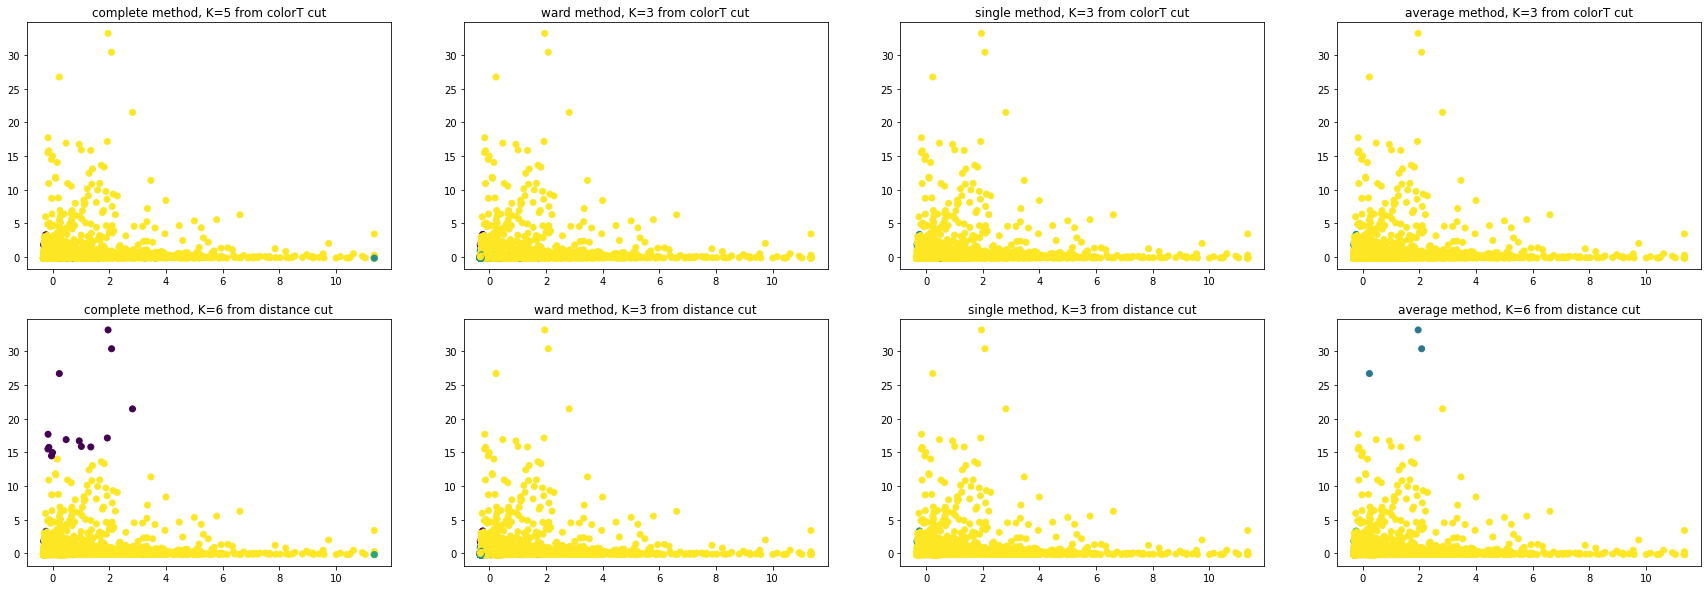

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=len(methods), figsize=(30,10))

for i in range(len(methods)):
  axs[0][i].scatter(X[:,0],X[:,1], c=models_colorT[i].labels_, cmap="viridis_r")
  axs[0][i].set_title(methods[i] + ' method, K=' + str(optK_colorT[i]) + ' from colorT cut')

  axs[1][i].scatter(X[:,0],X[:,1], c=models_distance[i].labels_, cmap="viridis_r")
  axs[1][i].set_title(methods[i] + ' method, K=' + str(optK_distance[i]) + ' from distance cut')
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from colorT cut")
# scores for each selected K
for i in range(len(models_colorT)):
    dav.append(davies_bouldin_score(X, models_colorT[i].labels_))
    sil.append(silhouette_score(X, models_colorT[i].labels_))
    cal.append(calinski_harabasz_score(X, models_colorT[i].labels_))
    print("K=", optK_colorT[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

dav=[]
sil=[]
cal=[]
print('\n')
print("Evaluation metrics for k-values from distance cut")
# scores for each selected K
for i in range(len(models_distance)):
    dav.append(davies_bouldin_score(X, models_distance[i].labels_))
    sil.append(silhouette_score(X, models_distance[i].labels_))
    cal.append(calinski_harabasz_score(X, models_distance[i].labels_))
    print("K=", optK_distance[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from colorT cut
K= 5  Silhouette= 0.7799944276317025  Davies_Bouldin= 0.47340274648060776  Calinski_Harabasz= 736.1846441035699
K= 3  Silhouette= 0.4331427065408124  Davies_Bouldin= 1.3753185286531766  Calinski_Harabasz= 2150.822123492692
K= 3  Silhouette= 0.876453351274371  Davies_Bouldin= 0.21887154453107785  Calinski_Harabasz= 499.26915988878613
K= 3  Silhouette= 0.8915644929043265  Davies_Bouldin= 0.2582336614194343  Calinski_Harabasz= 1003.199330181159


Evaluation metrics for k-values from distance cut
K= 6  Silhouette= 0.7802219605227391  Davies_Bouldin= 0.47935216696709954  Calinski_Harabasz= 756.6258982142798
K= 3  Silhouette= 0.4331427065408124  Davies_Bouldin= 1.3753185286531766  Calinski_Harabasz= 2150.822123492692
K= 3  Silhouette= 0.876453351274371  Davies_Bouldin= 0.21887154453107785  Calinski_Harabasz= 499.26915988878613
K= 6  Silhouette= 0.8723102535851935  Davies_Bouldin= 0.2245078799314795  Calinski_Harabasz= 599.3492169796535


In [ ]:
for i in range(len(methods)):
    Z = linkage(X, methods[i])
    print("method ",methods[i], " --> cophenetic_coefficient =", np.corrcoef(pdist(X), cophenet(Z))[0][1])

method  complete  --> cophenetic_coefficient = 0.8600512660677402
method  ward  --> cophenetic_coefficient = 0.5129119468665274
method  single  --> cophenetic_coefficient = 0.9260489017818302
method  average  --> cophenetic_coefficient = 0.9565066020703102


### focus on complete method

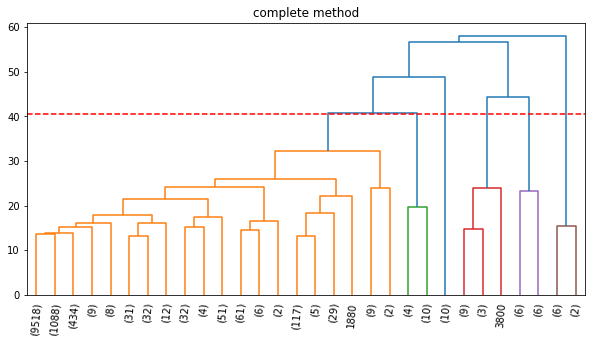

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('complete method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_complete = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
  model.fit_predict(X)
  models_complete.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_complete[i].labels_, bins=range(0, len(set(models_complete[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 11500, 1: 8}
{0: 11475, 1: 8, 2: 25}
{0: 25, 1: 8, 2: 11465, 3: 10}
{0: 11465, 1: 12, 2: 13, 3: 10, 4: 8}
{0: 11451, 1: 12, 2: 13, 3: 10, 4: 8, 5: 14}
{0: 11440, 1: 12, 2: 11, 3: 10, 4: 8, 5: 14, 6: 13}
{0: 11288, 1: 12, 2: 11, 3: 152, 4: 8, 5: 14, 6: 13, 7: 10}


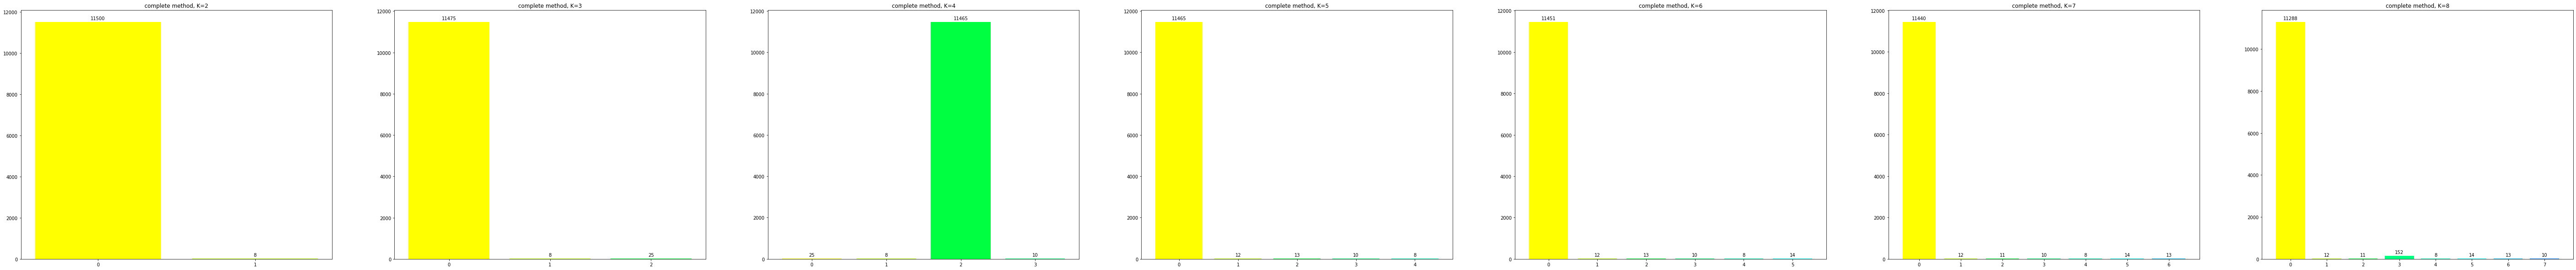

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_complete[i].labels_, bins=range(0, len(set(models_complete[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('complete method, K=' + str(k_range[i]))

plt.show()

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_complete[i].labels_, cmap="viridis_r")
  axs[i].set_title('complete method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from complete method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_complete[i].labels_))
    sil.append(silhouette_score(X, models_complete[i].labels_))
    cal.append(calinski_harabasz_score(X, models_complete[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from complete method 

K= 2  Silhouette= 0.9013466005775037  Davies_Bouldin= 0.1935518768874812  Calinski_Harabasz= 907.2989318464697
K= 3  Silhouette= 0.8085843425213908  Davies_Bouldin= 0.9353554692700857  Calinski_Harabasz= 673.2966376255014
K= 4  Silhouette= 0.8102970339518999  Davies_Bouldin= 0.8189839149691875  Calinski_Harabasz= 837.7765834911623
K= 5  Silhouette= 0.7799944276317025  Davies_Bouldin= 0.47340274648060776  Calinski_Harabasz= 736.1846441035699
K= 6  Silhouette= 0.7802219605227391  Davies_Bouldin= 0.47935216696709954  Calinski_Harabasz= 756.6258982142798
K= 7  Silhouette= 0.7803836458435134  Davies_Bouldin= 0.5429991337916751  Calinski_Harabasz= 708.220373084861
K= 8  Silhouette= 0.6306907621918134  Davies_Bouldin= 0.6517383749066656  Calinski_Harabasz= 791.4671989136843


### focus on ward method

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('ward method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_ward = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  model.fit_predict(X)
  models_ward.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_ward[i].labels_, bins=range(0, len(set(models_ward[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 3428, 1: 8080}
{0: 3409, 1: 8080, 2: 19}
{0: 3355, 1: 8080, 2: 19, 3: 54}
{0: 19, 1: 8080, 2: 3186, 3: 54, 4: 169}
{0: 3186, 1: 8080, 2: 9, 3: 54, 4: 169, 5: 10}
{0: 2784, 1: 8080, 2: 402, 3: 54, 4: 169, 5: 10, 6: 9}
{0: 2778, 1: 8080, 2: 402, 3: 54, 4: 169, 5: 10, 6: 9, 7: 6}


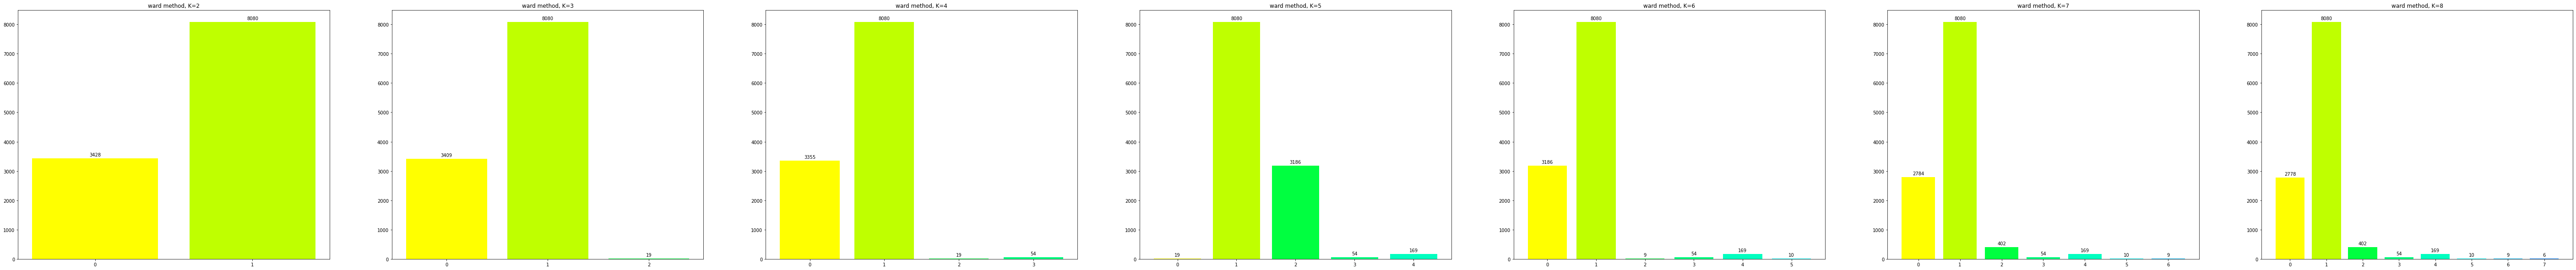

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_ward[i].labels_, bins=range(0, len(set(models_ward[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('ward method, K=' + str(k_range[i]))

plt.show()

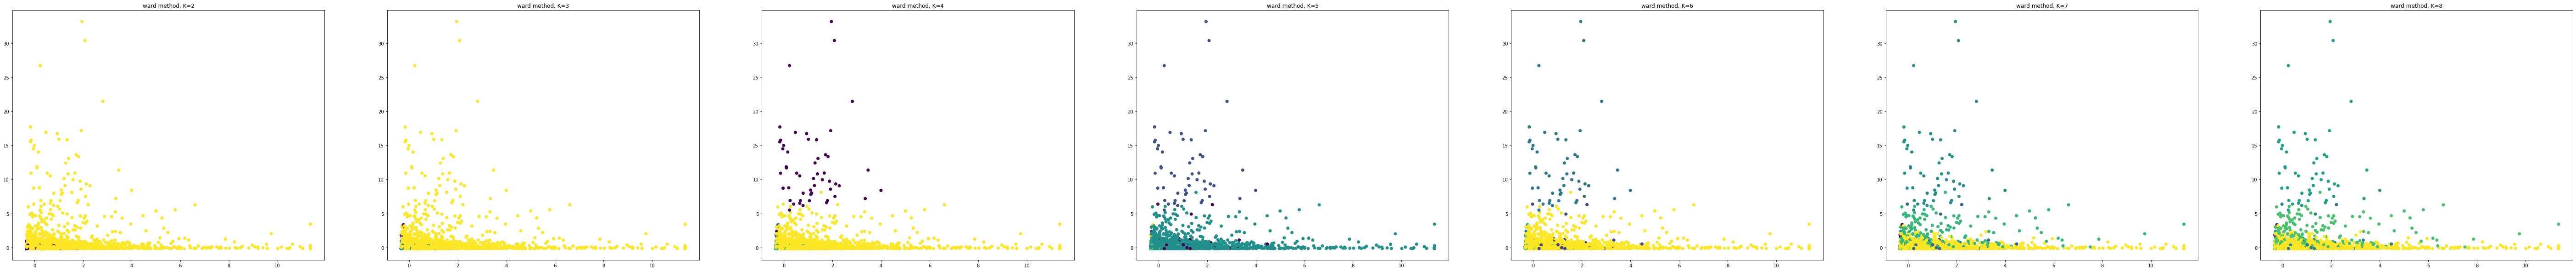

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_ward[i].labels_, cmap="viridis_r")
  axs[i].set_title('ward method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from ward method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_ward[i].labels_))
    sil.append(silhouette_score(X, models_ward[i].labels_))
    cal.append(calinski_harabasz_score(X, models_ward[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from ward method 

K= 2  Silhouette= 0.4326152656864699  Davies_Bouldin= 1.6782801260577842  Calinski_Harabasz= 2415.71433029436
K= 3  Silhouette= 0.4331427065408124  Davies_Bouldin= 1.3753185286531766  Calinski_Harabasz= 2150.822123492692
K= 4  Silhouette= 0.4337076341135824  Davies_Bouldin= 1.2767318683336073  Calinski_Harabasz= 1965.055759772023
K= 5  Silhouette= 0.4374626943371994  Davies_Bouldin= 1.2297333846591063  Calinski_Harabasz= 1909.1971192017497
K= 6  Silhouette= 0.4382673963595284  Davies_Bouldin= 0.9289277860823386  Calinski_Harabasz= 1853.3568111049415
K= 7  Silhouette= 0.4350912949731596  Davies_Bouldin= 1.0729385803150993  Calinski_Harabasz= 1829.5535068624768
K= 8  Silhouette= 0.43465562699614135  Davies_Bouldin= 0.9691490871405576  Calinski_Harabasz= 1782.5597935472


### focus on single method

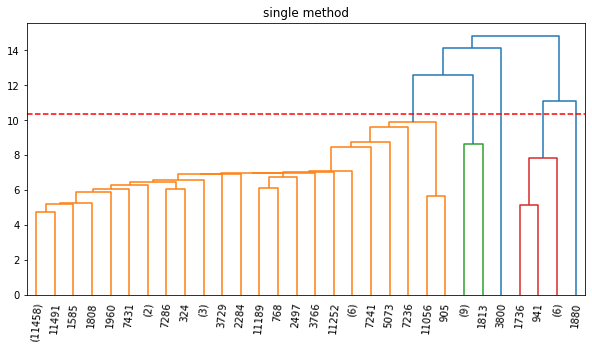

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('single method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_single = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
  model.fit_predict(X)
  models_single.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_single[i].labels_, bins=range(0, len(set(models_single[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 11499, 1: 9}
{0: 11498, 1: 9, 2: 1}
{0: 9, 1: 11488, 2: 1, 3: 10}
{0: 11488, 1: 10, 2: 1, 3: 8, 4: 1}
{0: 11486, 1: 10, 2: 2, 3: 8, 4: 1, 5: 1}
{0: 11485, 1: 10, 2: 2, 3: 8, 4: 1, 5: 1, 6: 1}
{0: 10, 1: 11484, 2: 2, 3: 8, 4: 1, 5: 1, 6: 1, 7: 1}


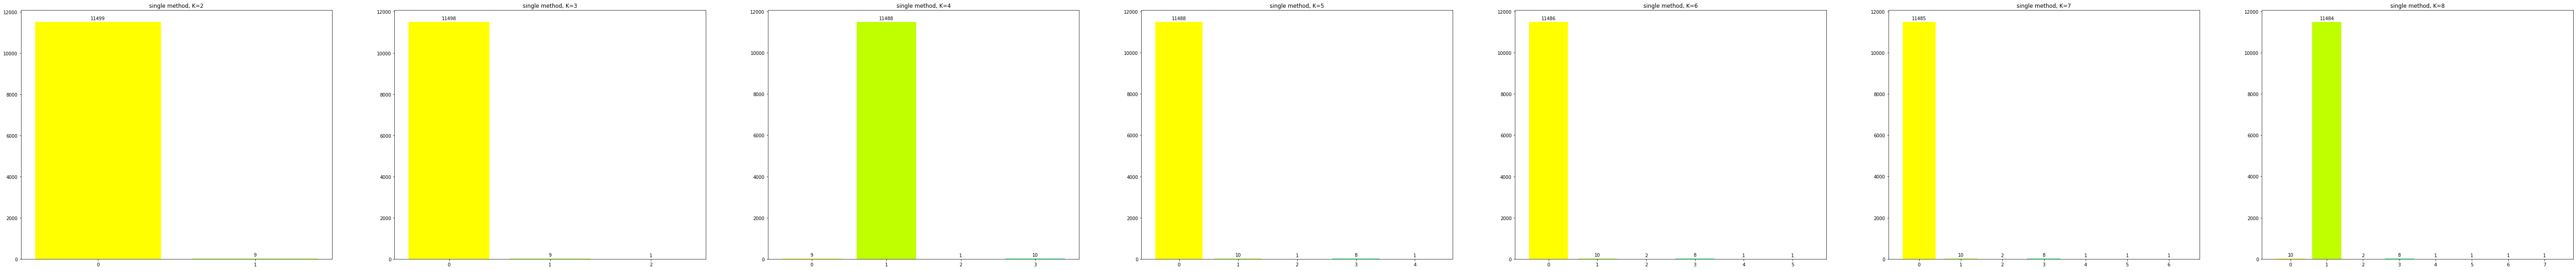

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_single[i].labels_, bins=range(0, len(set(models_single[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('single method, K=' + str(k_range[i]))

plt.show()

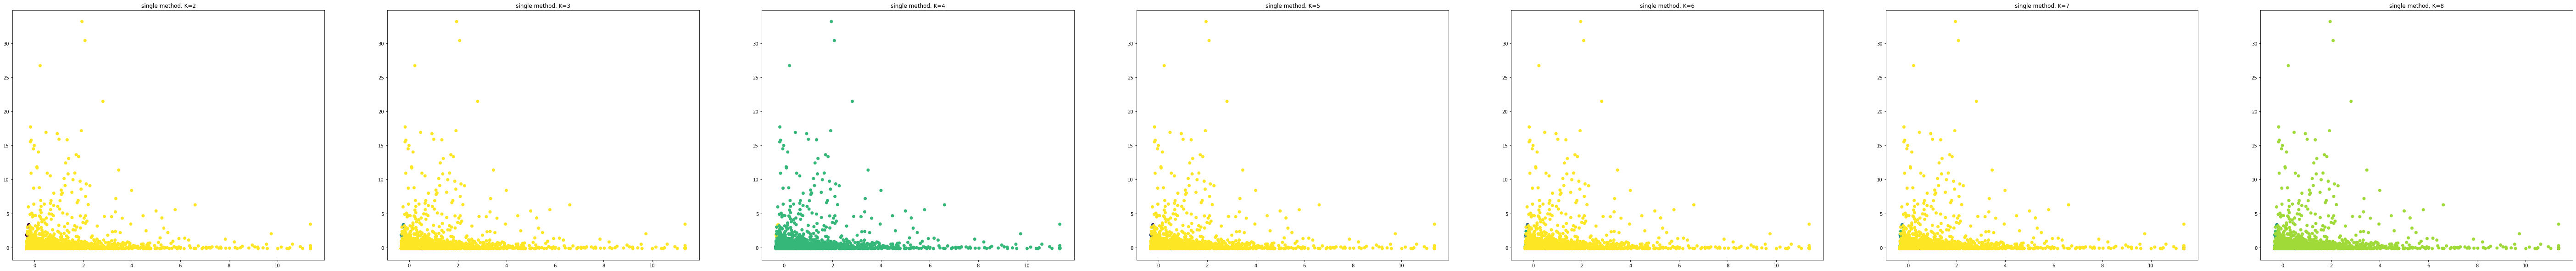

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_single[i].labels_, cmap="viridis_r")
  axs[i].set_title('single method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from single method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_single[i].labels_))
    sil.append(silhouette_score(X, models_single[i].labels_))
    cal.append(calinski_harabasz_score(X, models_single[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from single method 

K= 2  Silhouette= 0.8962933305408989  Davies_Bouldin= 0.2565682568576113  Calinski_Harabasz= 919.1015052275641
K= 3  Silhouette= 0.876453351274371  Davies_Bouldin= 0.21887154453107785  Calinski_Harabasz= 499.26915988878613
K= 4  Silhouette= 0.8772397242198711  Davies_Bouldin= 0.2295637497301431  Calinski_Harabasz= 700.1042796232986
K= 5  Silhouette= 0.8246798659459034  Davies_Bouldin= 0.20210255045069686  Calinski_Harabasz= 532.7179354109944
K= 6  Silhouette= 0.8231320620875779  Davies_Bouldin= 0.22617005843014115  Calinski_Harabasz= 447.0996394011676
K= 7  Silhouette= 0.7686926105223347  Davies_Bouldin= 0.21693380147493582  Calinski_Harabasz= 376.99017797156665
K= 8  Silhouette= 0.727326760737573  Davies_Bouldin= 0.21403462689359837  Calinski_Harabasz= 325.75596006807126


### focus on average method

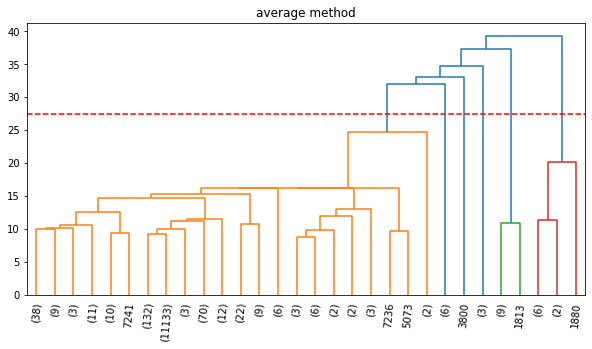

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('average method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_average = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')
  model.fit_predict(X)
  models_average.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_average[i].labels_, bins=range(0, len(set(models_average[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 11499, 1: 9}
{0: 11489, 1: 9, 2: 10}
{0: 11486, 1: 9, 2: 10, 3: 3}
{0: 11485, 1: 9, 2: 10, 3: 3, 4: 1}
{0: 11479, 1: 9, 2: 10, 3: 3, 4: 1, 5: 6}
{0: 9, 1: 11477, 2: 10, 3: 3, 4: 1, 5: 6, 6: 2}
{0: 11477, 1: 8, 2: 10, 3: 3, 4: 1, 5: 6, 6: 2, 7: 1}


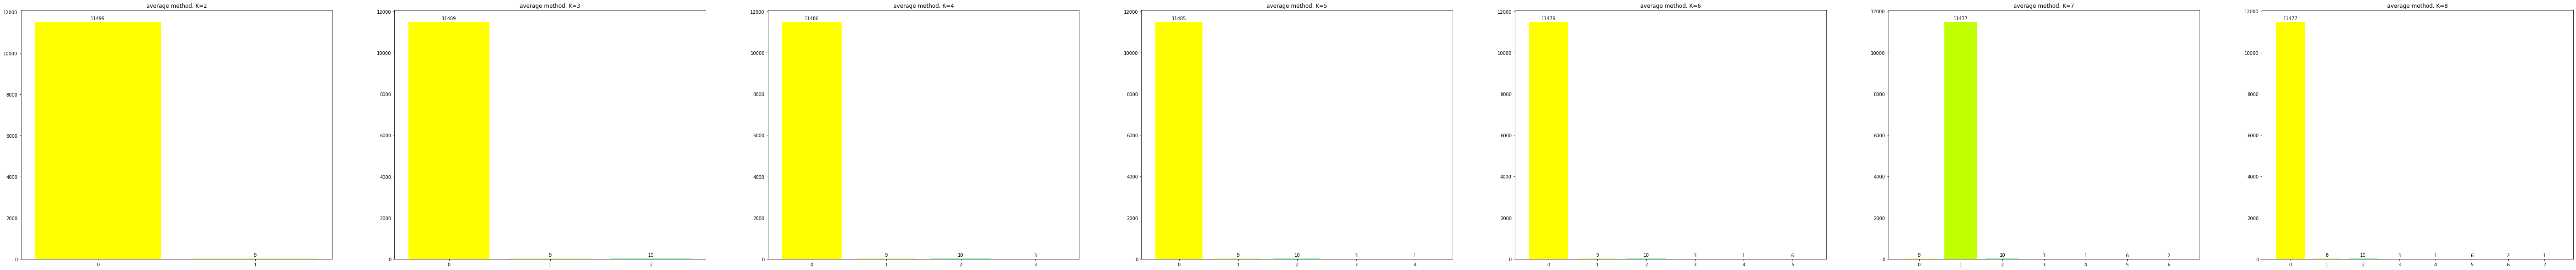

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_average[i].labels_, bins=range(0, len(set(models_average[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('average method, K=' + str(k_range[i]))

plt.show()

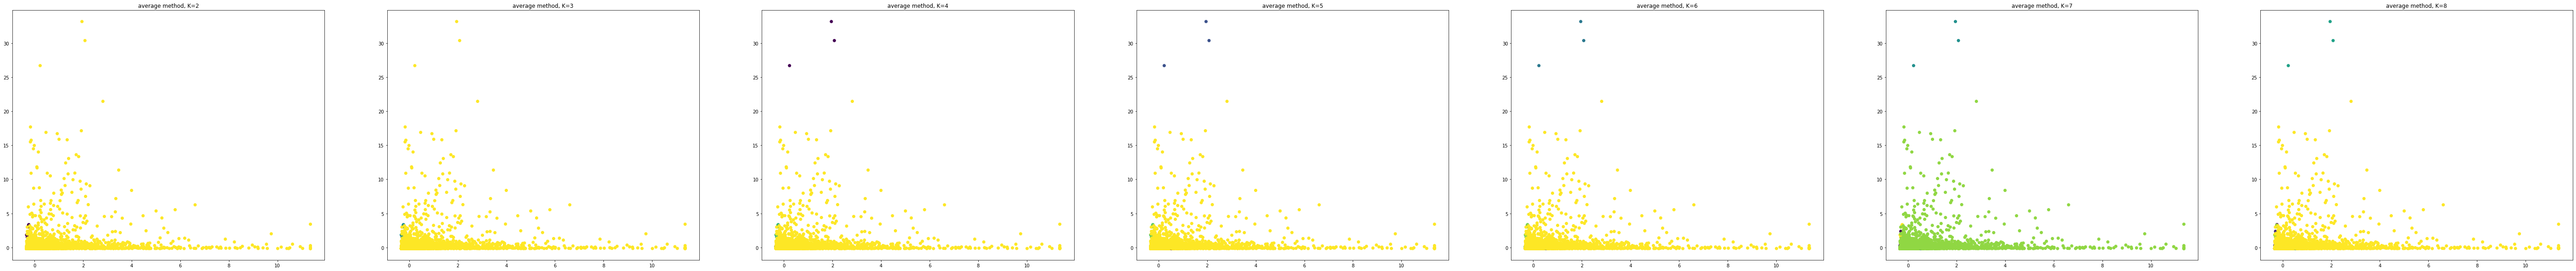

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_average[i].labels_, cmap="viridis_r")
  axs[i].set_title('average method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from average method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_average[i].labels_))
    sil.append(silhouette_score(X, models_average[i].labels_))
    cal.append(calinski_harabasz_score(X, models_average[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from average method 

K= 2  Silhouette= 0.8962933305408989  Davies_Bouldin= 0.2565682568576113  Calinski_Harabasz= 919.1015052275641
K= 3  Silhouette= 0.8915644929043265  Davies_Bouldin= 0.2582336614194343  Calinski_Harabasz= 1003.199330181159
K= 4  Silhouette= 0.8824798545206812  Davies_Bouldin= 0.24541413700193826  Calinski_Harabasz= 774.1717865254695
K= 5  Silhouette= 0.8758363871513785  Davies_Bouldin= 0.22504210309007355  Calinski_Harabasz= 605.2174192938544
K= 6  Silhouette= 0.8723102535851935  Davies_Bouldin= 0.2245078799314795  Calinski_Harabasz= 599.3492169796535
K= 7  Silhouette= 0.8372526716824218  Davies_Bouldin= 0.2290311897939741  Calinski_Harabasz= 519.1884969163716
K= 8  Silhouette= 0.8242359385690055  Davies_Bouldin= 0.21942952278384453  Calinski_Harabasz= 450.05138229995913


### Clusters characterization with respect to categorical features (Ward Method)

In [ ]:
mod = models_ward

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0           45825       187157.0          0.0          1201.0         868.0   
1           11770      1158520.0          0.0           969.0         766.0   
2           39158        92396.0          0.0           391.0          77.0   
3           18035       317861.0          0.0           209.0         488.0   
4           22496       138486.0          0.0          1714.0         185.0   

   ...  hour_entropy  favcount_entropy  retcount_entropy  repcount_entropy  \
0  ...           0.0          8.831943          6.080426               0.0   
1  ...           0.0          0.000000          0.000000               0.0   
2  ...           0.0          3.921117          2.375534               0.0   
3  ...           0.0          0.000000          0.000000               0.0   
4  ...           0.0          8.277790          2.354578               0.0   

   has_entropy  url_entropy  men_entropy  avg_textlen  days_on_tw  \
0     9.183814     9.578214    10.607494   109.637321        3900   
1     0.000000     0.000000     0.000000    85.026719        3893   
2     4.836434     5.114369     6.387527    80.780317        3885   
3     0.000000     0.000000     0.000000    84.281111        3884   
4     8.421512     8.222893     9.556485    95.166473        3870   

   activity_richness  
0           0.608718  
1           0.519137  
2           0.551866  
3           0.519310  
4           0.887855  

[5 rows x 33 columns]

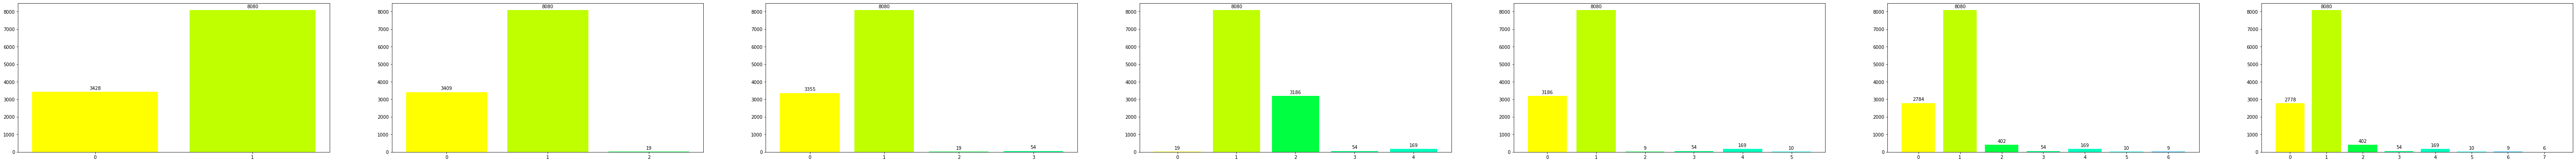

In [ ]:
fig, ax = plt.subplots(ncols=len(mod), figsize=(100,6))
for i in range(len(mod)):
  hist, bins = np.histogram(mod[i].labels_, bins=range(0, len(set(mod[i].labels_)) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

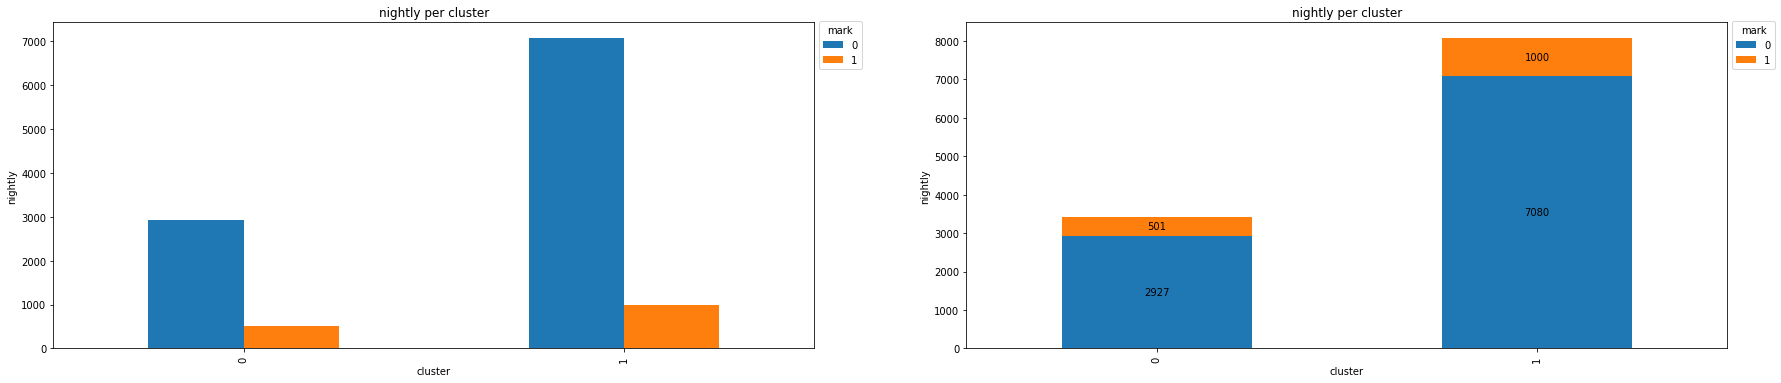

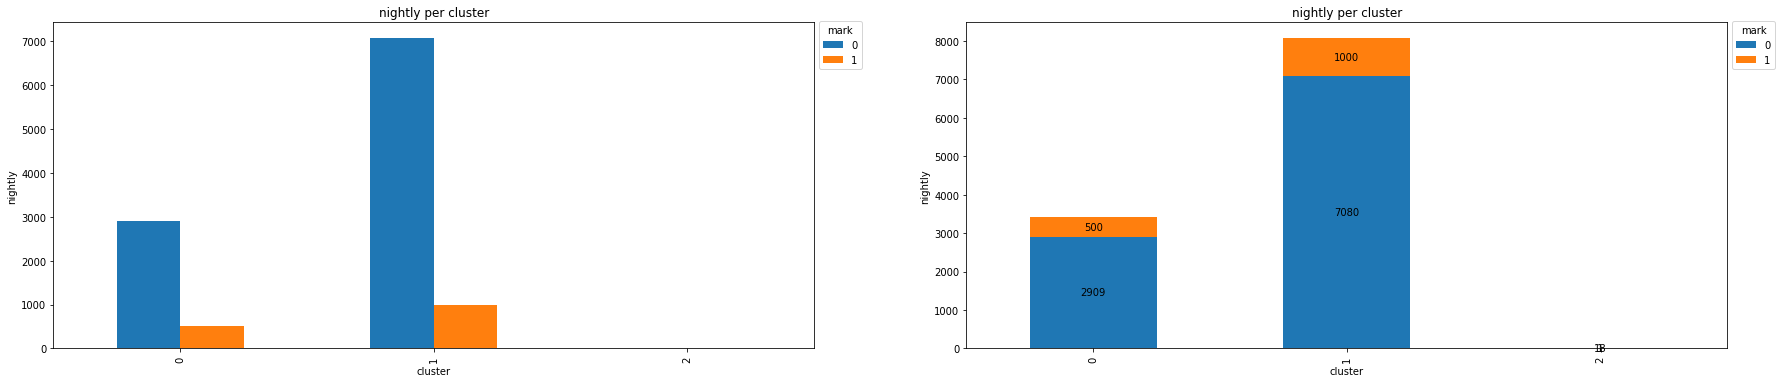

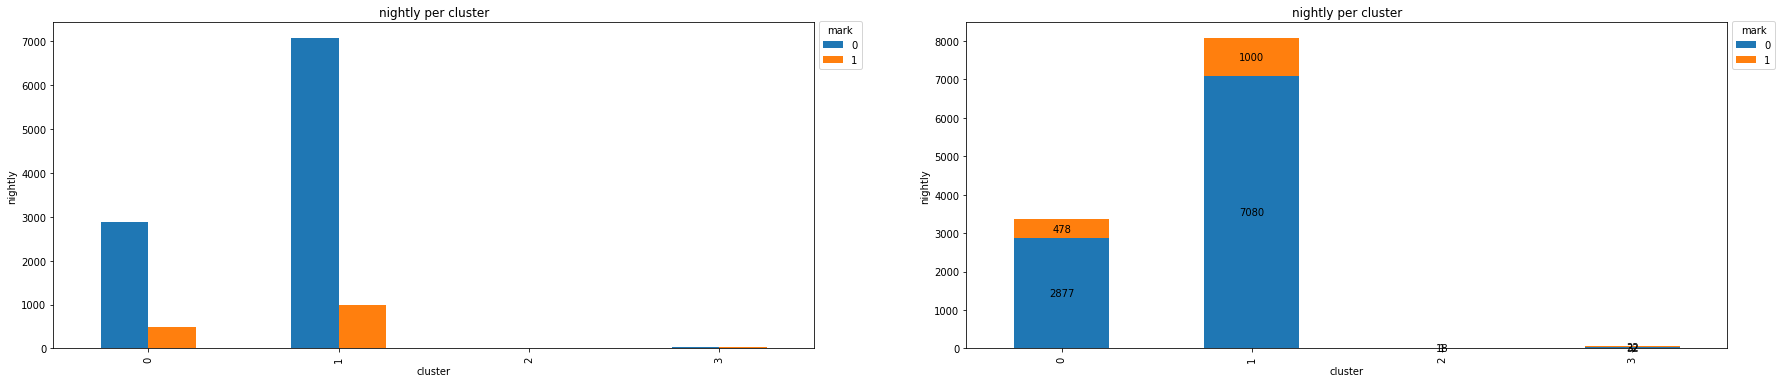

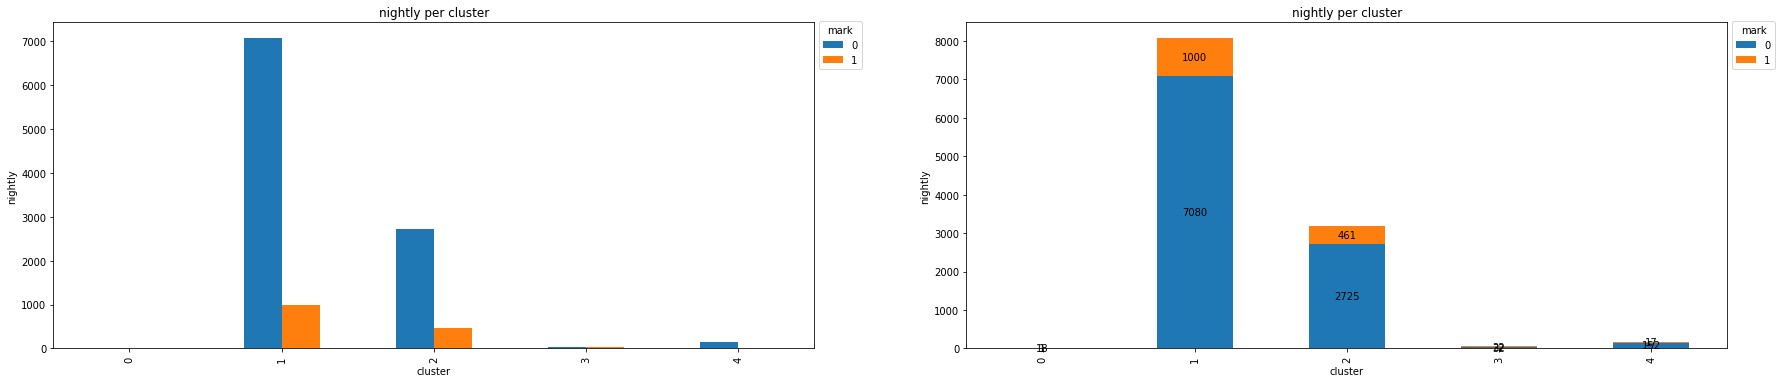

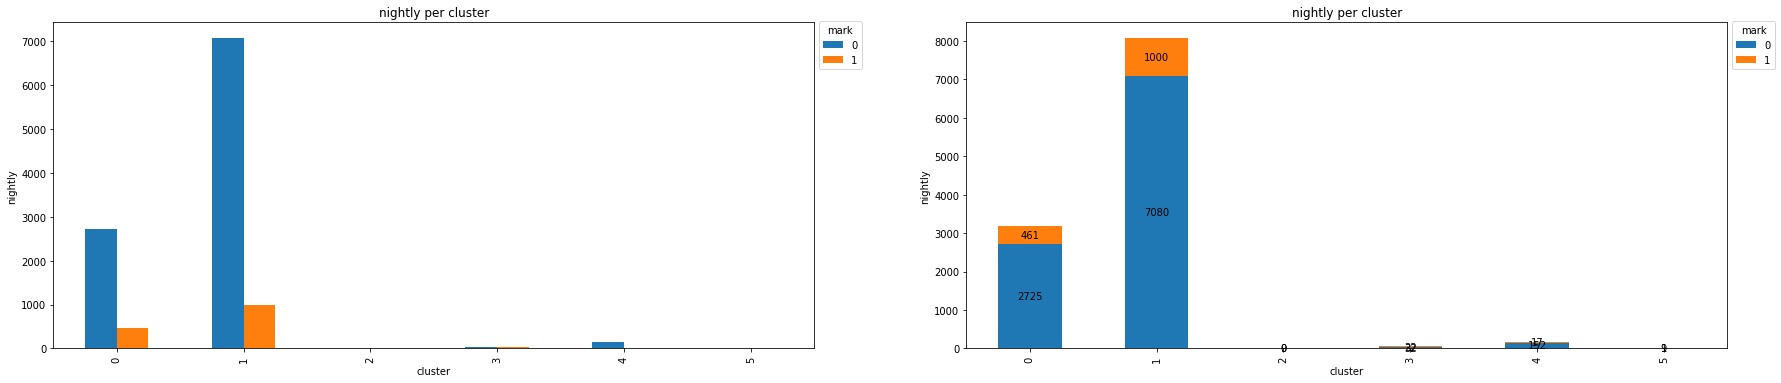

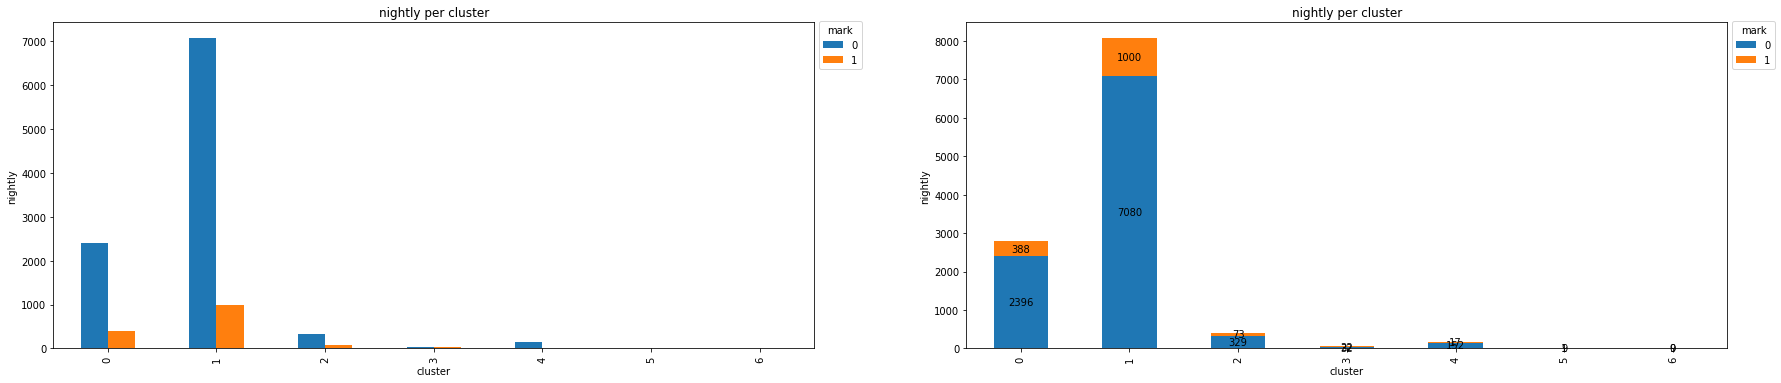

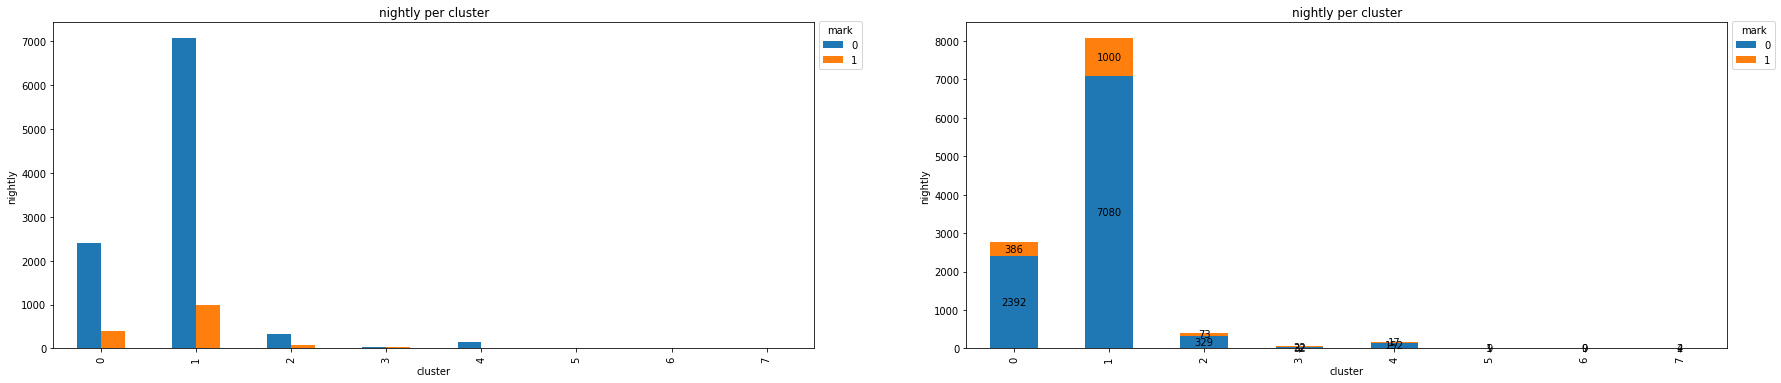

In [ ]:
for i in range(len(mod)):
  nightly_ct = pd.crosstab(mod[i].labels_,users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

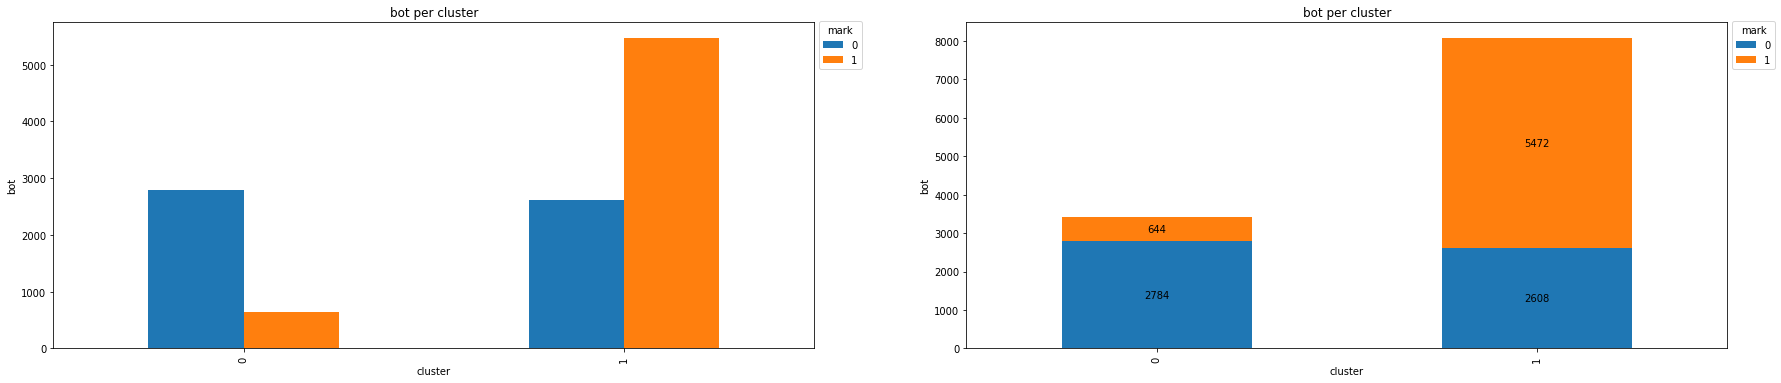

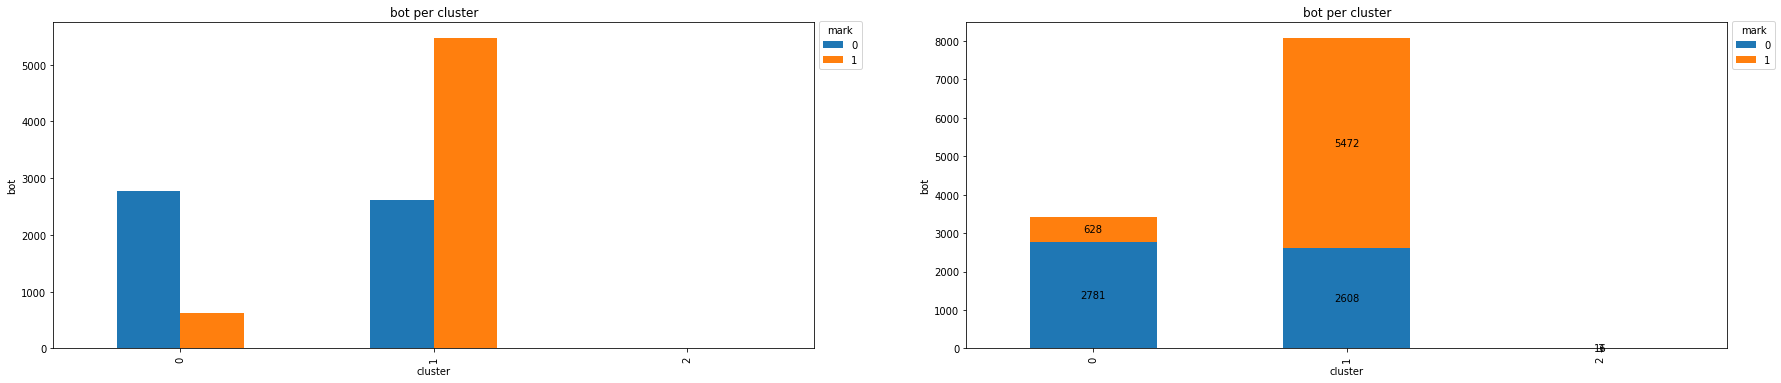

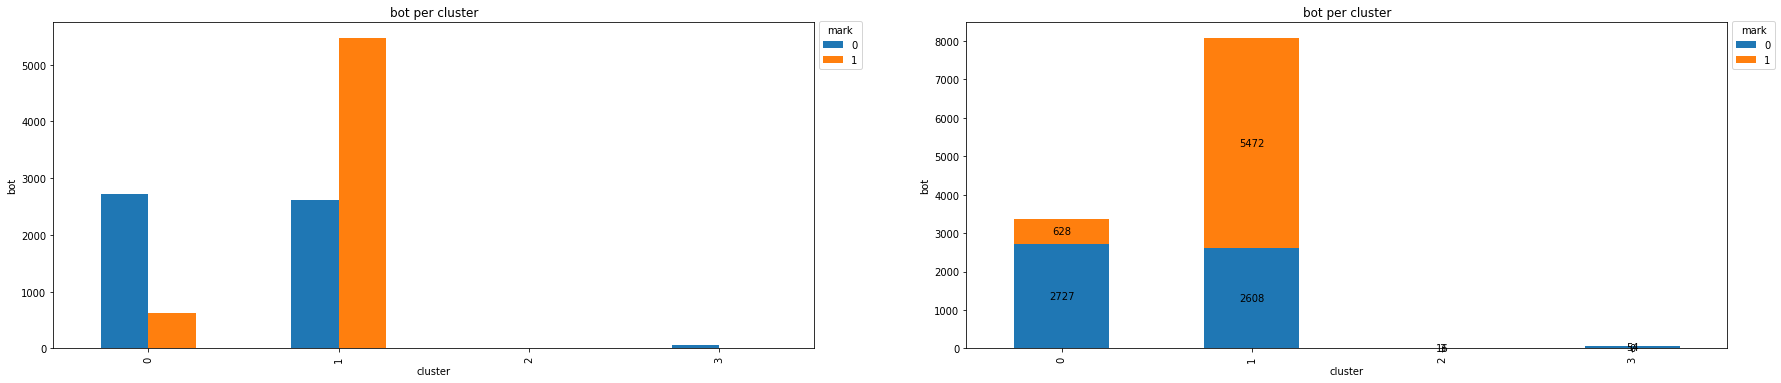

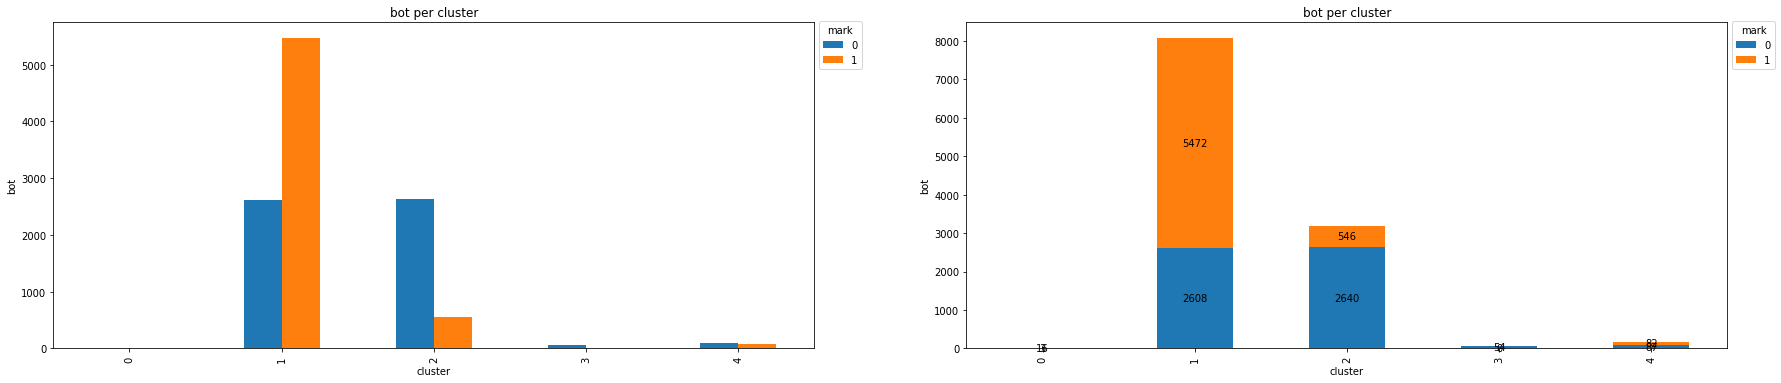

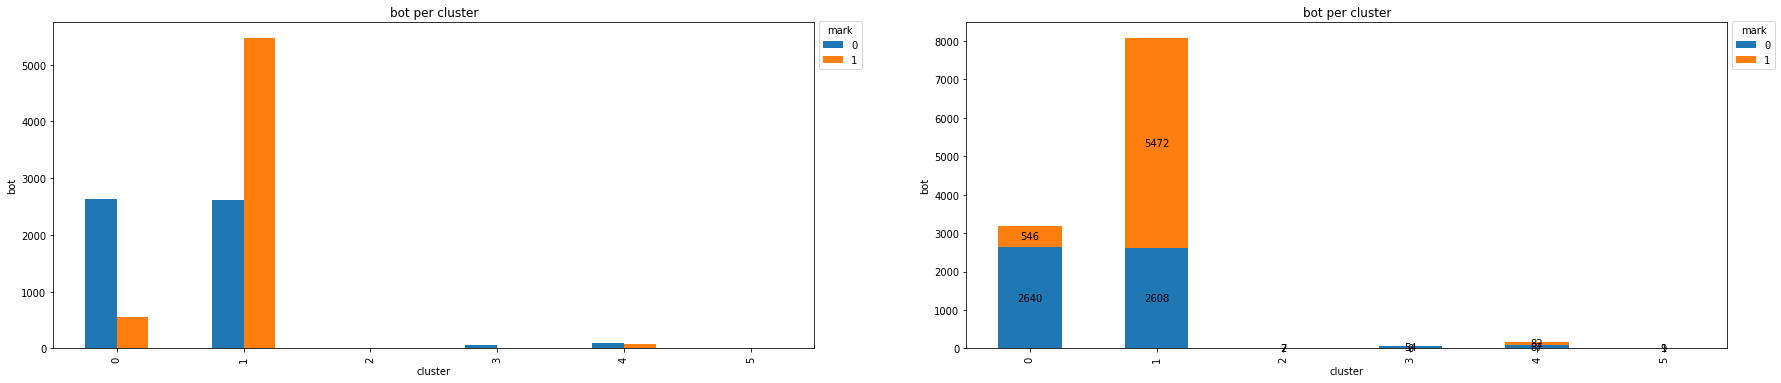

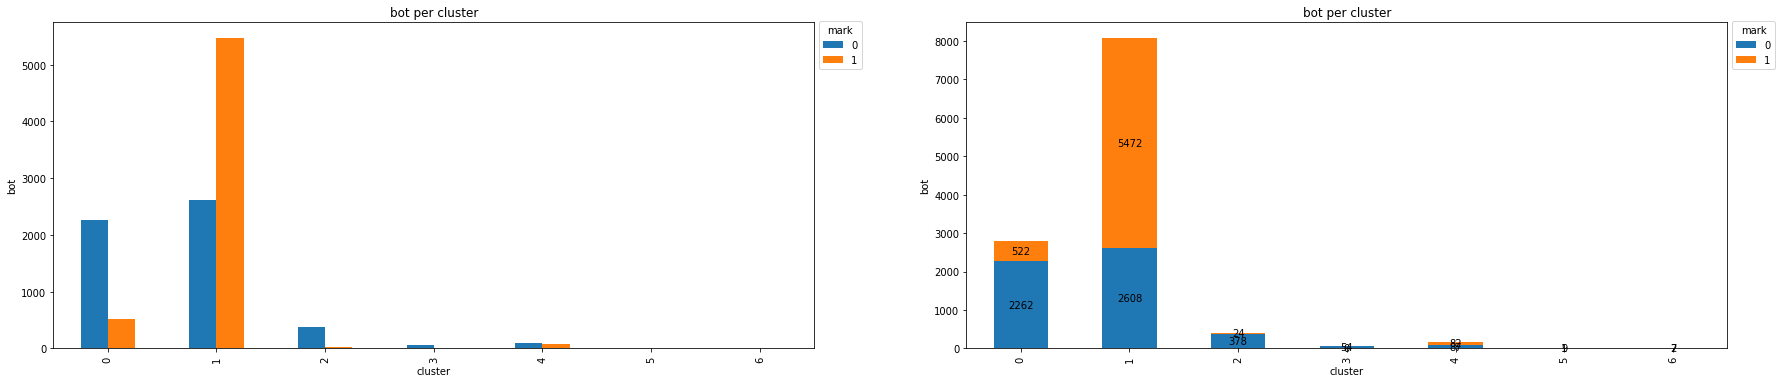

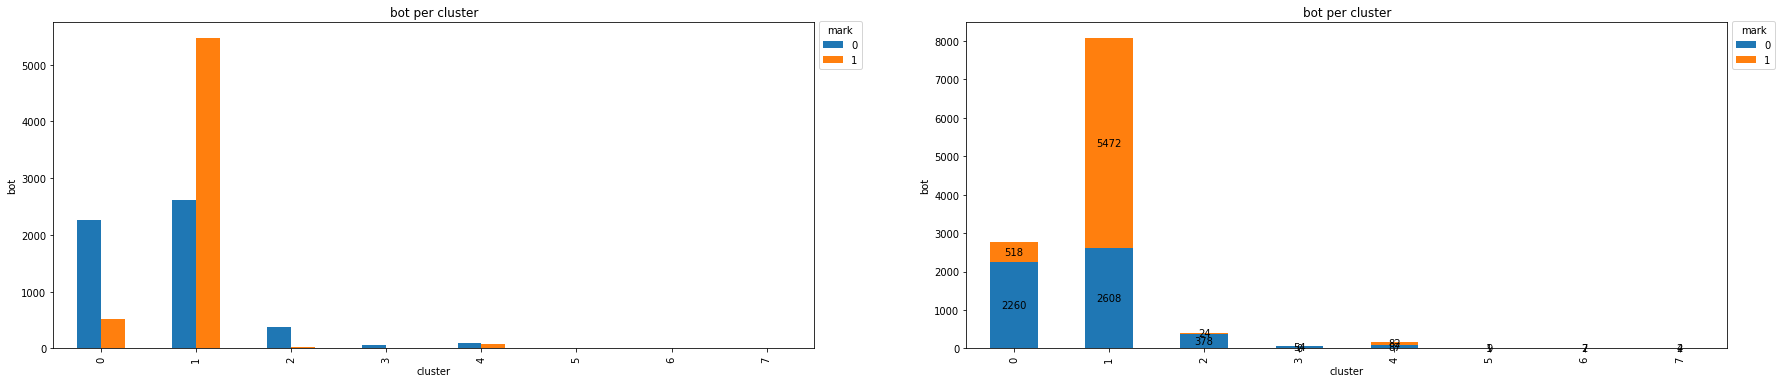

In [ ]:
for i in range(len(mod)):
  bot_ct = pd.crosstab(mod[i].labels_,users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

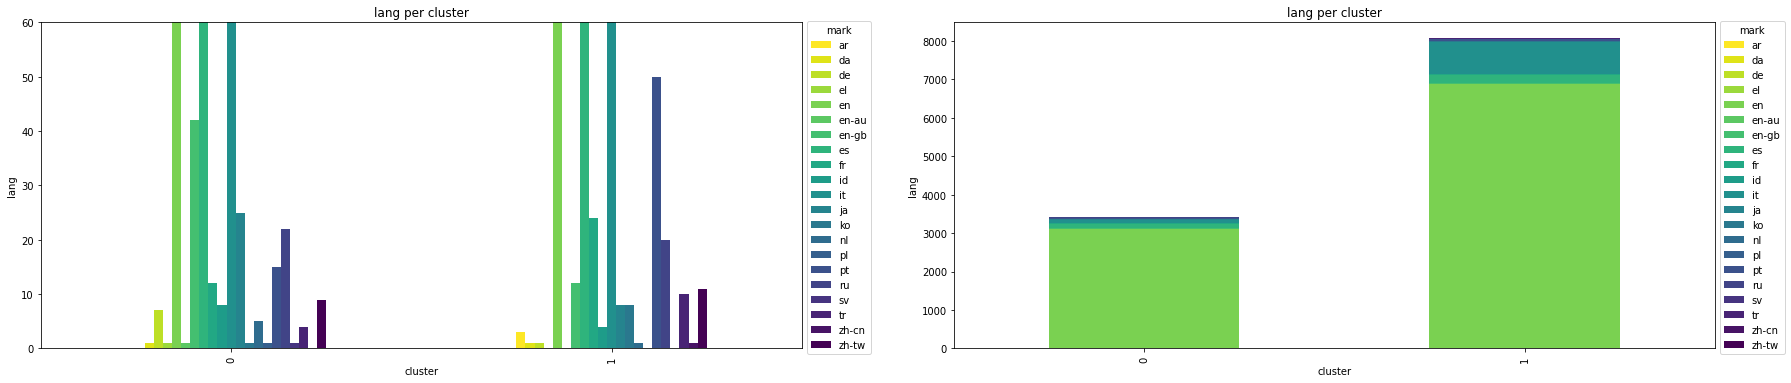

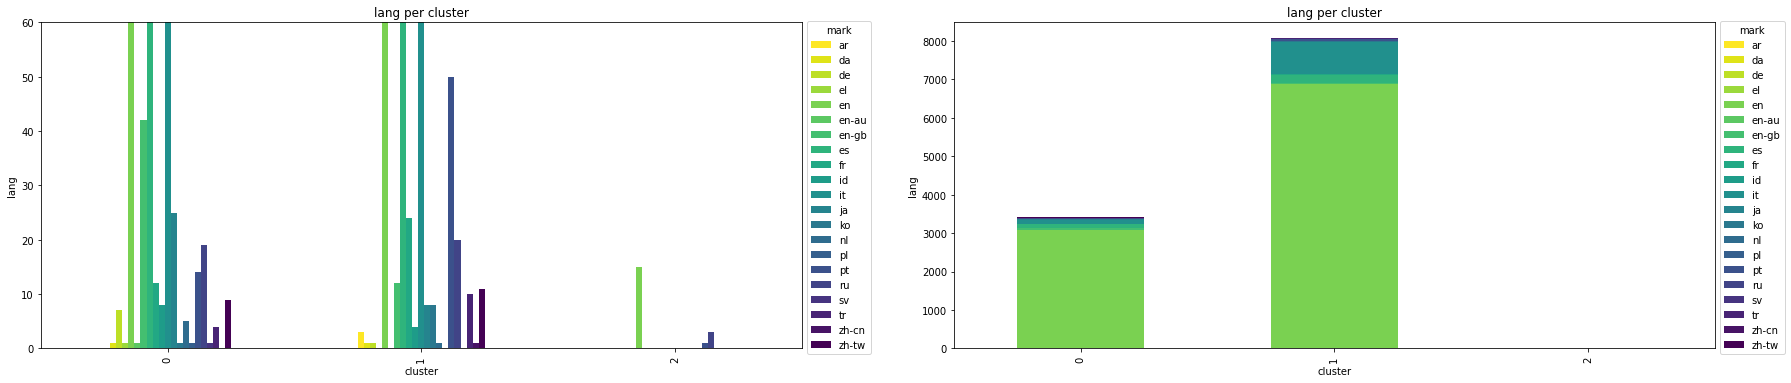

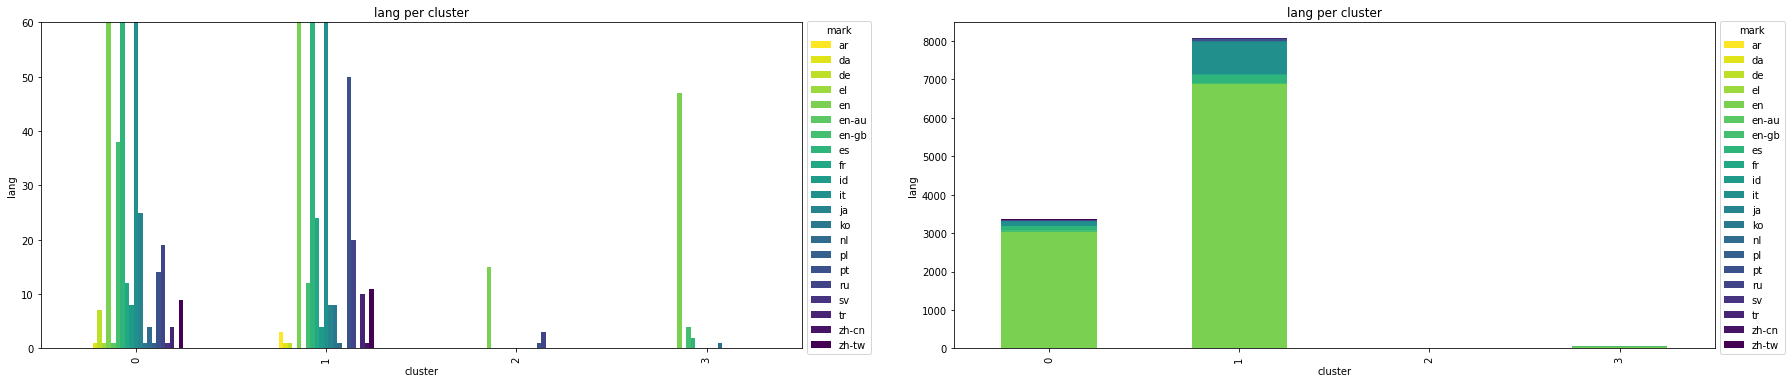

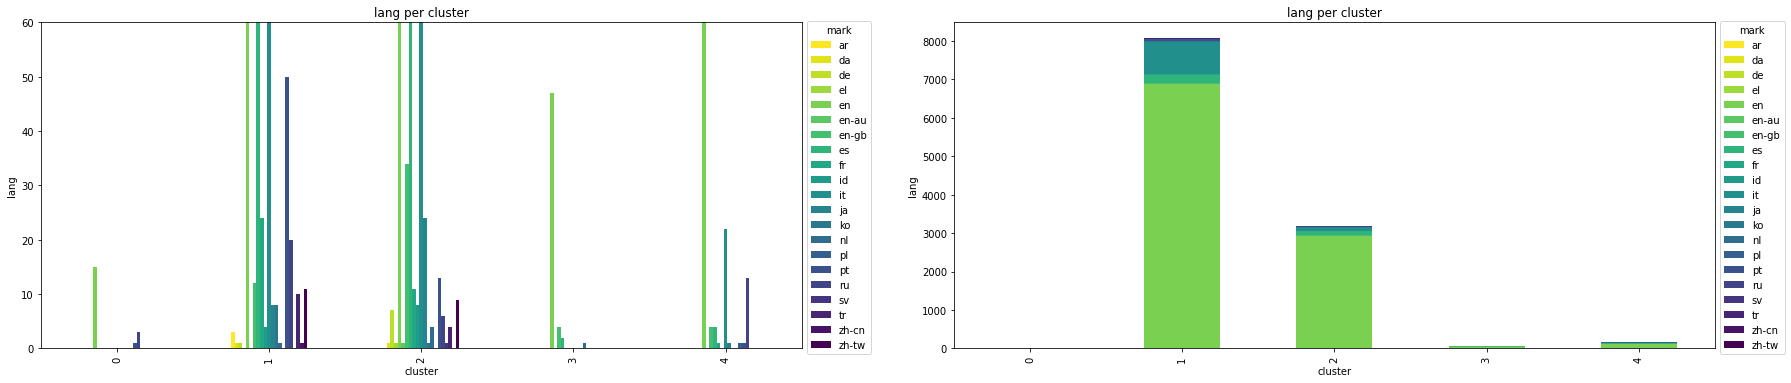

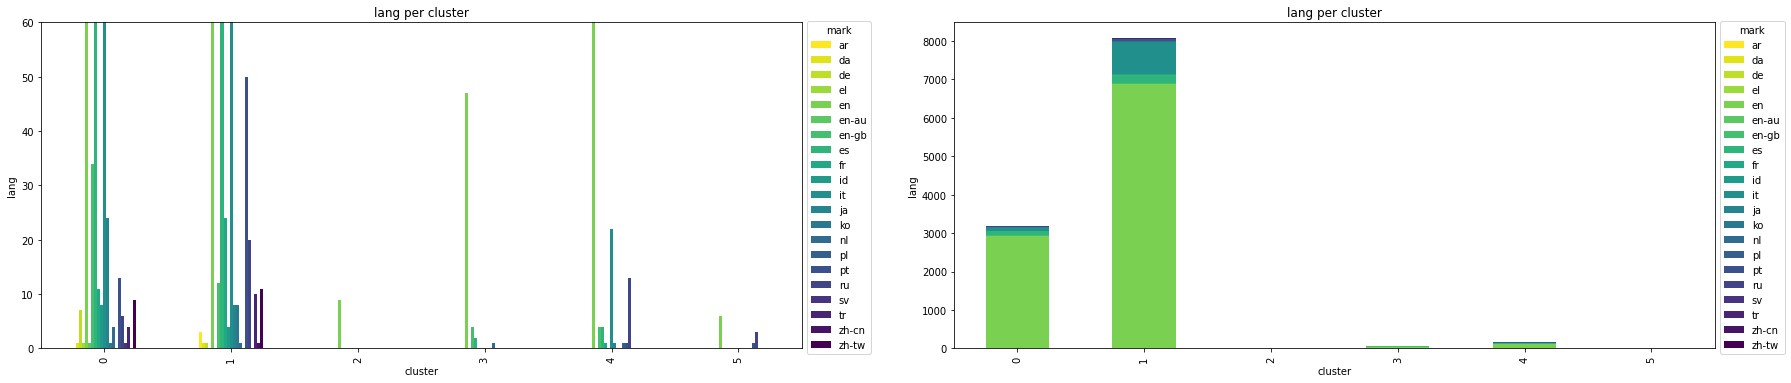

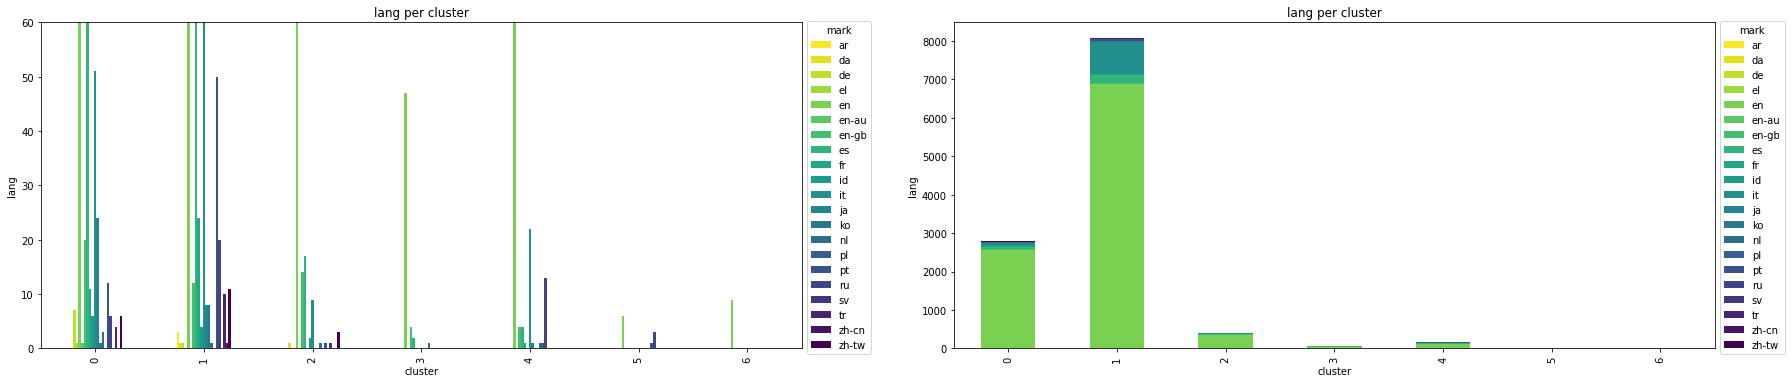

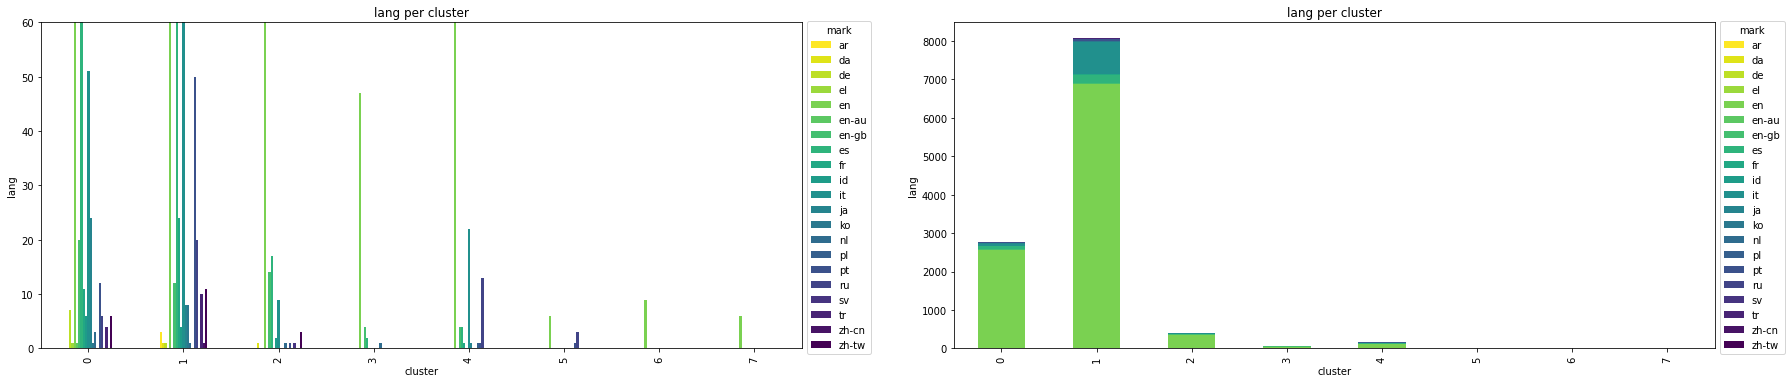

In [ ]:
for i in range(len(mod)):
  lang_ct = pd.crosstab(mod[i].labels_,users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

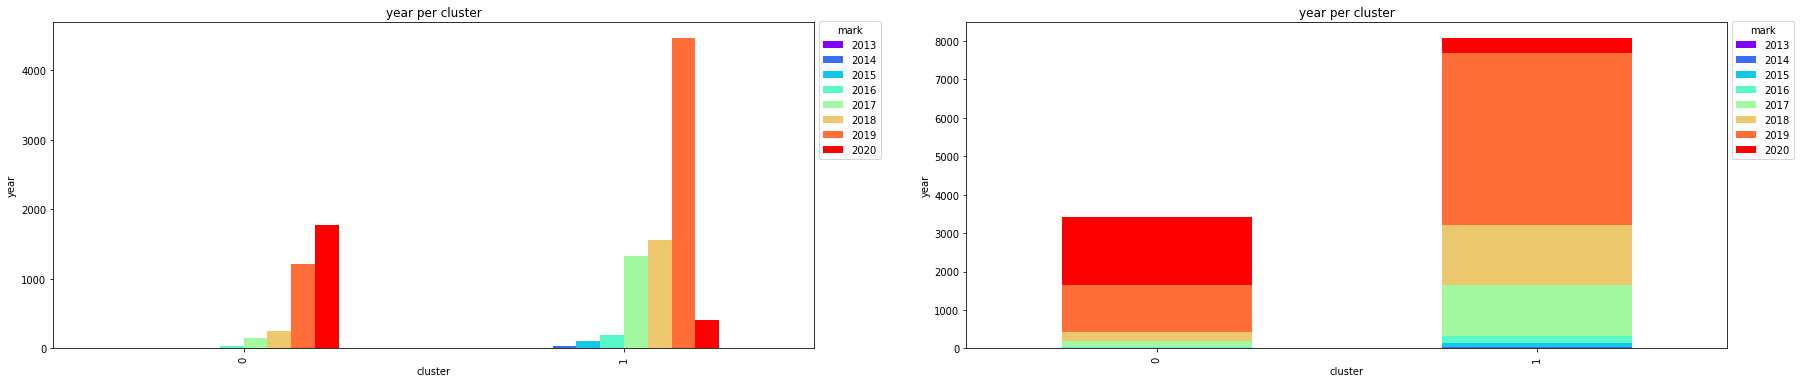

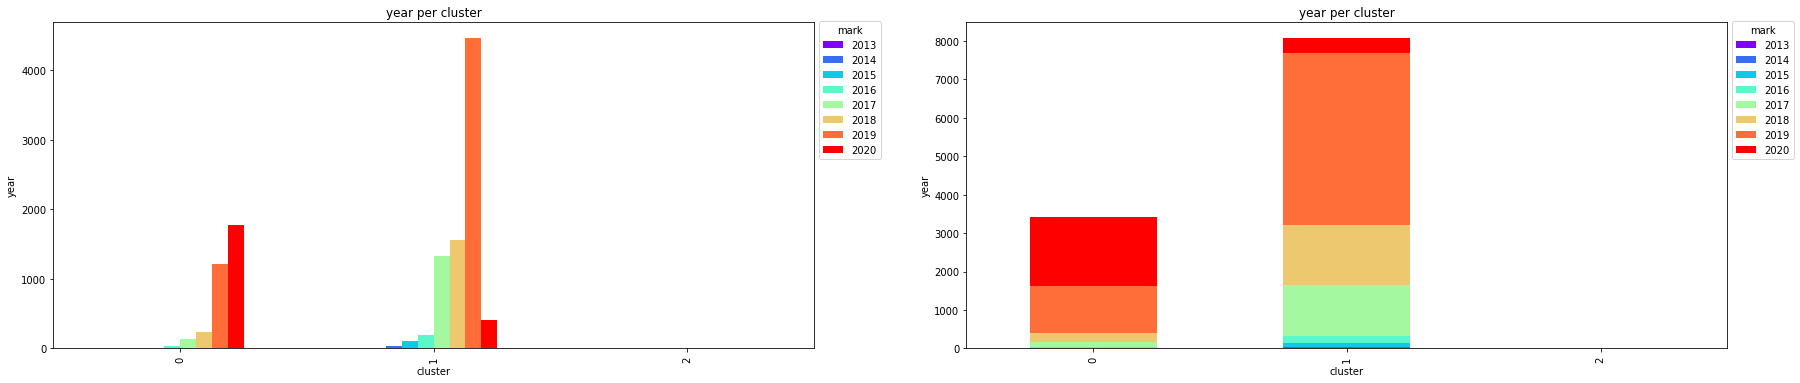

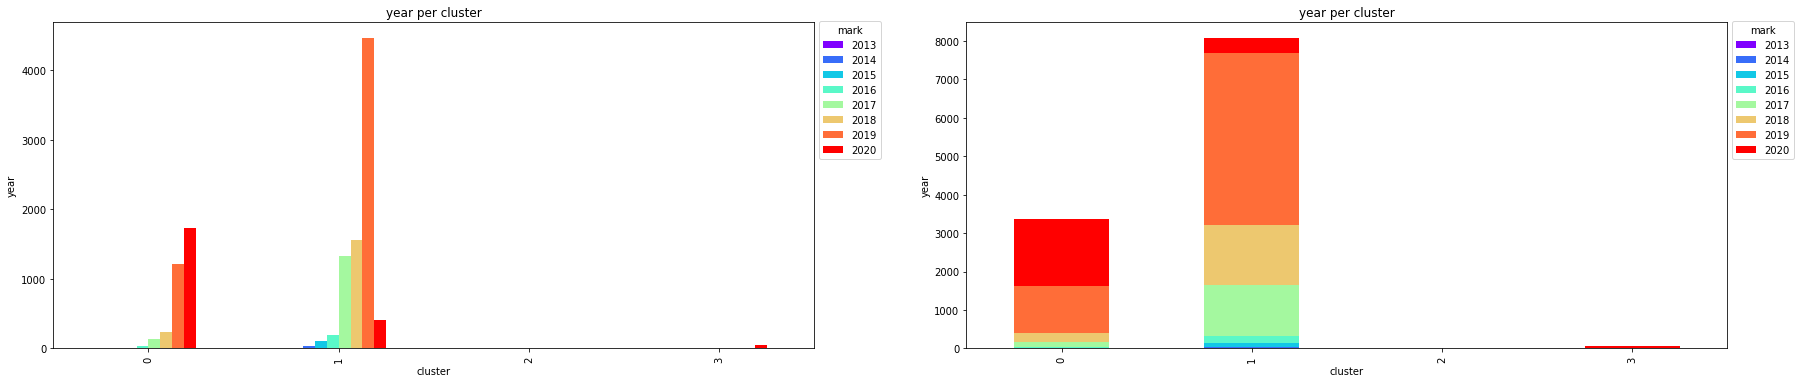

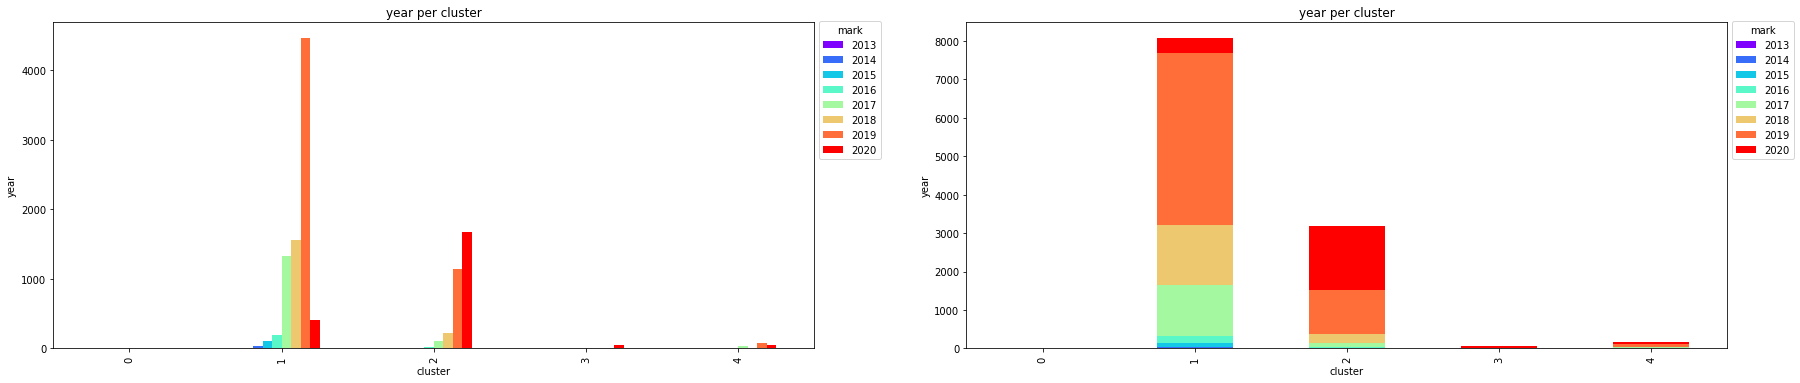

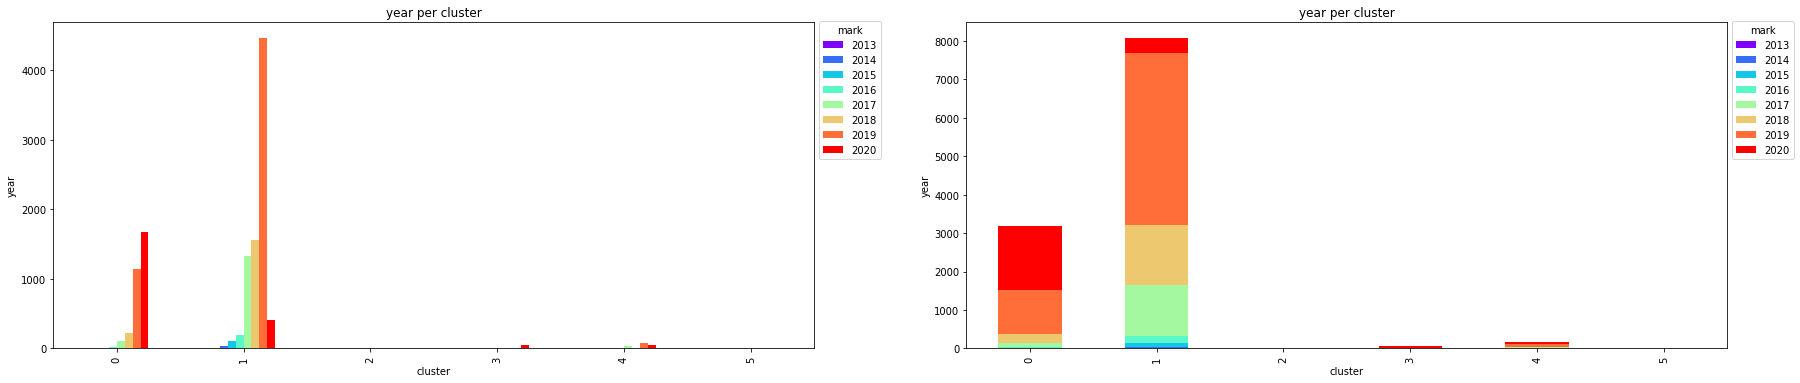

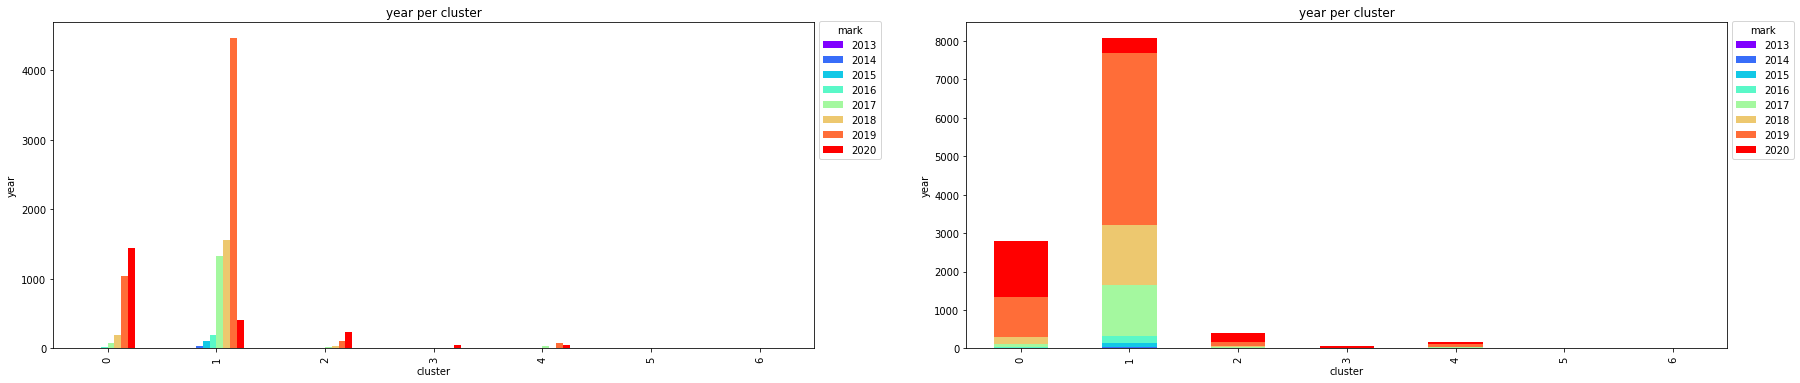

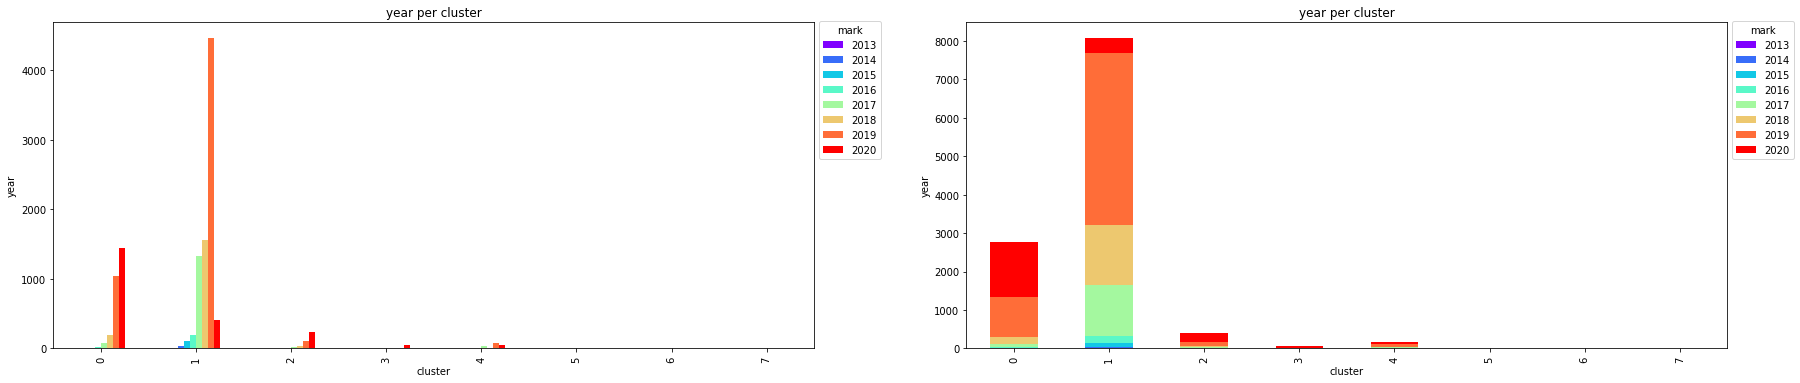

In [ ]:
for i in range(len(mod)):
  year_ct = pd.crosstab(mod[i].labels_,users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

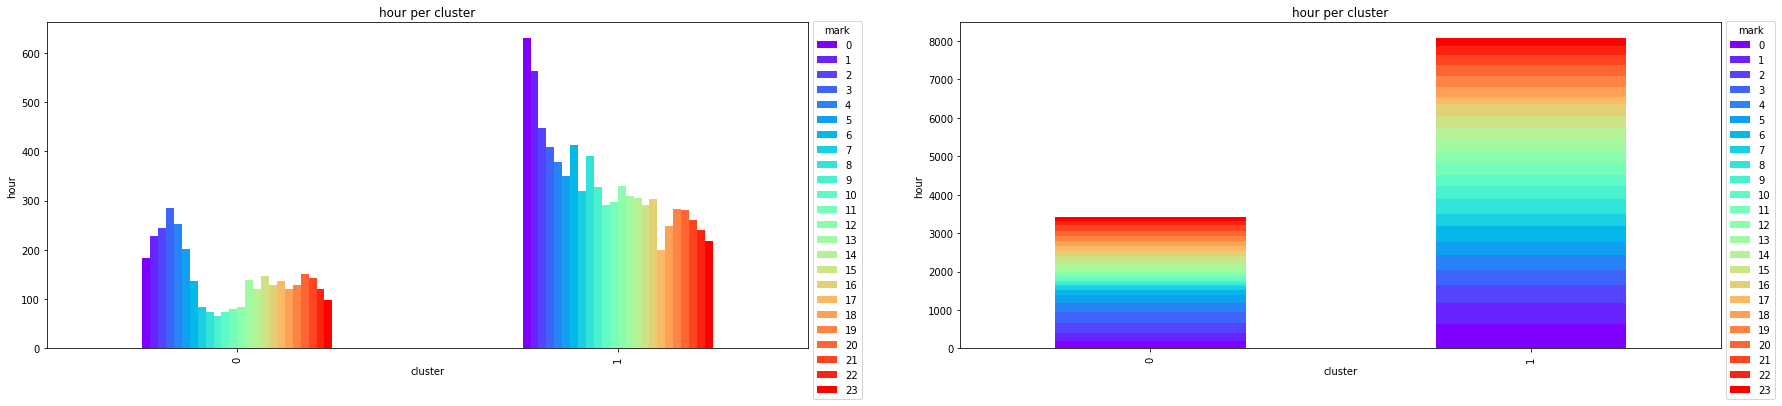

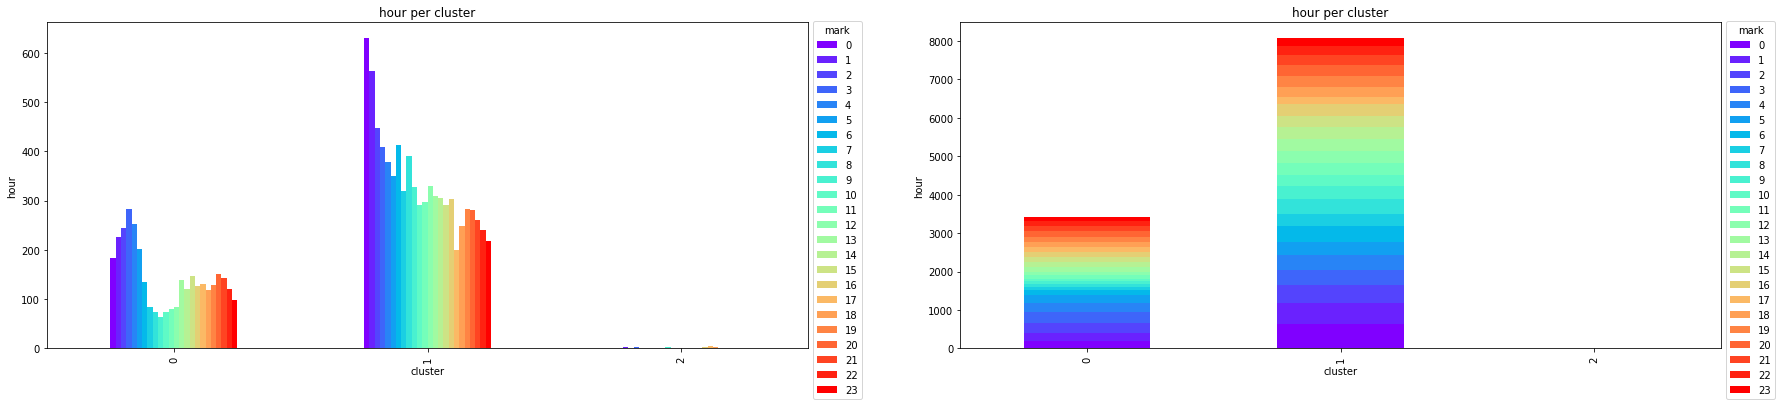

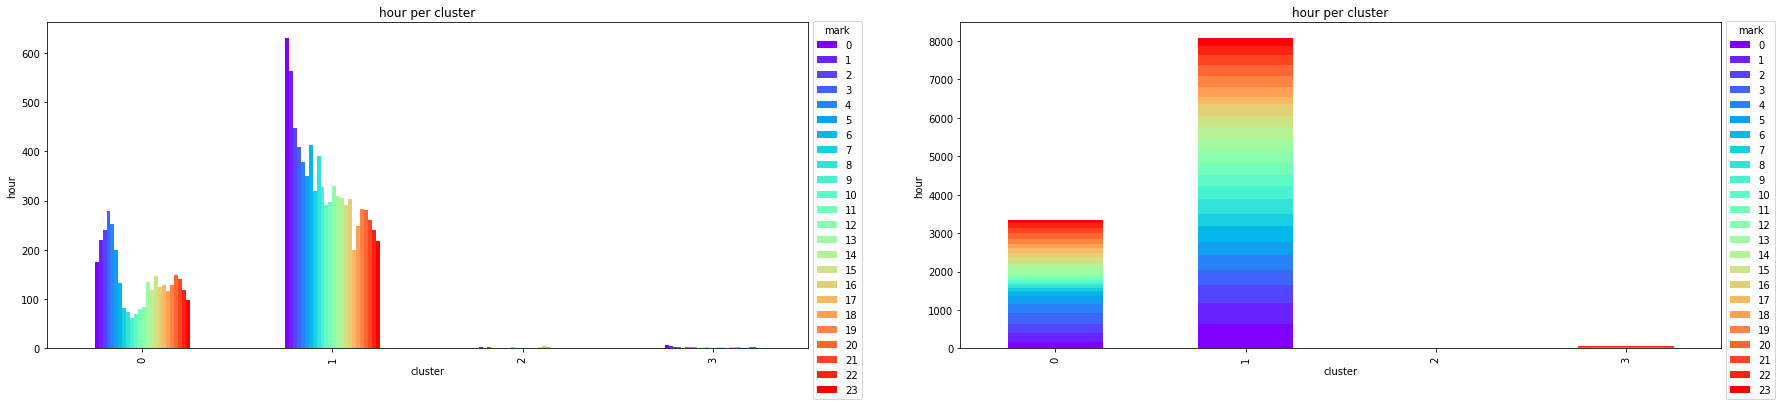

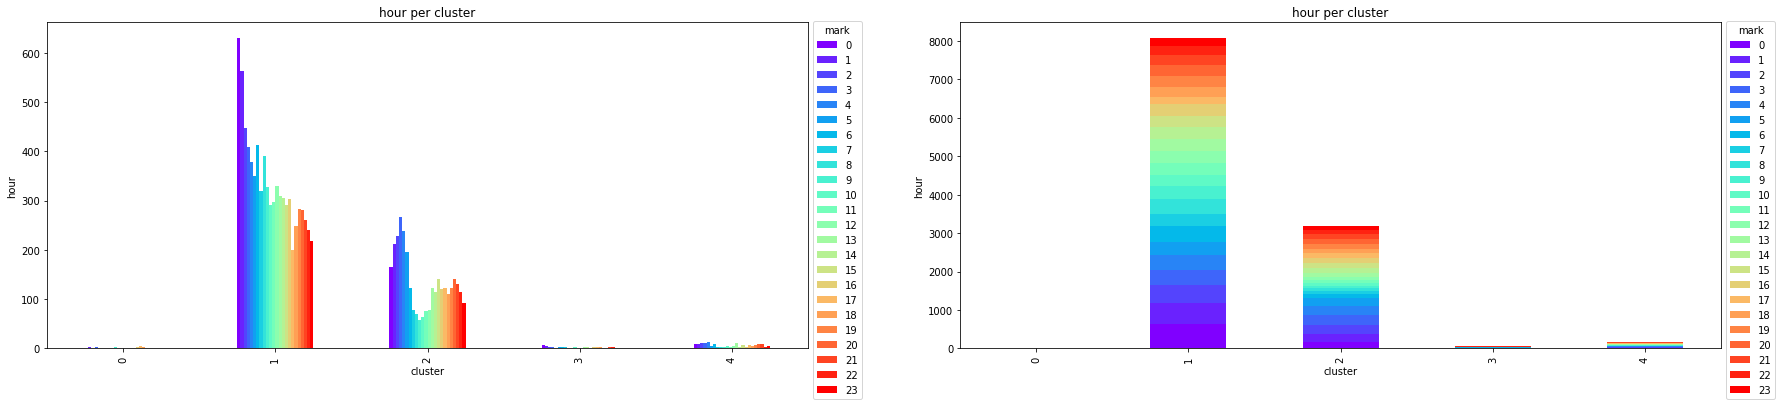

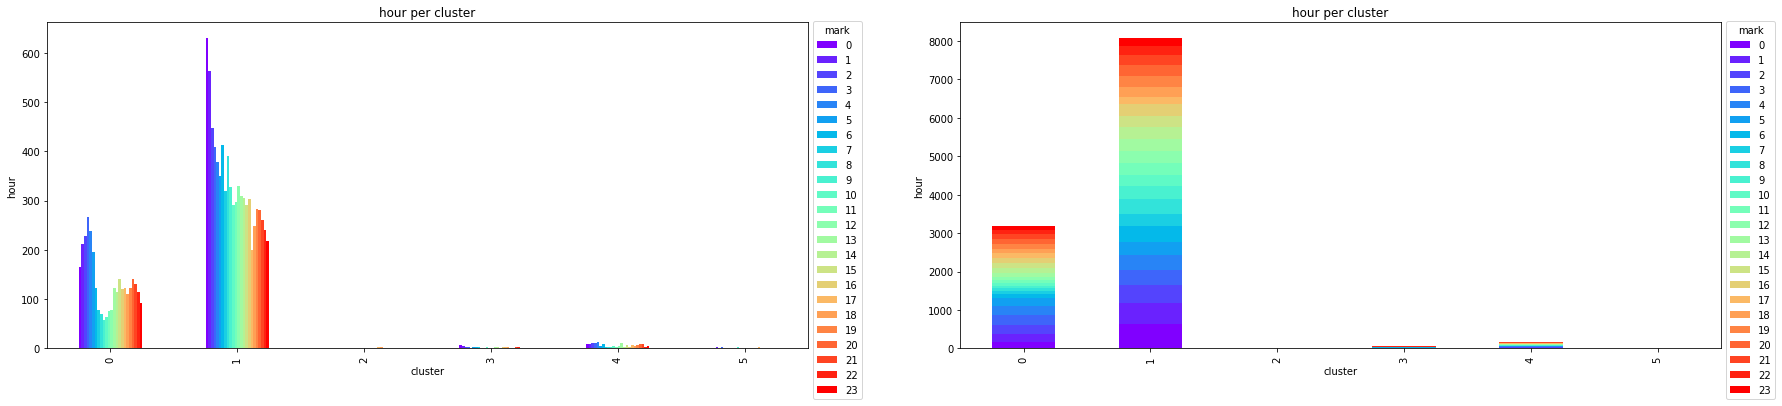

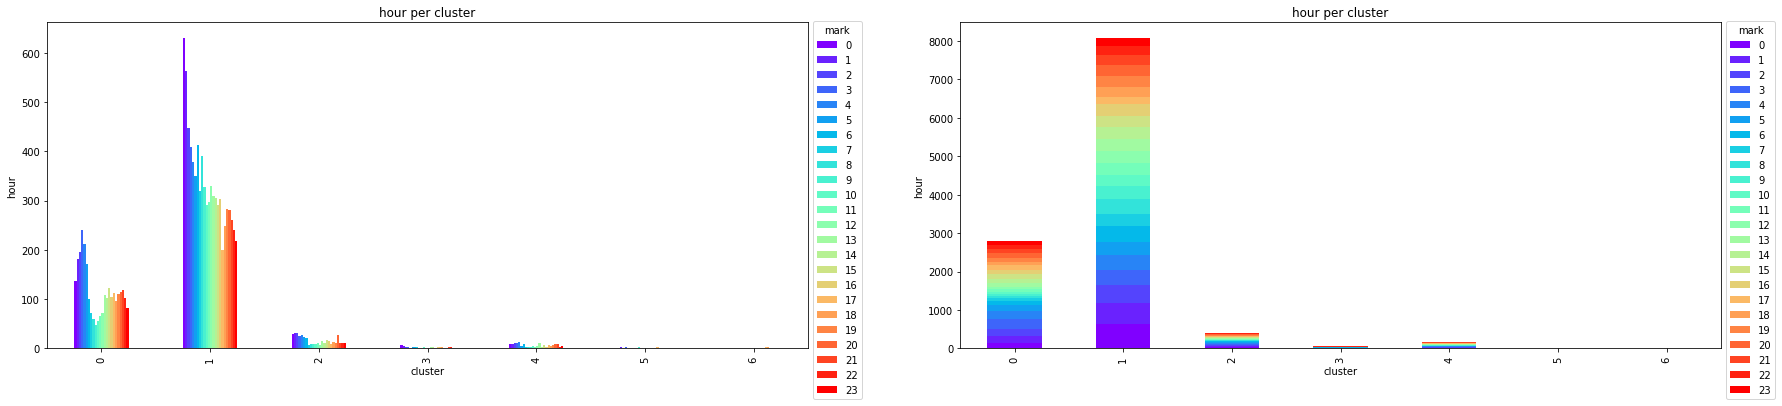

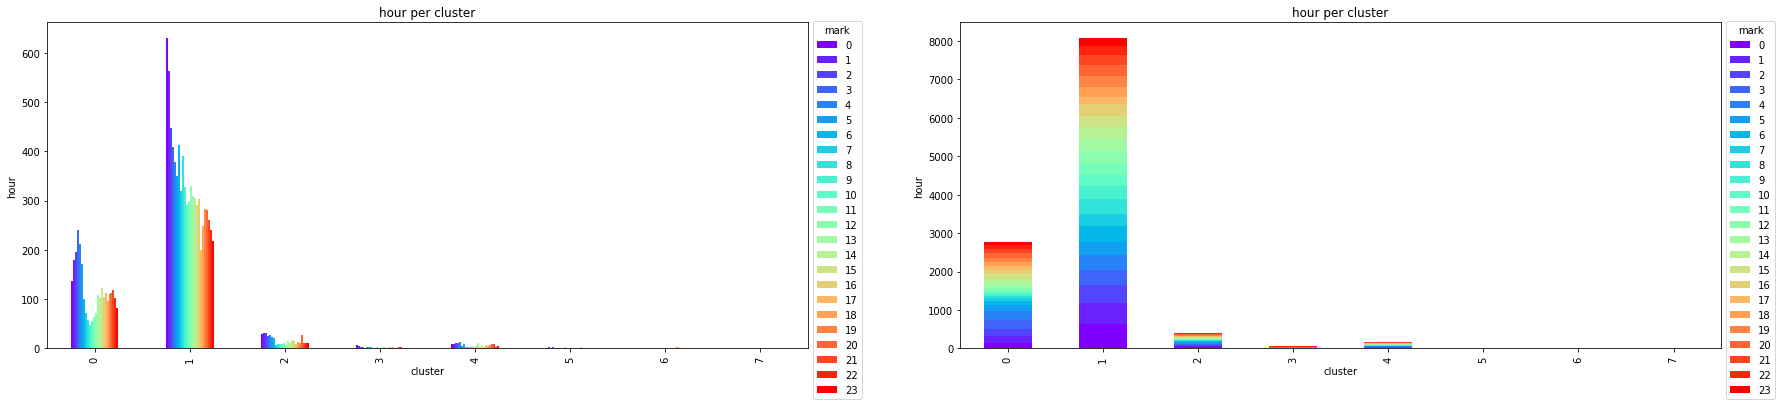

In [ ]:
for i in range(len(mod)):
  hour_ct = pd.crosstab(mod[i].labels_,users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

### Clusters characterization with respect to numerical features (Ward Method)

In [ ]:
cols = []
for i in range(len(mod)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(mod)):
  users_profile_all[cols[i]]=mod[i].labels_

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0           45825       187157.0          0.0          1201.0         868.0   
1           11770      1158520.0          0.0           969.0         766.0   
2           39158        92396.0          0.0           391.0          77.0   
3           18035       317861.0          0.0           209.0         488.0   
4           22496       138486.0          0.0          1714.0         185.0   

   ...  avg_textlen  days_on_tw  activity_richness  label_K=2  label_K=3  \
0  ...   109.637321        3900           0.608718          0          0   
1  ...    85.026719        3893           0.519137          0          0   
2  ...    80.780317        3885           0.551866          0          0   
3  ...    84.281111        3884           0.519310          0          0   
4  ...    95.166473        3870           0.887855          0          0   

   label_K=4  label_K=5  label_K=6  label_K=7  label_K=8  
0          0          2          0          0          0  
1          0          2          0          2          2  
2          0          2          0          0          0  
3          0          2          0          0          0  
4          0          2          0          0          0  

[5 rows x 40 columns]

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0            18151.713827   1.649684e+06     3332.198366    510.528005   
1              227.229950   1.628436e+04      404.641089     37.875371   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=2                                                                    
0          558.736873   1551.285881      116652.965286          598.630688   
1           23.094059     62.492822        3052.614356           56.329084   

           std_retweet_count  std_favorite_count  popularity  tweet_richness  \
label_K=2                                                                      
0                5078.370004           35.041637  962.852583        1.232472   
1                 281.546742            8.133345   65.907715        0.416662   

           text_entropy  avg_textlen   days_on_tw  activity_richness  
label_K=2                                                             
0              5.715218    71.546004  2164.149942           1.277952  
1              1.592138    69.770969  1674.865470           0.183796

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0            18250.413904   1.636933e+06     1492.062482    510.897037   
1              227.229950   1.628436e+04      404.641089     37.875371   
2              442.842105   3.937607e+06   333491.315789    444.315789   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=3                                                                    
0          560.083309   1556.191552      116696.834262          546.232326   
1           23.094059     62.492822        3052.614356           56.329084   
2          317.157895    671.105263      108781.947368        10000.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=3                                                        
0                4893.991795           22.573726    782.758546   
1                 281.546742            8.133345     65.907715   
2               38159.702464         2272.047306  33275.514378   

           tweet_richness  text_entropy  avg_textlen   days_on_tw  \
label_K=3                                                           
0                1.227723      5.744058    71.182485  2162.217659   
1                0.416662      1.592138    69.770969  1674.865470   
2                2.084607      0.540763   136.768900  2510.842105   

           activity_richness  
label_K=3                     
0                   1.283951  
1                   0.183796  
2                   0.201586

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0            18151.061997   1.097873e+06     1497.732936    507.162444   
1              227.229950   1.628436e+04      404.641089     37.875371   
2              442.842105   3.937607e+06   333491.315789    444.315789   
3            24423.111111   3.512851e+07     1139.759259    742.925926   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=4                                                                    
0          564.363338   1535.254247      110627.402981          550.061699   
1           23.094059     62.492822        3052.614356           56.329084   
2          317.157895    671.105263      108781.947368        10000.000000   
3          294.166667   2857.018519      493788.351852          308.314815   

           std_retweet_count  std_favorite_count    popularity  \
label_K=4                                                        
0                4268.573543           22.840659    605.979105   
1                 281.546742            8.133345     65.907715   
2               38159.702464         2272.047306  33275.514378   
3               43750.996140            5.989262  11765.999729   

           tweet_richness  text_entropy  avg_textlen   days_on_tw  \
label_K=4                                                           
0                1.228561      5.704064    71.170555  2167.456036   
1                0.416662      1.592138    69.770969  1674.865470   
2                2.084607      0.540763   136.768900  2510.842105   
3                1.175682      8.228857    71.923686  1836.759259   

           activity_richness  
label_K=4                     
0                   1.273476  
1                   0.183796  
2                   0.201586  
3                   1.934792

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0              442.842105   3.937607e+06   333491.315789    444.315789   
1              227.229950   1.628436e+04      404.641089     37.875371   
2            18571.840239   1.105769e+06      981.097928    514.712492   
3            24423.111111   3.512851e+07     1139.759259    742.925926   
4            10218.520710   9.490243e+05    11237.372781    364.828402   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=5                                                                    
0          317.157895    671.105263      108781.947368        10000.000000   
1           23.094059     62.492822        3052.614356           56.329084   
2          566.949466   1567.966416      111851.963905           87.857188   
3          294.166667   2857.018519      493788.351852          308.314815   
4          515.609467    918.562130       87541.893491         9263.573964   

           std_retweet_count  std_favorite_count    popularity  \
label_K=5                                                        
0               38159.702464         2272.047306  33275.514378   
1                 281.546742            8.133345     65.907715   
2                4095.189242            2.250660    536.683448   
3               43750.996140            5.989262  11765.999729   
4                7537.226694          411.004791   1912.345759   

           tweet_richness  text_entropy  avg_textlen   days_on_tw  \
label_K=5                                                           
0                2.084607      0.540763   136.768900  2510.842105   
1                0.416662      1.592138    69.770969  1674.865470   
2                1.245644      5.760812    70.406040  2169.310107   
3                1.175682      8.228857    71.923686  1836.759259   
4                0.906497      4.634241    85.583252  2132.502959   

           activity_richness  
label_K=5                     
0                   0.201586  
1                   0.183796  
2                   1.283658  
3                   1.934792  
4                   1.081522

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0            18571.840239   1.105769e+06      981.097928    514.712492   
1              227.229950   1.628436e+04      404.641089     37.875371   
2              898.444444   7.401423e+06   691678.555556    927.666667   
3            24423.111111   3.512851e+07     1139.759259    742.925926   
4            10218.520710   9.490243e+05    11237.372781    364.828402   
5               32.800000   8.201724e+05    11122.800000      9.300000   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=6                                                                    
0          566.949466   1567.966416      111851.963905           87.857188   
1           23.094059     62.492822        3052.614356           56.329084   
2          666.444444   1408.333333       61312.111111        10000.000000   
3          294.166667   2857.018519      493788.351852          308.314815   
4          515.609467    918.562130       87541.893491         9263.573964   
5            2.800000      7.600000      151504.800000        10000.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=6                                                        
0                4095.189242            2.250660    536.683448   
1                 281.546742            8.133345     65.907715   
2                7630.527796         1899.558309   8213.838731   
3               43750.996140            5.989262  11765.999729   
4                7537.226694          411.004791   1912.345759   
5               65635.959665         2607.287403  55831.022461   

           tweet_richness  text_entropy  avg_textlen   days_on_tw  \
label_K=6                                                           
0                1.245644      5.760812    70.406040  2169.310107   
1                0.416662      1.592138    69.770969  1674.865470   
2                2.933720      1.141612   111.864264  2553.888889   
3                1.175682      8.228857    71.923686  1836.759259   
4                0.906497      4.634241    85.583252  2132.502959   
5                1.320406      0.000000   159.183072  2472.100000   

           activity_richness  
label_K=6                     
0                   1.283658  
1                   0.183796  
2                   0.418700  
3                   1.934792  
4                   1.081522  
5                   0.006184

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0            18551.800287   6.970003e+05      978.632543    496.887213   
1              227.229950   1.628436e+04      404.641089     37.875371   
2            18710.624378   3.936641e+06      998.171642    638.159204   
3            24423.111111   3.512851e+07     1139.759259    742.925926   
4            10218.520710   9.490243e+05    11237.372781    364.828402   
5               32.800000   8.201724e+05    11122.800000      9.300000   
6              898.444444   7.401423e+06   691678.555556    927.666667   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=7                                                                    
0          596.364943   1529.789511       64886.263290           87.931034   
1           23.094059     62.492822        3052.614356           56.329084   
2          363.236318   1832.355721      437106.965174           87.345771   
3          294.166667   2857.018519      493788.351852          308.314815   
4          515.609467    918.562130       87541.893491         9263.573964   
5            2.800000      7.600000      151504.800000        10000.000000   
6          666.444444   1408.333333       61312.111111        10000.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=7                                                        
0                2464.344145            2.239770    379.199977   
1                 281.546742            8.133345     65.907715   
2               15389.400068            2.326076   1627.315241   
3               43750.996140            5.989262  11765.999729   
4                7537.226694          411.004791   1912.345759   
5               65635.959665         2607.287403  55831.022461   
6                7630.527796         1899.558309   8213.838731   

           tweet_richness  text_entropy  avg_textlen   days_on_tw  \
label_K=7                                                           
0                1.261467      5.676275    70.458184  2170.655172   
1                0.416662      1.592138    69.770969  1674.865470   
2                1.136067      6.346262    70.044921  2159.995025   
3                1.175682      8.228857    71.923686  1836.759259   
4                0.906497      4.634241    85.583252  2132.502959   
5                1.320406      0.000000   159.183072  2472.100000   
6                2.933720      1.141612   111.864264  2553.888889   

           activity_richness  
label_K=7                     
0                   1.272411  
1                   0.183796  
2                   1.361548  
3                   1.934792  
4                   1.081522  
5                   0.006184  
6                   0.418700

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0            18591.819654   6.985044e+05      980.745860    496.946004   
1              227.229950   1.628436e+04      404.641089     37.875371   
2            18710.624378   3.936641e+06      998.171642    638.159204   
3            24423.111111   3.512851e+07     1139.759259    742.925926   
4            10218.520710   9.490243e+05    11237.372781    364.828402   
5               32.800000   8.201724e+05    11122.800000      9.300000   
6              898.444444   7.401423e+06   691678.555556    927.666667   
7               22.833333   6.226667e+02        0.166667    469.666667   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=8                                                                    
0          596.931965   1532.732901       65025.733981           88.120590   
1           23.094059     62.492822        3052.614356           56.329084   
2          363.236318   1832.355721      437106.965174           87.345771   
3          294.166667   2857.018519      493788.351852          308.314815   
4          515.609467    918.562130       87541.893491         9263.573964   
5            2.800000      7.600000      151504.800000        10000.000000   
6          666.444444   1408.333333       61312.111111        10000.000000   
7          333.833333    167.000000         311.333333            0.166667   

           std_retweet_count  std_favorite_count    popularity  \
label_K=8                                                        
0                2469.480853            2.244539    379.962897   
1                 281.546742            8.133345     65.907715   
2               15389.400068            2.326076   1627.315241   
3               43750.996140            5.989262  11765.999729   
4                7537.226694          411.004791   1912.345759   
5               65635.959665         2607.287403  55831.022461   
6                7630.527796         1899.558309   8213.838731   
7                  86.047988            0.031475     25.968359   

           tweet_richness  text_entropy  avg_textlen   days_on_tw  \
label_K=8                                                           
0                1.184181      5.685971    70.464503  2171.522318   
1                0.416662      1.592138    69.770969  1674.865470   
2                1.136067      6.346262    70.044921  2159.995025   
3                1.175682      8.228857    71.923686  1836.759259   
4                0.906497      4.634241    85.583252  2132.502959   
5                1.320406      0.000000   159.183072  2472.100000   
6                2.933720      1.141612   111.864264  2553.888889   
7               37.044782      1.187399    67.532640  1769.166667   

           activity_richness  
label_K=8                     
0                   1.275127  
1                   0.183796  
2                   1.361548  
3                   1.934792  
4                   1.081522  
5                   0.006184  
6                   0.418700  
7                   0.014940

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0            27479.332428   5.280337e+06    36255.711836    803.869861   
1             1211.542145   1.093487e+05     3763.992903    102.063060   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=2                                                                    
0          685.903906   1342.271864      151006.805552         2163.366008   
1           99.191521    190.450013       12822.284856          315.255088   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=2                                                                       
0                8978.419869          215.504458  3743.024311        1.895313   
1                1042.848632           45.288772   287.249693        0.392943   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=2                                                            
0              5.014628    19.547348  635.343344           0.742672  
1              2.463387    15.143955  438.348228           0.326132

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0            27523.876085   5.285108e+06     3176.406364    805.135306   
1             1211.542145   1.093487e+05     3763.992903    102.063060   
2              563.834517   3.785596e+06   364210.501375    540.324496   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=3                                                                    
0          686.984582   1343.100350      151388.345749         2052.008184   
1           99.191521    190.450013       12822.284856          315.255088   
2          392.111133    811.322781       46471.794663            0.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=3                                                        
0                8381.082667          130.577728   2228.584322   
1                1042.848632           45.288772    287.249693   
2               29778.626066          549.719737  24875.588493   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=3                                                          
0                1.898550      5.010712    18.887021  636.183976   
1                0.392943      2.463387    15.143955  438.348228   
2                0.834294      2.357133    26.326334  310.049685   

           activity_richness  
label_K=3                     
0                   0.740136  
1                   0.326132  
2                   0.253537

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0            27648.524876   2.193989e+06     3176.196499    808.155983   
1             1211.542145   1.093487e+05     3763.992903    102.063060   
2              563.834517   3.785596e+06   364210.501375    540.324496   
3            17239.582244   1.817254e+07     3199.343641    544.375767   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=4                                                                    
0          690.743031   1336.619160      144751.255967         2060.690012   
1           99.191521    190.450013       12822.284856          315.255088   
2          392.111133    811.322781       46471.794663            0.000000   
3          282.772110   1088.674432       22826.381294         1404.285501   

           std_retweet_count  std_favorite_count    popularity  \
label_K=4                                                        
0                6596.755770          131.572078   1527.987547   
1                1042.848632           45.288772    287.249693   
2               29778.626066          549.719737  24875.588493   
3               14132.023652           24.323015   6835.591631   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=4                                                          
0                1.913253      5.007024    18.978491  636.775430   
1                0.392943      2.463387    15.143955  438.348228   
2                0.834294      2.357133    26.326334  310.049685   
3                0.350765      4.639747    11.987372  505.036779   

           activity_richness  
label_K=4                     
0                   0.735817  
1                   0.326132  
2                   0.253537  
3                   0.723206

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0              563.834517   3.785596e+06   364210.501375    540.324496   
1             1211.542145   1.093487e+05     3763.992903    102.063060   
2            28082.480644   2.176132e+06     2044.903671    814.657293   
3            17239.582244   1.817254e+07     3199.343641    544.375767   
4            15615.068430   2.509632e+06     4651.925894    659.943071   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=5                                                                    
0          392.111133    811.322781       46471.794663            0.000000   
1           99.191521    190.450013       12822.284856          315.255088   
2          686.504967   1337.664432      145914.326973          368.770481   
3          282.772110   1088.674432       22826.381294         1404.285501   
4          766.880230   1158.155177      118760.058551         1330.564800   

           std_retweet_count  std_favorite_count    popularity  \
label_K=5                                                        
0               29778.626066          549.719737  24875.588493   
1                1042.848632           45.288772    287.249693   
2                6082.809573            6.706470   1140.372564   
3               14132.023652           24.323015   6835.591631   
4               12490.098862          430.284993   4488.804061   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=5                                                          
0                0.834294      2.357133    26.326334  310.049685   
1                0.392943      2.463387    15.143955  438.348228   
2                1.957822      5.013905    17.967523  640.204849   
3                0.350765      4.639747    11.987372  505.036779   
4                0.549164      4.764432    29.161585  568.839264   

           activity_richness  
label_K=5                     
0                   0.253537  
1                   0.326132  
2                   0.724397  
3                   0.723206  
4                   0.906516

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0            28082.480644   2.176132e+06     2044.903671    814.657293   
1             1211.542145   1.093487e+05     3763.992903    102.063060   
2              521.143241   2.564940e+06   155603.564075    396.870256   
3            17239.582244   1.817254e+07     3199.343641    544.375767   
4            15615.068430   2.509632e+06     4651.925894    659.943071   
5                3.938415   1.315816e+05     3161.681894      1.567021   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=6                                                                    
0          686.504967   1337.664432      145914.326973          368.770481   
1           99.191521    190.450013       12822.284856          315.255088   
2          291.824909    565.071456        6523.089901            0.000000   
3          282.772110   1088.674432       22826.381294         1404.285501   
4          766.880230   1158.155177      118760.058551         1330.564800   
5            0.918937      1.429841          19.469634            0.000000   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=6                                                                       
0                6082.809573            6.706470  1140.372564        1.957822   
1                1042.848632           45.288772   287.249693        0.392943   
2                 752.251154          425.573488   910.294529        0.110188   
3               14132.023652           24.323015  6835.591631        0.350765   
4               12490.098862          430.284993  4488.804061        0.549164   
5                1473.829531          423.996614  6594.454218        0.106844   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=6                                                            
0              5.013905    17.967523  640.204849           0.724397  
1              2.463387    15.143955  438.348228           0.326132  
2              3.424835     2.638412  372.306475           0.209455  
3              4.639747    11.987372  505.036779           0.723206  
4              4.764432    29.161585  568.839264           0.906516  
5              0.000000    14.195290  255.988476           0.001508

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0            28309.576365   1.062295e+06     2056.062701    828.075324   
1             1211.542145   1.093487e+05     3763.992903    102.063060   
2            26489.469097   4.537307e+06     1968.279419    703.464327   
3            17239.582244   1.817254e+07     3199.343641    544.375767   
4            15615.068430   2.509632e+06     4651.925894    659.943071   
5                3.938415   1.315816e+05     3161.681894      1.567021   
6              521.143241   2.564940e+06   155603.564075    396.870256   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=7                                                                    
0          709.523123   1358.464309       73241.662007          381.764740   
1           99.191521    190.450013       12822.284856          315.255088   
2          449.265887   1150.832703      102512.737013          262.003164   
3          282.772110   1088.674432       22826.381294         1404.285501   
4          766.880230   1158.155177      118760.058551         1330.564800   
5            0.918937      1.429841          19.469634            0.000000   
6          291.824909    565.071456        6523.089901            0.000000   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=7                                                                       
0                3136.449832            6.785924   853.825299        2.086380   
1                1042.848632           45.288772   287.249693        0.392943   
2                8903.232738            6.135334  1976.078693        0.469624   
3               14132.023652           24.323015  6835.591631        0.350765   
4               12490.098862          430.284993  4488.804061        0.549164   
5                1473.829531          423.996614  6594.454218        0.106844   
6                 752.251154          425.573488   910.294529        0.110188   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=7                                                            
0              5.006469    18.193468  630.193523           0.704304  
1              2.463387    15.143955  438.348228           0.326132  
2              5.032478    16.333508  706.436278           0.847541  
3              4.639747    11.987372  505.036779           0.723206  
4              4.764432    29.161585  568.839264           0.906516  
5              0.000000    14.195290  255.988476           0.001508  
6              3.424835     2.638412  372.306475           0.209455

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0            28327.024296   1.062948e+06     2057.779030    828.681306   
1             1211.542145   1.093487e+05     3763.992903    102.063060   
2            26489.469097   4.537307e+06     1968.279419    703.464327   
3            17239.582244   1.817254e+07     3199.343641    544.375767   
4            15615.068430   2.509632e+06     4651.925894    659.943071   
5                3.938415   1.315816e+05     3161.681894      1.567021   
6              521.143241   2.564940e+06   155603.564075    396.870256   
7                3.488075   1.525216e+03        0.408248    514.156656   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=8                                                                    
0          709.846032   1358.341392       73259.137424          382.155118   
1           99.191521    190.450013       12822.284856          315.255088   
2          449.265887   1150.832703      102512.737013          262.003164   
3          282.772110   1088.674432       22826.381294         1404.285501   
4          766.880230   1158.155177      118760.058551         1330.564800   
5            0.918937      1.429841          19.469634            0.000000   
6          291.824909    565.071456        6523.089901            0.000000   
7          516.398457    408.085775         762.607807            0.408248   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=8                                                                       
0                3137.872641            6.792473   854.584884        1.245298   
1                1042.848632           45.288772   287.249693        0.392943   
2                8903.232738            6.135334  1976.078693        0.469624   
3               14132.023652           24.323015  6835.591631        0.350765   
4               12490.098862          430.284993  4488.804061        0.549164   
5                1473.829531          423.996614  6594.454218        0.106844   
6                 752.251154          425.573488   910.294529        0.110188   
7                 210.773663            0.077099    63.538941        4.660490   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=8                                                            
0              5.007166    18.208478  630.577965           0.702633  
1              2.463387    15.143955  438.348228           0.326132  
2              5.032478    16.333508  706.436278           0.847541  
3              4.639747    11.987372  505.036779           0.723206  
4              4.764432    29.161585  568.839264           0.906516  
5              0.000000    14.195290  255.988476           0.001508  
6              3.424835     2.638412  372.306475           0.209455  
7              1.404109     9.134276  116.295170           0.001408

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0                  200000     99360670.0        822127.0       16228.0   
1                   35054      3339941.0        221102.0        1504.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=2                                                                  
0            4335.0       13664.0           500000.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   

           std_retweet_count  std_favorite_count  popularity  tweet_richness  \
label_K=2                                                                      
0              106034.982635         3722.299247   69042.400       41.833333   
1               24504.942691          598.158006    8539.625        4.148760   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=2                                                            
0             11.821278        189.0        3900           4.148438  
1             11.745359        245.0        3533           2.914443

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0                  200000     99360670.0         55397.0       16228.0   
1                   35054      3339941.0        221102.0        1504.0   
2                    1576     10474874.0        822127.0        1515.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=3                                                                  
0            4335.0       13664.0           500000.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   
2            1052.0        2143.0           151542.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=3                                                        
0              106034.982635         1997.739832  36148.675676   
1               24504.942691          598.158006   8539.625000   
2               69510.395858         3722.299247  69042.400000   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=3                                                          
0               41.833333     11.821278   165.230769        3900   
1                4.148760     11.745359   245.000000        3533   
2                3.043548     10.274506   189.000000        3068   

           activity_richness  
label_K=3                     
0                   4.148438  
1                   2.914443  
2                   0.690593

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0                  200000     24599059.0         55397.0       16228.0   
1                   35054      3339941.0        221102.0        1504.0   
2                    1576     10474874.0        822127.0        1515.0   
3                   74003     99360670.0         21783.0        2418.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=4                                                                  
0            4335.0       13664.0           500000.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   
2            1052.0        2143.0           151542.0             10000.0   
3            1536.0        6193.0           500000.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=4                                                        
0               55031.371267         1997.739832  24529.702703   
1               24504.942691          598.158006   8539.625000   
2               69510.395858         3722.299247  69042.400000   
3              106034.982635          171.047654  36148.675676   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=4                                                          
0               41.833333     11.821278   165.230769        3900   
1                4.148760     11.745359   245.000000        3533   
2                3.043548     10.274506   189.000000        3068   
3                2.019022     11.742016    93.394045        2888   

           activity_richness  
label_K=4                     
0                   4.148438  
1                   2.914443  
2                   0.690593  
3                   3.471537

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0                    1576     10474874.0        822127.0        1515.0   
1                   35054      3339941.0        221102.0        1504.0   
2                  200000     24599059.0         55397.0       16228.0   
3                   74003     99360670.0         21783.0        2418.0   
4                   82176     19440560.0         50194.0        5214.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=5                                                                  
0            1052.0        2143.0           151542.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   
2            3842.0       13664.0           500000.0             10000.0   
3            1536.0        6193.0           500000.0             10000.0   
4            4335.0        4527.0           500000.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=5                                                        
0               69510.395858         3722.299247  69042.400000   
1               24504.942691          598.158006   8539.625000   
2               55031.371267          164.845066  18511.666667   
3              106034.982635          171.047654  36148.675676   
4               51435.140792         1997.739832  24529.702703   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=5                                                          
0                3.043548     10.274506   189.000000        3068   
1                4.148760     11.745359   245.000000        3533   
2               41.833333     11.821278   134.218102        3900   
3                2.019022     11.742016    93.394045        2888   
4                3.024194     11.738812   165.230769        3308   

           activity_richness  
label_K=5                     
0                   0.690593  
1                   2.914443  
2                   4.148438  
3                   3.471537  
4                   4.101197

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0                  200000     24599059.0         55397.0       16228.0   
1                   35054      3339941.0        221102.0        1504.0   
2                    1576     10474874.0        822127.0        1515.0   
3                   74003     99360670.0         21783.0        2418.0   
4                   82176     19440560.0         50194.0        5214.0   
5                      41      1034580.0         20121.0          12.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=6                                                                  
0            3842.0       13664.0           500000.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   
2            1052.0        2143.0            69142.0             10000.0   
3            1536.0        6193.0           500000.0             10000.0   
4            4335.0        4527.0           500000.0             10000.0   
5               5.0          10.0           151542.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=6                                                        
0               55031.371267          164.845066  18511.666667   
1               24504.942691          598.158006   8539.625000   
2                9054.949051         2418.401650   9651.711290   
3              106034.982635          171.047654  36148.675676   
4               51435.140792         1997.739832  24529.702703   
5               69510.395858         3722.299247  69042.400000   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=6                                                          
0               41.833333     11.821278   134.218102        3900   
1                4.148760     11.745359   245.000000        3533   
2                3.043548     10.274506   116.341812        3068   
3                2.019022     11.742016    93.394045        2888   
4                3.024194     11.738812   165.230769        3308   
5                1.500000      0.000000   189.000000        2868   

           activity_richness  
label_K=6                     
0                   4.148438  
1                   2.914443  
2                   0.690593  
3                   3.471537  
4                   4.101197  
5                   0.008707

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0                  200000      9952394.0         55397.0       16228.0   
1                   35054      3339941.0        221102.0        1504.0   
2                  200000     24599059.0         29679.0        4544.0   
3                   74003     99360670.0         21783.0        2418.0   
4                   82176     19440560.0         50194.0        5214.0   
5                      41      1034580.0         20121.0          12.0   
6                    1576     10474874.0        822127.0        1515.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=7                                                                  
0            3842.0       13664.0           500000.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   
2            3104.0        5806.0           500000.0              3008.0   
3            1536.0        6193.0           500000.0             10000.0   
4            4335.0        4527.0           500000.0             10000.0   
5               5.0          10.0           151542.0             10000.0   
6            1052.0        2143.0            69142.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=7                                                        
0               29994.240548          164.845066  18511.666667   
1               24504.942691          598.158006   8539.625000   
2               55031.371267           79.849031  17931.239006   
3              106034.982635          171.047654  36148.675676   
4               51435.140792         1997.739832  24529.702703   
5               69510.395858         3722.299247  69042.400000   
6                9054.949051         2418.401650   9651.711290   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=7                                                          
0               41.833333     11.821278   134.218102        3900   
1                4.148760     11.745359   245.000000        3533   
2                2.566038     11.778388   118.519065        3893   
3                2.019022     11.742016    93.394045        2888   
4                3.024194     11.738812   165.230769        3308   
5                1.500000      0.000000   189.000000        2868   
6                3.043548     10.274506   116.341812        3068   

           activity_richness  
label_K=7                     
0                   4.148438  
1                   2.914443  
2                   4.105727  
3                   3.471537  
4                   4.101197  
5                   0.008707  
6                   0.690593

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0                  200000      9952394.0         55397.0       16228.0   
1                   35054      3339941.0        221102.0        1504.0   
2                  200000     24599059.0         29679.0        4544.0   
3                   74003     99360670.0         21783.0        2418.0   
4                   82176     19440560.0         50194.0        5214.0   
5                      41      1034580.0         20121.0          12.0   
6                    1576     10474874.0        822127.0        1515.0   
7                      29         3736.0             1.0        1001.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=8                                                                  
0            3842.0       13664.0           500000.0             10000.0   
1            1799.0        3497.0           216217.0              6320.0   
2            3104.0        5806.0           500000.0              3008.0   
3            1536.0        6193.0           500000.0             10000.0   
4            4335.0        4527.0           500000.0             10000.0   
5               5.0          10.0           151542.0             10000.0   
6            1052.0        2143.0            69142.0             10000.0   
7            1001.0        1000.0             1868.0                 1.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=8                                                        
0               29994.240548          164.845066  18511.666667   
1               24504.942691          598.158006   8539.625000   
2               55031.371267           79.849031  17931.239006   
3              106034.982635          171.047654  36148.675676   
4               51435.140792         1997.739832  24529.702703   
5               69510.395858         3722.299247  69042.400000   
6                9054.949051         2418.401650   9651.711290   
7                 516.287926            0.188853    155.666667   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=8                                                          
0               22.021739     11.821278   134.218102        3900   
1                4.148760     11.745359   245.000000        3533   
2                2.566038     11.778388   118.519065        3893   
3                2.019022     11.742016    93.394045        2888   
4                3.024194     11.738812   165.230769        3308   
5                1.500000      0.000000   189.000000        2868   
6                3.043548     10.274506   116.341812        3068   
7               41.833333      3.249944    77.045455        1919   

           activity_richness  
label_K=8                     
0                   4.148438  
1                   2.914443  
2                   4.105727  
3                   3.471537  
4                   4.101197  
5                   0.008707  
6                   0.690593  
7                   0.017718

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','num_mentions','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','text_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0                       1            0.0             0.0           0.0   
1                       0            0.0             0.0           0.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=2                                                                  
0               0.0           0.0                0.0                 0.0   
1               0.0           0.0                0.0                 0.0   

           std_retweet_count  std_favorite_count  popularity  tweet_richness  \
label_K=2                                                                      
0                        0.0                 0.0         0.0        0.005892   
1                        0.0                 0.0         0.0        0.000000   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=2                                                            
0                   0.0    21.107632         890           0.000500  
1                   0.0     3.000000         893           0.000319

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0                       1            0.0             0.0           0.0   
1                       0            0.0             0.0           0.0   
2                      24       674398.0         10103.0           7.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=3                                                                  
0               0.0           0.0                0.0                 0.0   
1               0.0           0.0                0.0                 0.0   
2               2.0           6.0            46559.0             10000.0   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=3                                                                       
0                    0.00000            0.000000     0.000000        0.005892   
1                    0.00000            0.000000     0.000000        0.000000   
2                 6900.52577          997.037438  6873.451838        1.117647   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=3                                                            
0                   0.0    21.107632         890           0.000500  
1                   0.0     3.000000         893           0.000319  
2                   0.0   108.440111        2069           0.004533

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0                       1            0.0             0.0           0.0   
1                       0            0.0             0.0           0.0   
2                      24       674398.0         10103.0           7.0   
3                      37      1337497.0             4.0          21.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=4                                                                  
0               0.0           0.0                0.0                 0.0   
1               0.0           0.0                0.0                 0.0   
2               2.0           6.0            46559.0             10000.0   
3               3.0          26.0           401304.0                 1.0   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=4                                                                       
0                   0.000000            0.000000     0.000000        0.005892   
1                   0.000000            0.000000     0.000000        0.000000   
2                6900.525770          997.037438  6873.451838        1.117647   
3               23656.433536            0.088165  5103.692308        0.463396   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=4                                                            
0                   0.0    21.107632         890           0.000500  
1                   0.0     3.000000         893           0.000319  
2                   0.0   108.440111        2069           0.004533  
3                   0.0    47.685967         996           0.029671

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0                      24       674398.0         10103.0           7.0   
1                       0            0.0             0.0           0.0   
2                       1            0.0             0.0           0.0   
3                      37      1337497.0             4.0          21.0   
4                      12            2.0          5041.0           0.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=5                                                                  
0               2.0           6.0            46559.0             10000.0   
1               0.0           0.0                0.0                 0.0   
2               0.0           0.0                0.0                 0.0   
3               3.0          26.0           401304.0                 1.0   
4               0.0           0.0                1.0              5000.0   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=5                                                                       
0                6900.525770          997.037438  6873.451838        1.117647   
1                   0.000000            0.000000     0.000000        0.000000   
2                   0.000000            0.000000     0.000000        0.005892   
3               23656.433536            0.088165  5103.692308        0.463396   
4                   0.054327           81.791432     1.359475        0.060421   

           text_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=5                                                            
0                   0.0   108.440111        2069           0.004533  
1                   0.0     3.000000         893           0.000319  
2                   0.0    25.117843         890           0.000500  
3                   0.0    47.685967         996           0.029671  
4                   0.0    21.107632         919           0.010248

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0                       1            0.0             0.0           0.0   
1                       0            0.0             0.0           0.0   
2                      24      4822308.0        371197.0         540.0   
3                      37      1337497.0             4.0          21.0   
4                      12            2.0          5041.0           0.0   
5                      28       674398.0         10103.0           7.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=6                                                                  
0               0.0           0.0                0.0                 0.0   
1               0.0           0.0                0.0                 0.0   
2             363.0         750.0            46559.0             10000.0   
3               3.0          26.0           401304.0                 1.0   
4               0.0           0.0                1.0              5000.0   
5               2.0           6.0           151492.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=6                                                        
0                   0.000000            0.000000      0.000000   
1                   0.000000            0.000000      0.000000   
2                6900.525770          997.037438   6873.451838   
3               23656.433536            0.088165   5103.692308   
4                   0.054327           81.791432      1.359475   
5               64439.140920         2177.851049  48132.352941   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=6                                                          
0                0.005892           0.0    25.117843         890   
1                0.000000           0.0     3.000000         893   
2                2.712182           0.0   108.440111        2069   
3                0.463396           0.0    47.685967         996   
4                0.060421           0.0    21.107632         919   
5                1.117647           0.0   141.166667        2100   

           activity_richness  
label_K=6                     
0                   0.000500  
1                   0.000319  
2                   0.216816  
3                   0.029671  
4                   0.010248  
5                   0.004533

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0                       1            0.0             0.0           0.0   
1                       0            0.0             0.0           0.0   
2                      41       217722.0             0.0           0.0   
3                      37      1337497.0             4.0          21.0   
4                      12            2.0          5041.0           0.0   
5                      28       674398.0         10103.0           7.0   
6                      24      4822308.0        371197.0         540.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=7                                                                  
0               0.0           0.0                0.0                 0.0   
1               0.0           0.0                0.0                 0.0   
2               0.0           0.0            99369.0                 0.0   
3               3.0          26.0           401304.0                 1.0   
4               0.0           0.0                1.0              5000.0   
5               2.0           6.0           151492.0             10000.0   
6             363.0         750.0            46559.0             10000.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=7                                                        
0                   0.000000            0.000000      0.000000   
1                   0.000000            0.000000      0.000000   
2                3384.436971            0.000000    132.380236   
3               23656.433536            0.088165   5103.692308   
4                   0.054327           81.791432      1.359475   
5               64439.140920         2177.851049  48132.352941   
6                6900.525770          997.037438   6873.451838   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=7                                                          
0                0.005892           0.0    25.117843         890   
1                0.000000           0.0     3.000000         893   
2                0.084900           0.0    38.092199         908   
3                0.463396           0.0    47.685967         996   
4                0.060421           0.0    21.107632         919   
5                1.117647           0.0   141.166667        2100   
6                2.712182           0.0   108.440111        2069   

           activity_richness  
label_K=7                     
0                   0.000500  
1                   0.000319  
2                   0.055198  
3                   0.029671  
4                   0.010248  
5                   0.004533  
6                   0.216816

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0                       1            0.0             0.0           0.0   
1                       0            0.0             0.0           0.0   
2                      41       217722.0             0.0           0.0   
3                      37      1337497.0             4.0          21.0   
4                      12            2.0          5041.0           0.0   
5                      28       674398.0         10103.0           7.0   
6                      24      4822308.0        371197.0         540.0   
7                      20            0.0             0.0           2.0   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
label_K=8                                                                  
0               0.0           0.0                0.0                 0.0   
1               0.0           0.0                0.0                 0.0   
2               0.0           0.0            99369.0                 0.0   
3               3.0          26.0           401304.0                 1.0   
4               0.0           0.0                1.0              5000.0   
5               2.0           6.0           151492.0             10000.0   
6             363.0         750.0            46559.0             10000.0   
7               0.0           0.0                0.0                 0.0   

           std_retweet_count  std_favorite_count    popularity  \
label_K=8                                                        
0                   0.000000            0.000000      0.000000   
1                   0.000000            0.000000      0.000000   
2                3384.436971            0.000000    132.380236   
3               23656.433536            0.088165   5103.692308   
4                   0.054327           81.791432      1.359475   
5               64439.140920         2177.851049  48132.352941   
6                6900.525770          997.037438   6873.451838   
7                   0.000000            0.000000      0.000000   

           tweet_richness  text_entropy  avg_textlen  days_on_tw  \
label_K=8                                                          
0                0.005892           0.0    25.117843         890   
1                0.000000           0.0     3.000000         893   
2                0.084900           0.0    38.092199         908   
3                0.463396           0.0    47.685967         996   
4                0.060421           0.0    21.107632         919   
5                1.117647           0.0   141.166667        2100   
6                2.712182           0.0   108.440111        2069   
7               29.676471           0.0    55.260870        1686   

           activity_richness  
label_K=8                     
0                   0.000500  
1                   0.000319  
2                   0.055198  
3                   0.029671  
4                   0.010248  
5                   0.004533  
6                   0.216816  
7                   0.014070

##  Hierarchical Clustering --> Without outliers

### Loading users_profile No Outliers

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering_noout.csv', lineterminator='\n')

In [ ]:
users_profile

statuses_count  retweet_count  favorite_count  num_hashtags  num_urls  \
0            6237.625     138813.625        1031.125         297.5     245.0   
1            6237.625     138813.625         969.000         297.5     245.0   
2            6237.625      92396.000         391.000          77.0     245.0   
3            6237.625     138813.625         209.000         297.5     245.0   
4            6237.625     138486.000        1031.125         185.0     234.0   
...               ...            ...             ...           ...       ...   
11503        6237.625          7.000          85.000         297.5     245.0   
11504          96.000       8860.000         161.000          21.0       1.0   
11505         107.000       2458.000           9.000          22.0      47.0   
11506           6.000          0.000           1.000           0.0       1.0   
11507         133.000     138813.625           2.000          50.0      47.0   

       max_retweet_count  max_favorite_count  std_retweet_count  \
0                21325.0                34.0         723.522858   
1               296689.0                19.0       11508.209770   
2                13121.0                 8.0         546.629170   
3               105138.0                 7.0        3359.356296   
4                16181.0                32.0         462.741573   
...                  ...                 ...                ...   
11503                1.0                 3.0           0.043355   
11504             6181.0                18.0         611.718156   
11505              976.0                 1.0         103.166369   
11506                0.0                 1.0           0.000000   
11507            59592.0                 1.0        9474.647903   

       std_favorite_count   popularity  tweet_richness  retcount_entropy  \
0                1.419478    79.342039        1.812974          6.080426   
1                1.078419   573.720435        1.221178          0.000000   
2                0.490437    43.277519        1.169776          2.375534   
3                0.392886   157.694596        1.393654          0.000000   
4                1.166943    40.803260        0.896682          2.354578   
...                   ...          ...             ...               ...   
11503            0.154787     0.024751        0.591606          3.797743   
11504            2.666807    82.761468        0.908257          0.000000   
11505            0.256601    19.425197        0.811024          1.331542   
11506            0.372678     0.166667        0.500000          0.000000   
11507            0.116237  3601.835616        1.568493          3.621076   

       avg_textlen  days_on_tw  activity_richness  
0       109.637321        3900           0.608718  
1        85.026719        3893           0.519137  
2        80.780317        3885           0.551866  
3        84.281111        3884           0.519310  
4        95.166473        3870           0.887855  
...            ...         ...                ...  
11503    46.490945         896           4.148438  
11504    84.586538         894           0.121924  
11505    82.080645         894           0.142058  
11506    26.666667         893           0.006719  
11507    89.316901         890           0.164045  

[11508 rows x 15 columns]

In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  float64
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   max_retweet_count   11508 non-null  float64
 6   max_favorite_count  11508 non-null  float64
 7   std_retweet_count   11508 non-null  float64
 8   std_favorite_count  11508 non-null  float64
 9   popularity          11508 non-null  float64
 10  tweet_richness      11508 non-null  float64
 11  retcount_entropy    11508 non-null  float64
 12  avg_textlen         11508 non-null  float64
 13  days_on_tw          11508 non-null  int64  
 14  activity_richness   11508 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.3 MB


### Check for correlations

In [ ]:
users_profile.corr()

statuses_count  retweet_count  favorite_count  \
statuses_count            1.000000       0.693730        0.510523   
retweet_count             0.693730       1.000000        0.520187   
favorite_count            0.510523       0.520187        1.000000   
num_hashtags              0.628368       0.668553        0.520556   
num_urls                  0.786438       0.581512        0.444962   
max_retweet_count         0.457679       0.655317        0.317205   
max_favorite_count        0.092276       0.144100        0.342583   
std_retweet_count         0.275304       0.520342        0.243997   
std_favorite_count       -0.036239       0.103557        0.249168   
popularity                0.081600       0.252473        0.144537   
tweet_richness            0.196728       0.241530        0.107197   
retcount_entropy          0.474818       0.444731        0.390373   
avg_textlen               0.032629       0.007805        0.153141   
days_on_tw                0.431475       0.326620        0.287846   
activity_richness         0.783855       0.563670        0.588661   

                    num_hashtags  num_urls  max_retweet_count  \
statuses_count          0.628368  0.786438           0.457679   
retweet_count           0.668553  0.581512           0.655317   
favorite_count          0.520556  0.444962           0.317205   
num_hashtags            1.000000  0.688419           0.436069   
num_urls                0.688419  1.000000           0.377926   
max_retweet_count       0.436069  0.377926           1.000000   
max_favorite_count      0.099365  0.116790           0.079551   
std_retweet_count       0.285859  0.229338           0.768317   
std_favorite_count      0.000581  0.002599           0.047868   
popularity              0.093723  0.072142           0.323226   
tweet_richness          0.320630  0.286448           0.143023   
retcount_entropy        0.459968  0.412966           0.278995   
avg_textlen             0.289198  0.259454          -0.016815   
days_on_tw              0.441272  0.456540           0.175121   
activity_richness       0.587154  0.707092           0.413420   

                    max_favorite_count  std_retweet_count  std_favorite_count  \
statuses_count                0.092276           0.275304           -0.036239   
retweet_count                 0.144100           0.520342            0.103557   
favorite_count                0.342583           0.243997            0.249168   
num_hashtags                  0.099365           0.285859            0.000581   
num_urls                      0.116790           0.229338            0.002599   
max_retweet_count             0.079551           0.768317            0.047868   
max_favorite_count            1.000000           0.229281            0.646514   
std_retweet_count             0.229281           1.000000            0.375111   
std_favorite_count            0.646514           0.375111            1.000000   
popularity                    0.309205           0.761421            0.667487   
tweet_richness                0.049502           0.119150            0.052472   
retcount_entropy              0.053943           0.170721           -0.026931   
avg_textlen                   0.168527           0.091734            0.230110   
days_on_tw                    0.099156           0.108707            0.076952   
activity_richness             0.112104           0.261621           -0.037039   

                    popularity  tweet_richness  retcount_entropy  avg_textlen  \
statuses_count        0.081600        0.196728          0.474818     0.032629   
retweet_count         0.252473        0.241530          0.444731     0.007805   
favorite_count        0.144537        0.107197          0.390373     0.153141   
num_hashtags          0.093723        0.320630          0.459968     0.289198   
num_urls              0.072142        0.286448          0.412966     0.259454   
max_retweet_count     0.323226        0.143023          0.278995    -0.016815   
max_favori

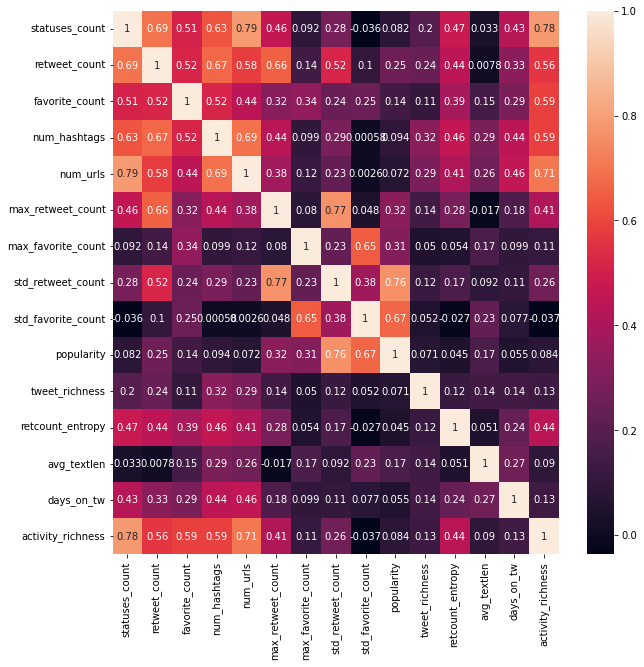

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(users_profile.corr(), annot=True)
plt.show()

These indicators’ correlations are below the set threshold value (0.8), indicating a weak association.

### Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(users_profile.values)

StandardScaler()

In [ ]:
users_profile.head().values

array([[6.23762500e+03, 1.38813625e+05, 1.03112500e+03, 2.97500000e+02,
        2.45000000e+02, 2.13250000e+04, 3.40000000e+01, 7.23522858e+02,
        1.41947839e+00, 7.93420388e+01, 1.81297388e+00, 6.08042594e+00,
        1.09637321e+02, 3.90000000e+03, 6.08717949e-01],
       [6.23762500e+03, 1.38813625e+05, 9.69000000e+02, 2.97500000e+02,
        2.45000000e+02, 2.96689000e+05, 1.90000000e+01, 1.15082098e+04,
        1.07841900e+00, 5.73720435e+02, 1.22117763e+00, 0.00000000e+00,
        8.50267194e+01, 3.89300000e+03, 5.19136912e-01],
       [6.23762500e+03, 9.23960000e+04, 3.91000000e+02, 7.70000000e+01,
        2.45000000e+02, 1.31210000e+04, 8.00000000e+00, 5.46629170e+02,
        4.90437268e-01, 4.32775187e+01, 1.16977612e+00, 2.37553356e+00,
        8.07803172e+01, 3.88500000e+03, 5.51866152e-01],
       [6.23762500e+03, 1.38813625e+05, 2.09000000e+02, 2.97500000e+02,
        2.45000000e+02, 1.05138000e+05, 7.00000000e+00, 3.35935630e+03,
        3.92886411e-01, 1.57694596e+0

In [ ]:
X = scaler.transform(users_profile.values)

In [ ]:
X[:5]

array([[ 1.87421842e+00,  1.81335330e+00,  2.01878891e+00,
         2.02814771e+00,  1.94677376e+00, -1.58836679e-01,
        -1.48893541e-01, -1.81452454e-01, -1.18609318e-01,
        -1.20992222e-01,  1.00483459e+00,  2.93705988e+00,
         2.37021204e+00,  3.76411345e+00,  1.41521552e-01],
       [ 1.87421842e+00,  1.81335330e+00,  1.85748279e+00,
         2.02814771e+00,  1.94677376e+00,  2.65084441e+00,
        -1.61040201e-01,  1.80143057e+00, -1.21355736e-01,
         1.14738060e-01,  4.89220259e-01, -6.24506907e-01,
         8.87347396e-01,  3.75144203e+00,  1.34581115e-02],
       [ 1.87421842e+00,  9.99600053e-01,  3.56719226e-01,
        -3.18727710e-03,  1.94677376e+00, -2.42546328e-01,
        -1.69947751e-01, -2.13976300e-01, -1.26090524e-01,
        -1.38188563e-01,  4.44435660e-01,  7.66945187e-01,
         6.31488561e-01,  3.73696040e+00,  6.02472445e-02],
       [ 1.87421842e+00,  1.81335330e+00, -1.15839544e-01,
         2.02814771e+00,  1.94677376e+00,  6.96350640

### Hierarchical clustering without Outliers

In [ ]:
methods = ['complete', 'ward', 'single', 'average']  # hierarchical methods 

In [ ]:
thresholds = []

In [ ]:
optK_colorT = []

In [ ]:
coords = []

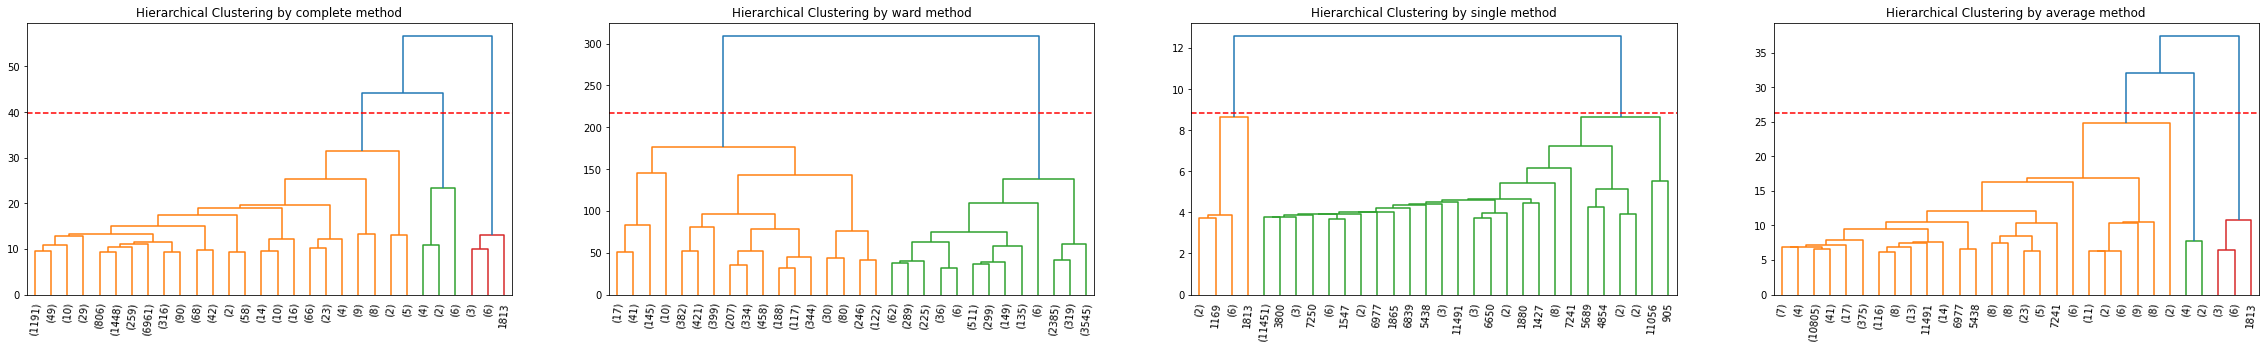

In [ ]:
# methods 
f, axs = plt.subplots(nrows=1, ncols=len(methods), figsize=(40,5))

data_dist = pdist(X, metric='euclidean')

for i in range(len(methods)):
  data_link = linkage(data_dist, method=methods[i], metric='euclidean')
  t = 0.7*max(data_link[:,2])
  thresholds.append(t)
  dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs[i], leaf_rotation=85, distance_sort='descending')
  opt_K = len(set(dend['color_list'])) - 1
  optK_colorT.append(opt_K)
  coords.append(dend['dcoord'])
  axs[i].set_title('Hierarchical Clustering by ' + methods[i] + ' method')
  axs[i].axhline(t, ls='--', color='r')
  
plt.show()

In [ ]:
#methods = ['complete', 'ward', 'single', 'average']  # hierarchical methods 

In [ ]:
print(optK_colorT)

[3, 2, 2, 3]


In [ ]:
optK_distance = [3, 2, 5, 3]

In [ ]:
print(coords[0])

[[0.0, 9.500990071662555, 9.500990071662555, 0.0], [9.500990071662555, 10.823479640498109, 10.823479640498109, 0.0], [10.823479640498109, 12.767597863087389, 12.767597863087389, 0.0], [0.0, 9.341388585872169, 9.341388585872169, 0.0], [9.341388585872169, 10.432243112931214, 10.432243112931214, 0.0], [10.432243112931214, 11.05644440231755, 11.05644440231755, 0.0], [0.0, 9.29976669062756, 9.29976669062756, 0.0], [11.05644440231755, 11.581851599273696, 11.581851599273696, 9.29976669062756], [12.767597863087389, 13.295921748503565, 13.295921748503565, 11.581851599273696], [0.0, 9.71980153999601, 9.71980153999601, 0.0], [13.295921748503565, 14.970971840368833, 14.970971840368833, 9.71980153999601], [0.0, 9.254180979726565, 9.254180979726565, 0.0], [14.970971840368833, 17.3500469276493, 17.3500469276493, 9.254180979726565], [0.0, 9.643340162561426, 9.643340162561426, 0.0], [9.643340162561426, 12.109964462470764, 12.109964462470764, 0.0], [17.3500469276493, 19.019507155594166, 19.0195071555941

In [ ]:
# models_ward 8
# dbscan 3

In [ ]:
models_colorT = []
models_distance = []

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in range(len(methods)):
  model = AgglomerativeClustering(n_clusters=optK_colorT[i], affinity='euclidean', linkage=methods[i])
  model.fit_predict(X)
  models_colorT.append(model)
  model = AgglomerativeClustering(n_clusters=optK_distance[i], affinity='euclidean', linkage=methods[i])
  model.fit_predict(X)
  models_distance.append(model)

In [ ]:
print("From colorT cut:")
for i in range(len(methods)):
  hist, bins = np.histogram(models_colorT[i].labels_, bins=range(0, len(set(models_colorT[i].labels_)) + 1))
  print(dict(zip(bins, hist)))
print('\n')
print("From distance cut:")  
for i in range(len(methods)):
  hist, bins = np.histogram(models_distance[i].labels_, bins=range(0, len(set(models_distance[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

From colorT cut:
{0: 11486, 1: 10, 2: 12}
{0: 3541, 1: 7967}
{0: 10, 1: 11498}
{0: 11492, 1: 10, 2: 6}


From distance cut:
{0: 11486, 1: 10, 2: 12}
{0: 3541, 1: 7967}
{0: 11490, 1: 2, 2: 9, 3: 1, 4: 6}
{0: 11492, 1: 10, 2: 6}


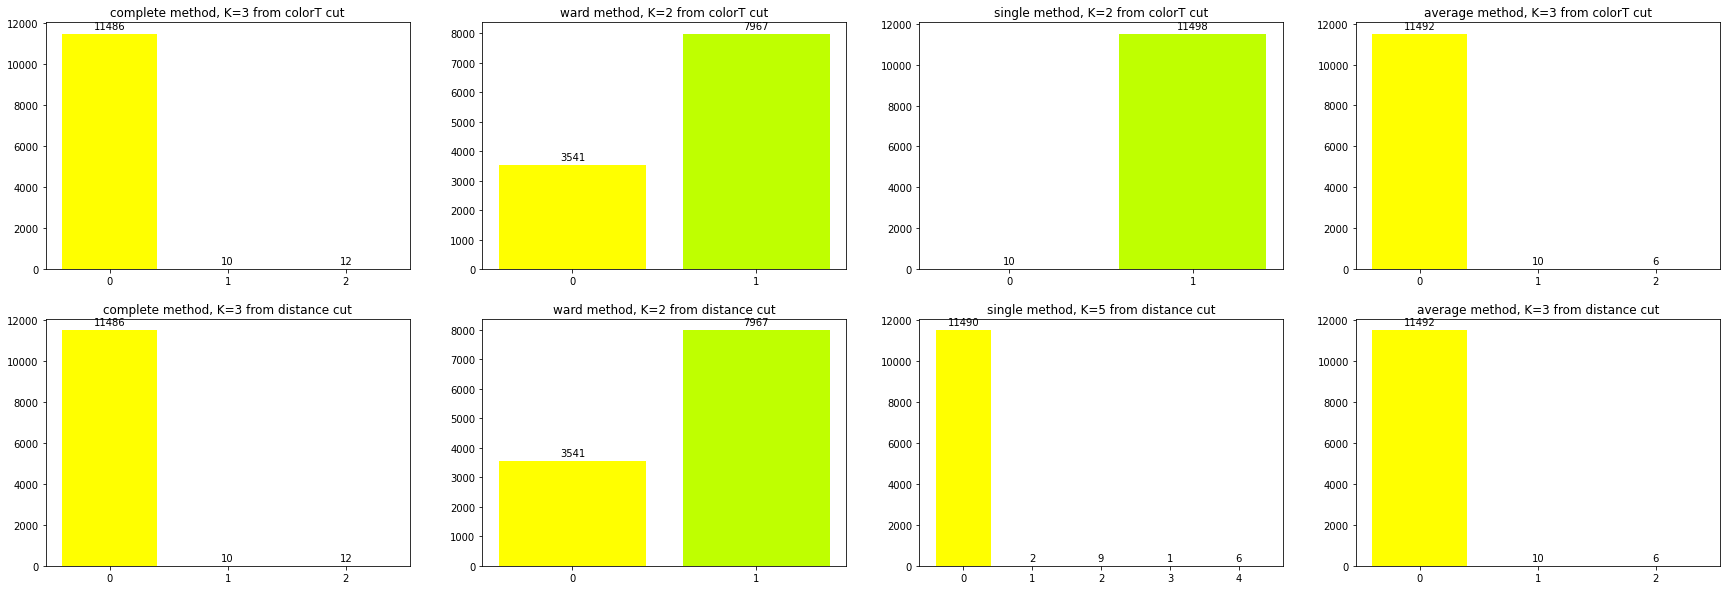

In [ ]:
fig, ax = plt.subplots(ncols=len(methods), figsize=(30,10), nrows=2)
for i in range(len(methods)):
  hist, bins = np.histogram(models_colorT[i].labels_, bins=range(0, len(set(models_colorT[i].labels_)) + 1))
  clusters = ax[0][i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[0][i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[0][i].bar_label(clusters, padding=3)
  ax[0][i].set_title(methods[i] + ' method, K=' + str(optK_colorT[i]) + ' from colorT cut')

  hist, bins = np.histogram(models_distance[i].labels_, bins=range(0, len(set(models_distance[i].labels_)) + 1))
  clusters = ax[1][i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[1][i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[1][i].bar_label(clusters, padding=3)
  ax[1][i].set_title(methods[i] + ' method, K=' + str(optK_distance[i]) + ' from distance cut')

plt.show()

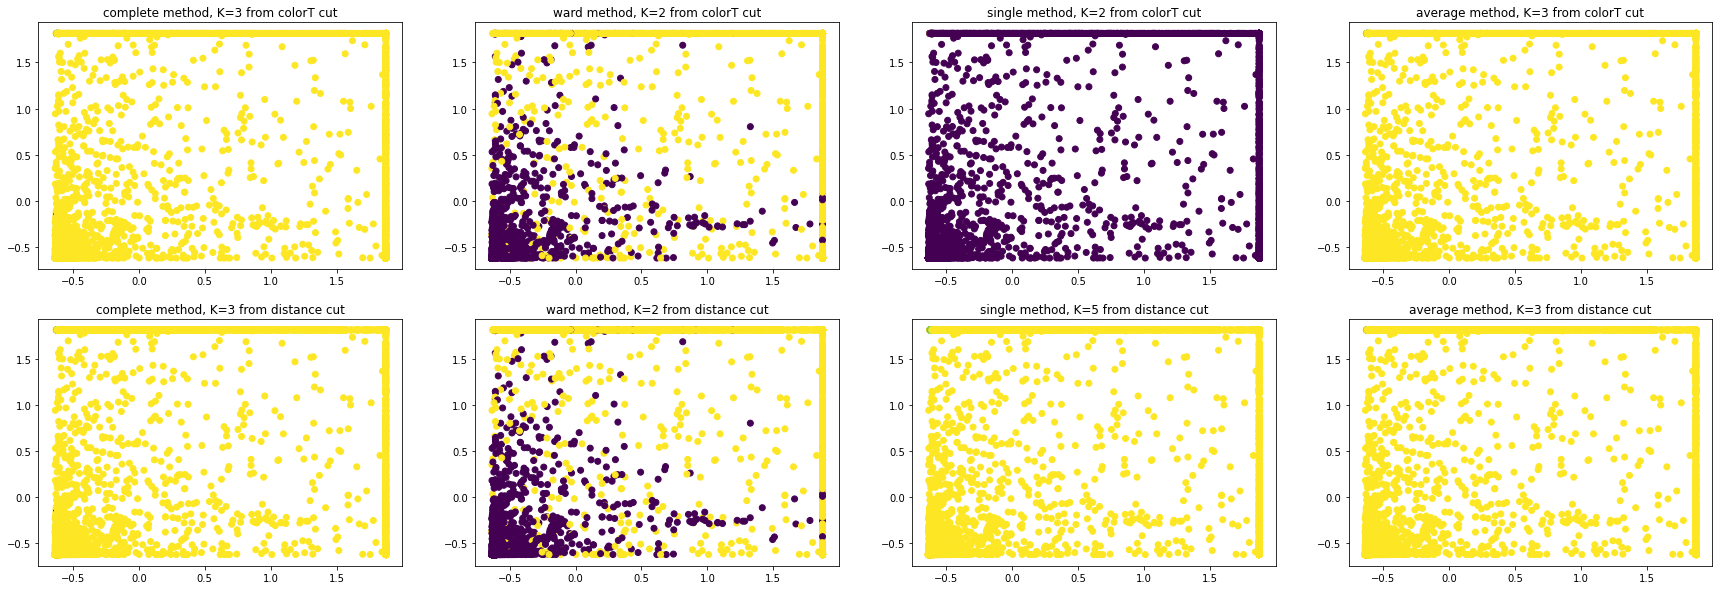

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=len(methods), figsize=(30,10))

for i in range(len(methods)):
  axs[0][i].scatter(X[:,0],X[:,1], c=models_colorT[i].labels_, cmap="viridis_r")
  axs[0][i].set_title(methods[i] + ' method, K=' + str(optK_colorT[i]) + ' from colorT cut')

  axs[1][i].scatter(X[:,0],X[:,1], c=models_distance[i].labels_, cmap="viridis_r")
  axs[1][i].set_title(methods[i] + ' method, K=' + str(optK_distance[i]) + ' from distance cut')
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from colorT cut")
# scores for each selected K
for i in range(len(models_colorT)):
    dav.append(davies_bouldin_score(X, models_colorT[i].labels_))
    sil.append(silhouette_score(X, models_colorT[i].labels_))
    cal.append(calinski_harabasz_score(X, models_colorT[i].labels_))
    print("K=", optK_colorT[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

dav=[]
sil=[]
cal=[]
print('\n')
print("Evaluation metrics for k-values from distance cut")
# scores for each selected K
for i in range(len(models_distance)):
    dav.append(davies_bouldin_score(X, models_distance[i].labels_))
    sil.append(silhouette_score(X, models_distance[i].labels_))
    cal.append(calinski_harabasz_score(X, models_distance[i].labels_))
    print("K=", optK_distance[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from colorT cut
K= 3  Silhouette= 0.8220819011386891  Davies_Bouldin= 0.4129994017250396  Calinski_Harabasz= 777.651175794221
K= 2  Silhouette= 0.4581324185896796  Davies_Bouldin= 1.3044795015573352  Calinski_Harabasz= 4416.108476855087
K= 2  Silhouette= 0.8831685007571423  Davies_Bouldin= 0.1911289433150647  Calinski_Harabasz= 998.9345091242586
K= 3  Silhouette= 0.8645866380246913  Davies_Bouldin= 0.21167825851969568  Calinski_Harabasz= 747.0006968276662


Evaluation metrics for k-values from distance cut
K= 3  Silhouette= 0.8220819011386891  Davies_Bouldin= 0.4129994017250396  Calinski_Harabasz= 777.651175794221
K= 2  Silhouette= 0.4581324185896796  Davies_Bouldin= 1.3044795015573352  Calinski_Harabasz= 4416.108476855087
K= 5  Silhouette= 0.8236319024054072  Davies_Bouldin= 0.26359143580484334  Calinski_Harabasz= 401.02360670489264
K= 3  Silhouette= 0.8645866380246913  Davies_Bouldin= 0.21167825851969568  Calinski_Harabasz= 747.0006968276662


In [ ]:
for i in range(len(methods)):
    Z = linkage(X, methods[i])
    print("method ",methods[i], " --> cophenetic_coefficient =", np.corrcoef(pdist(X), cophenet(Z))[0][1])

method  complete  --> cophenetic_coefficient = 0.8111057935036102
method  ward  --> cophenetic_coefficient = 0.618888942824271
method  single  --> cophenetic_coefficient = 0.9035440944514666
method  average  --> cophenetic_coefficient = 0.9530174562725565


### focus on complete method

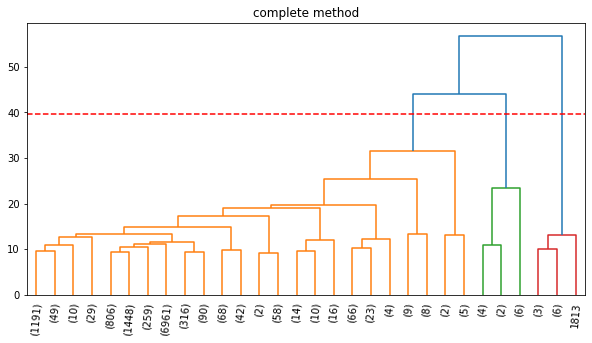

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('complete method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_complete = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
  model.fit_predict(X)
  models_complete.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_complete[i].labels_, bins=range(0, len(set(models_complete[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 11498, 1: 10}
{0: 11486, 1: 10, 2: 12}
{0: 11479, 1: 7, 2: 12, 3: 10}
{0: 12, 1: 17, 2: 11462, 3: 10, 4: 7}
{0: 11462, 1: 17, 2: 6, 3: 10, 4: 7, 5: 6}
{0: 11369, 1: 17, 2: 93, 3: 10, 4: 7, 5: 6, 6: 6}
{0: 11329, 1: 17, 2: 93, 3: 10, 4: 7, 5: 6, 6: 6, 7: 40}


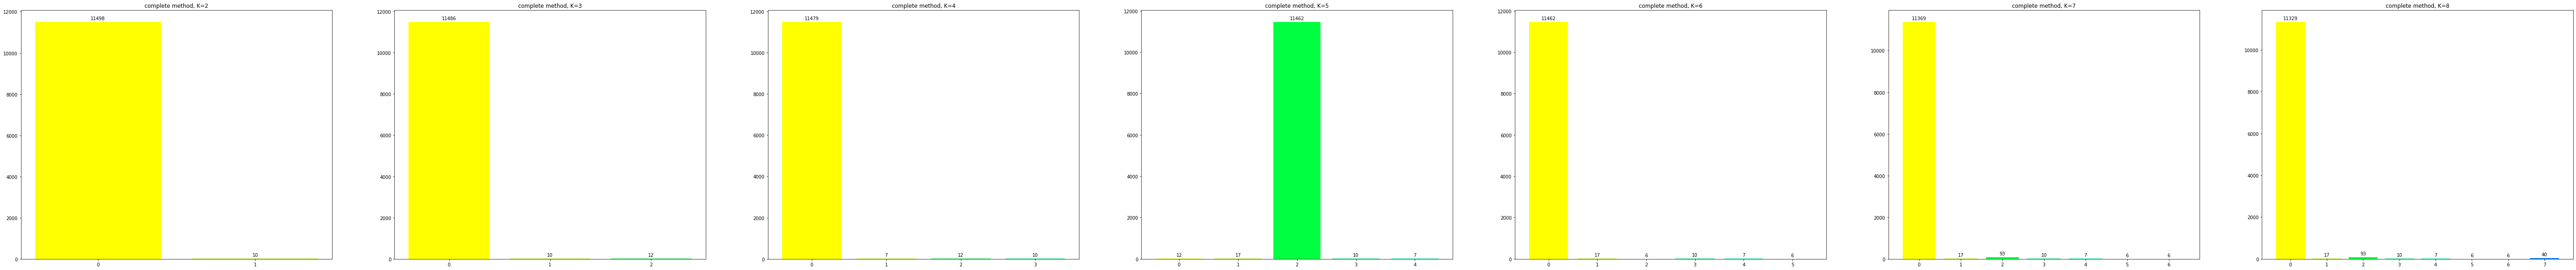

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_complete[i].labels_, bins=range(0, len(set(models_complete[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('complete method, K=' + str(k_range[i]))

plt.show()

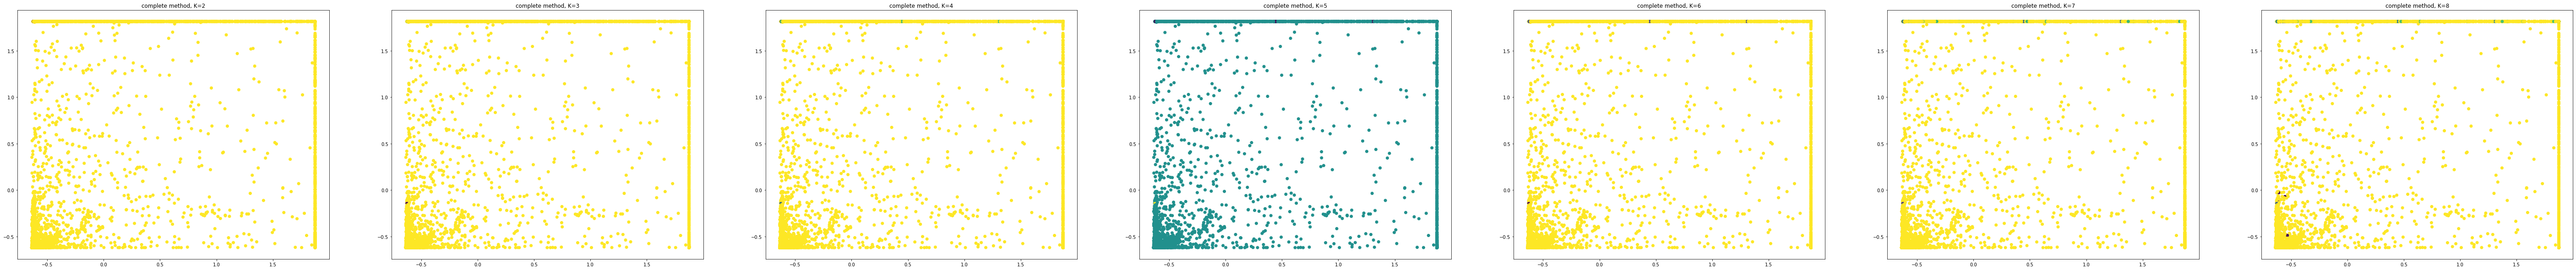

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_complete[i].labels_, cmap="viridis_r")
  axs[i].set_title('complete method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from complete method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_complete[i].labels_))
    sil.append(silhouette_score(X, models_complete[i].labels_))
    cal.append(calinski_harabasz_score(X, models_complete[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from complete method 

K= 2  Silhouette= 0.8831685007571423  Davies_Bouldin= 0.1911289433150647  Calinski_Harabasz= 998.9345091242586
K= 3  Silhouette= 0.8220819011386891  Davies_Bouldin= 0.4129994017250396  Calinski_Harabasz= 777.651175794221
K= 4  Silhouette= 0.7686473665726381  Davies_Bouldin= 0.43054291665824074  Calinski_Harabasz= 585.8121513054701
K= 5  Silhouette= 0.7682388317311111  Davies_Bouldin= 0.4862899533644824  Calinski_Harabasz= 581.7517604250112
K= 6  Silhouette= 0.7350526606534866  Davies_Bouldin= 0.46275761728073744  Calinski_Harabasz= 480.3451904721305
K= 7  Silhouette= 0.6006288695224095  Davies_Bouldin= 0.5841812740625654  Calinski_Harabasz= 546.671234249258
K= 8  Silhouette= 0.5993983557460466  Davies_Bouldin= 0.703163362787014  Calinski_Harabasz= 543.145791575941


### focus on ward method

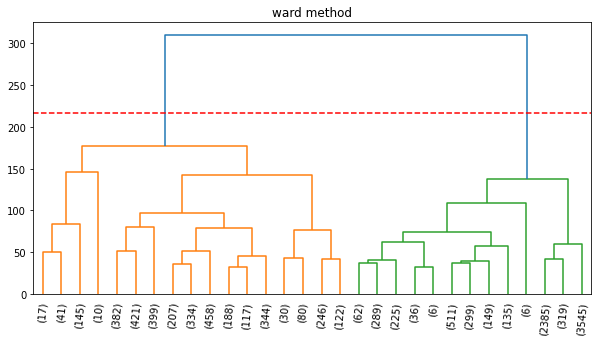

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('ward method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_ward = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  model.fit_predict(X)
  models_ward.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_ward[i].labels_, bins=range(0, len(set(models_ward[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 3541, 1: 7967}
{0: 213, 1: 7967, 2: 3328}
{0: 3328, 1: 7967, 2: 203, 3: 10}
{0: 7967, 1: 2850, 2: 203, 3: 10, 4: 478}
{0: 1718, 1: 2850, 2: 203, 3: 10, 4: 478, 5: 6249}
{0: 2850, 1: 478, 2: 203, 3: 10, 4: 1712, 5: 6249, 6: 6}
{0: 203, 1: 1648, 2: 1202, 3: 478, 4: 1712, 5: 6249, 6: 6, 7: 10}


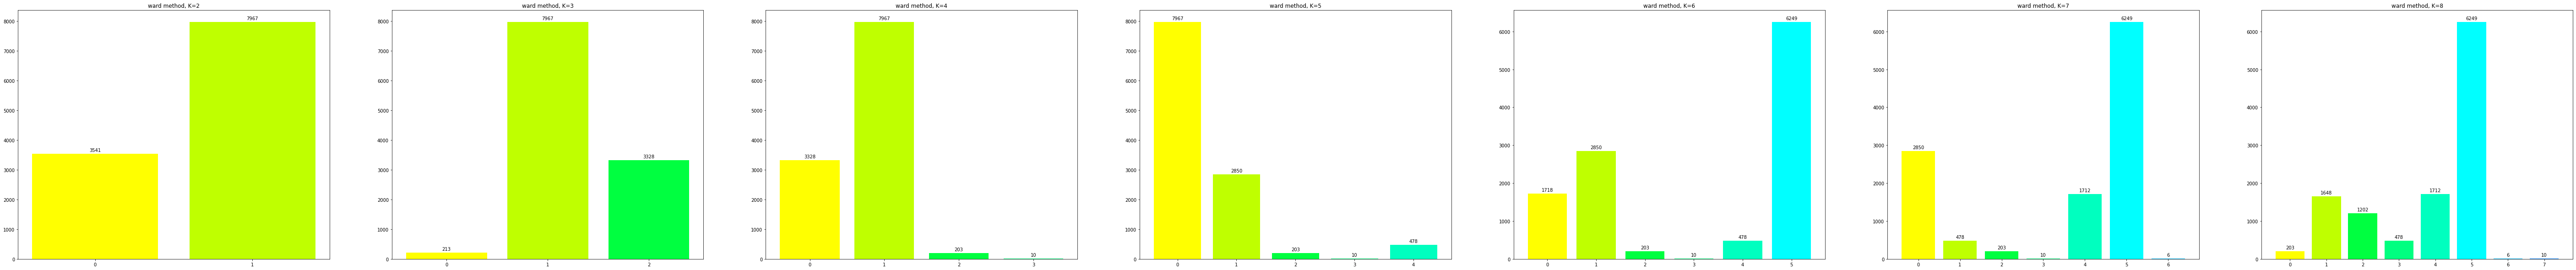

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_ward[i].labels_, bins=range(0, len(set(models_ward[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('ward method, K=' + str(k_range[i]))

plt.show()

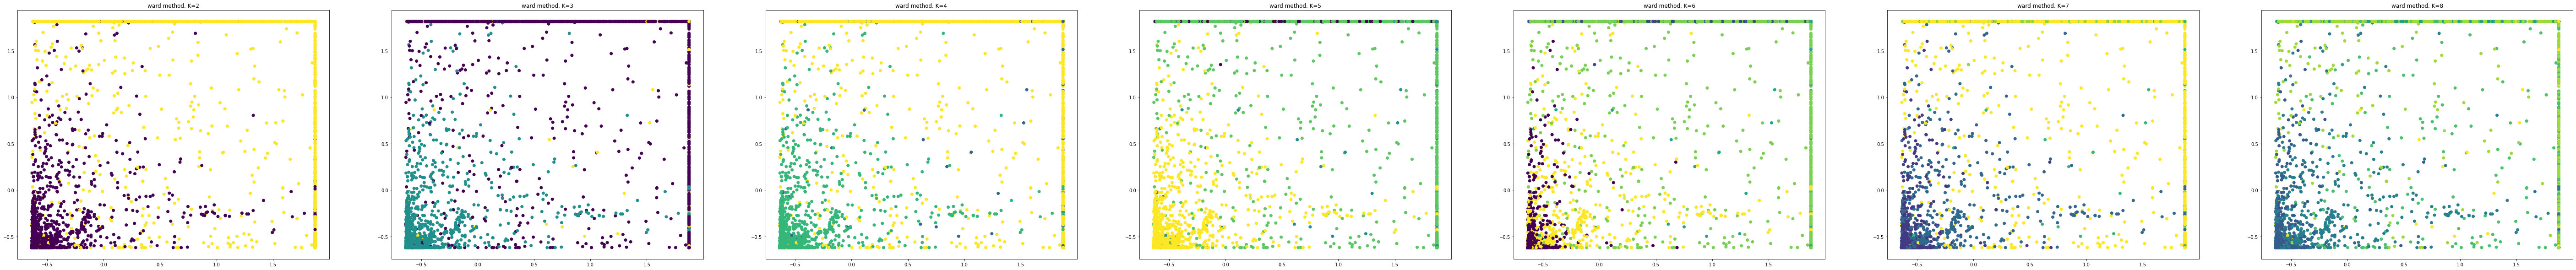

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_ward[i].labels_, cmap="viridis_r")
  axs[i].set_title('ward method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from ward method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_ward[i].labels_))
    sil.append(silhouette_score(X, models_ward[i].labels_))
    cal.append(calinski_harabasz_score(X, models_ward[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from ward method 

K= 2  Silhouette= 0.4581324185896796  Davies_Bouldin= 1.3044795015573352  Calinski_Harabasz= 4416.108476855087
K= 3  Silhouette= 0.4621935641027269  Davies_Bouldin= 1.2447130062208784  Calinski_Harabasz= 3346.8123874584567
K= 4  Silhouette= 0.46489263896813493  Davies_Bouldin= 0.9655807210570052  Calinski_Harabasz= 2881.0953341994355
K= 5  Silhouette= 0.4563735934778293  Davies_Bouldin= 1.108770988267439  Calinski_Harabasz= 2738.59123387634
K= 6  Silhouette= 0.40555178074126935  Davies_Bouldin= 1.321774350721248  Calinski_Harabasz= 2730.123264514357
K= 7  Silhouette= 0.40294512331976995  Davies_Bouldin= 1.1593202213882197  Calinski_Harabasz= 2618.4253945274722
K= 8  Silhouette= 0.3970880341985525  Davies_Bouldin= 1.362802892190008  Calinski_Harabasz= 2508.7206533057174


### focus on single method

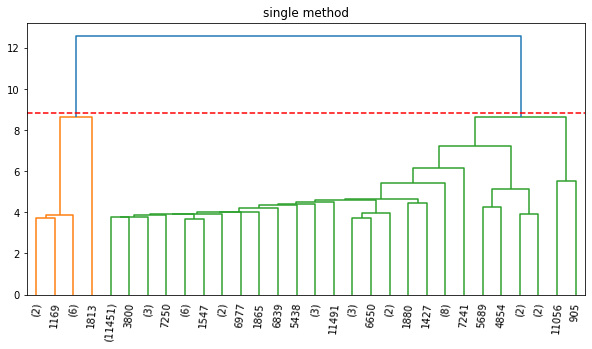

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('single method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_single = []

In [ ]:
k_range = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
  model.fit_predict(X)
  models_single.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_single[i].labels_, bins=range(0, len(set(models_single[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 10, 1: 11498}
{0: 11498, 1: 1, 2: 9}
{0: 11496, 1: 2, 2: 9, 3: 1}
{0: 11490, 1: 2, 2: 9, 3: 1, 4: 6}
{0: 2, 1: 6, 2: 11489, 3: 1, 4: 1, 5: 9}
{0: 11489, 1: 6, 2: 9, 3: 1, 4: 1, 5: 1, 6: 1}
{0: 6, 1: 11481, 2: 9, 3: 8, 4: 1, 5: 1, 6: 1, 7: 1}


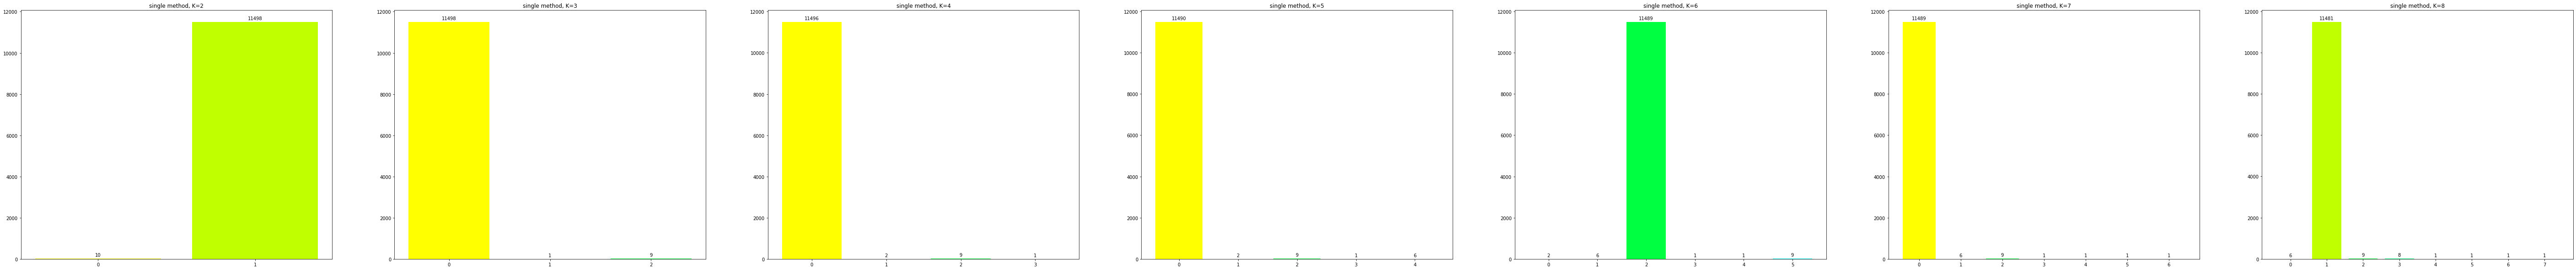

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_single[i].labels_, bins=range(0, len(set(models_single[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('single method, K=' + str(k_range[i]))

plt.show()

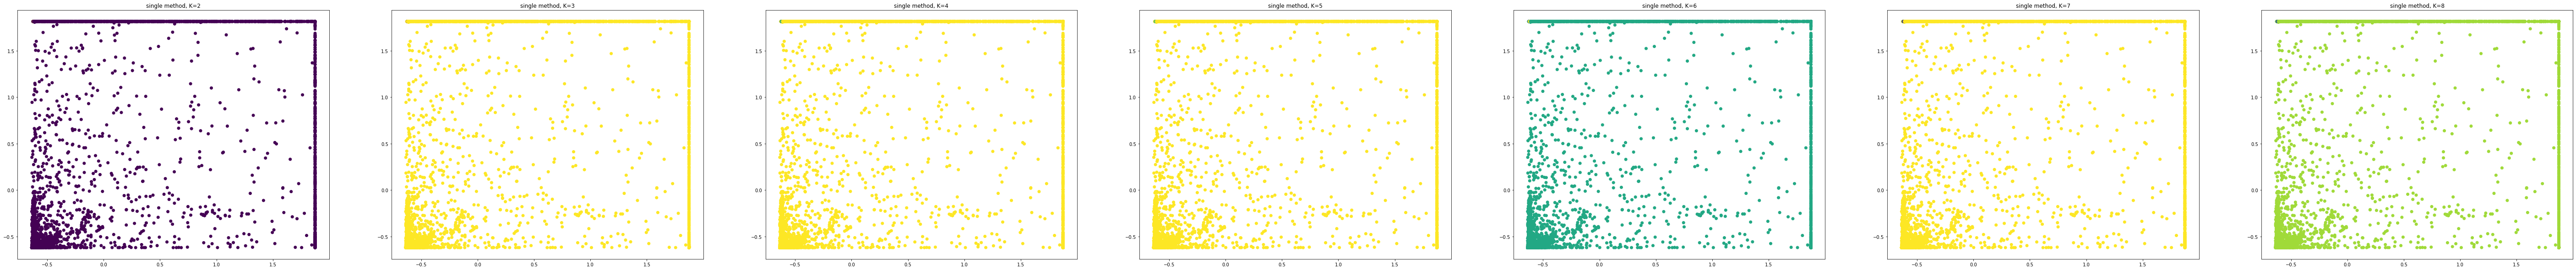

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_single[i].labels_, cmap="viridis_r")
  axs[i].set_title('single method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from single method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_single[i].labels_))
    sil.append(silhouette_score(X, models_single[i].labels_))
    cal.append(calinski_harabasz_score(X, models_single[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from single method 

K= 2  Silhouette= 0.8831685007571423  Davies_Bouldin= 0.1911289433150647  Calinski_Harabasz= 998.9345091242586
K= 3  Silhouette= 0.8803899602596343  Davies_Bouldin= 0.26192543089629133  Calinski_Harabasz= 503.21955683529774
K= 4  Silhouette= 0.8229818117943818  Davies_Bouldin= 0.2743018483599684  Calinski_Harabasz= 366.9472602632427
K= 5  Silhouette= 0.8236319024054072  Davies_Bouldin= 0.26359143580484334  Calinski_Harabasz= 401.02360670489264
K= 6  Silhouette= 0.7245078196176368  Davies_Bouldin= 0.2526304462076245  Calinski_Harabasz= 325.0899353665316
K= 7  Silhouette= 0.724383768760849  Davies_Bouldin= 0.21650970941389183  Calinski_Harabasz= 271.10761997828416
K= 8  Silhouette= 0.7250255020200413  Davies_Bouldin= 0.23191091847456782  Calinski_Harabasz= 269.37811308997016


### focus on average method

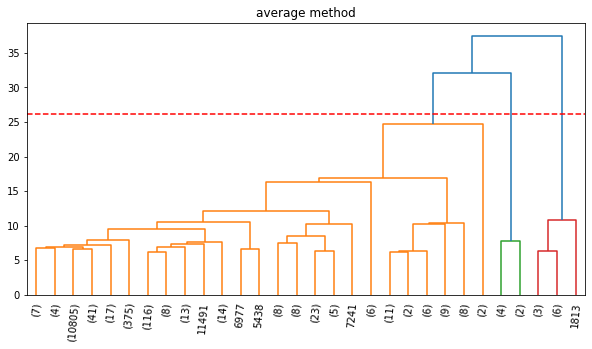

In [ ]:
# average method
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
t = 0.7*max(data_link[:,2])
thresholds.append(t)
dend = dendrogram(data_link, color_threshold=t, truncate_mode='lastp', ax=axs, leaf_rotation=85, distance_sort='descending')
axs.set_title('average method')
axs.axhline(t, ls='--', color='r')  
plt.show()

In [ ]:
models_average = []

In [ ]:
#with sciki-learn you have to select the number of clusters you want
for i in k_range:
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')
  model.fit_predict(X)
  models_average.append(model)

In [ ]:
for i in range(len(k_range)):
  hist, bins = np.histogram(models_average[i].labels_, bins=range(0, len(set(models_average[i].labels_)) + 1))
  print(dict(zip(bins, hist)))

{0: 11498, 1: 10}
{0: 11492, 1: 10, 2: 6}
{0: 11490, 1: 10, 2: 6, 3: 2}
{0: 11454, 1: 10, 2: 6, 3: 2, 4: 36}
{0: 11448, 1: 10, 2: 6, 3: 2, 4: 36, 5: 6}
{0: 10, 1: 11403, 2: 45, 3: 2, 4: 36, 5: 6, 6: 6}
{0: 11403, 1: 36, 2: 45, 3: 2, 4: 9, 5: 6, 6: 6, 7: 1}


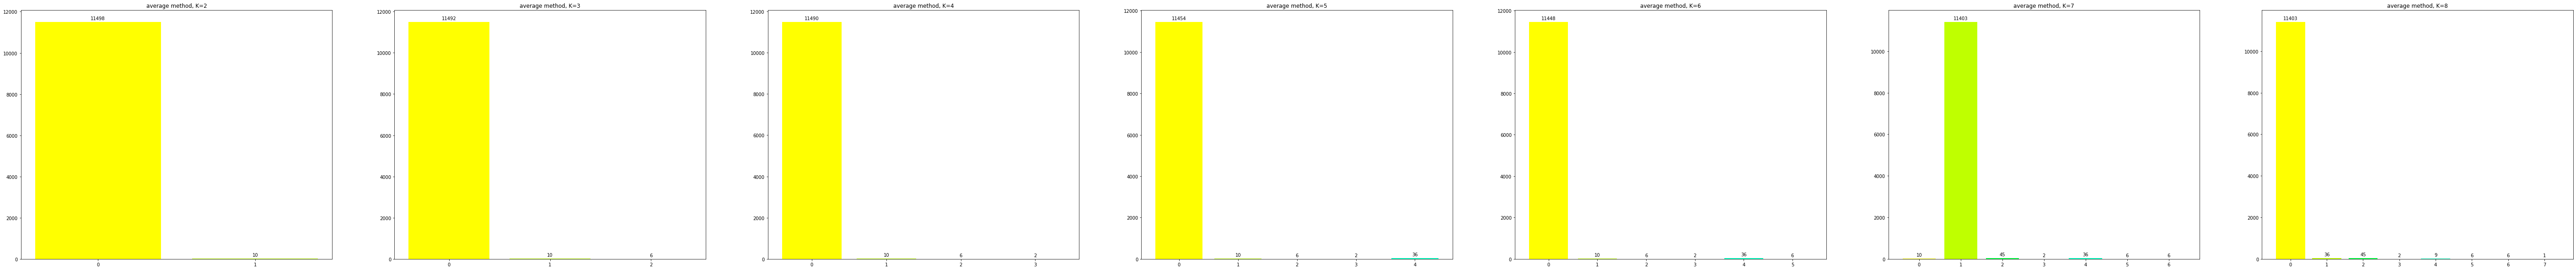

In [ ]:
fig, ax = plt.subplots(ncols=len(k_range), figsize=(100,10), nrows=1)
for i in range(len(k_range)):
  hist, bins = np.histogram(models_average[i].labels_, bins=range(0, len(set(models_average[i].labels_)) + 1))
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
  ax[i].set_title('average method, K=' + str(k_range[i]))

plt.show()

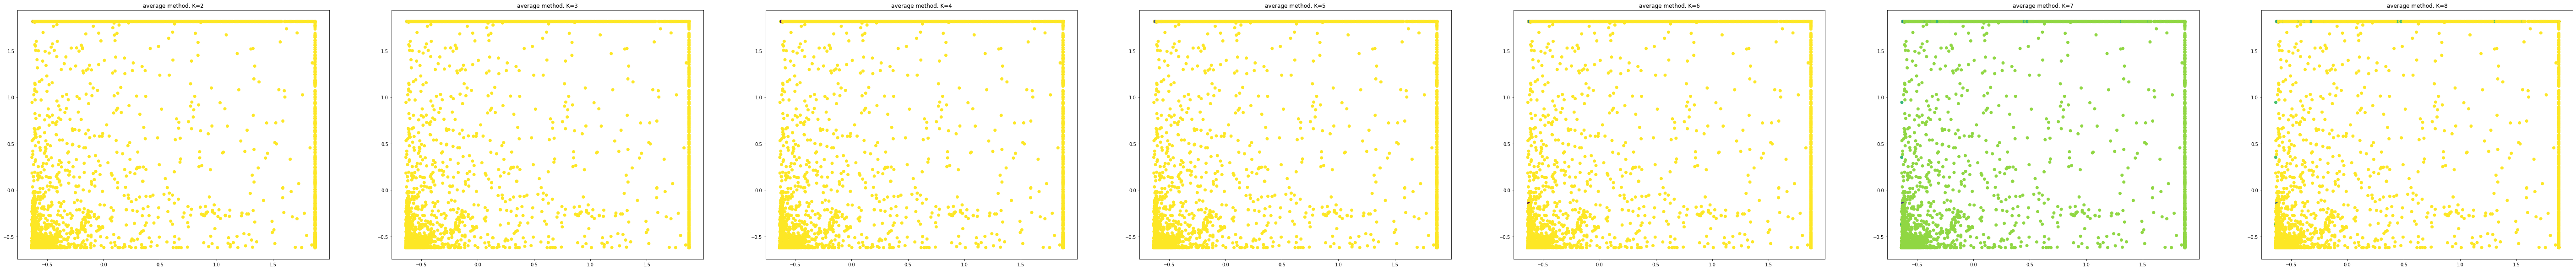

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(100,10))

for i in range(len(k_range)):
  axs[i].scatter(X[:,0],X[:,1], c=models_average[i].labels_, cmap="viridis_r")
  axs[i].set_title('average method, K=' + str(k_range[i]))
  
plt.show()

In [ ]:
dav=[]
sil=[]
cal=[]
print("Evaluation metrics for k-values from average method \n")
# scores for each selected K
for i in range(len(k_range)):
    dav.append(davies_bouldin_score(X, models_average[i].labels_))
    sil.append(silhouette_score(X, models_average[i].labels_))
    cal.append(calinski_harabasz_score(X, models_average[i].labels_))
    print("K=", k_range[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])

Evaluation metrics for k-values from average method 

K= 2  Silhouette= 0.8831685007571423  Davies_Bouldin= 0.1911289433150647  Calinski_Harabasz= 998.9345091242586
K= 3  Silhouette= 0.8645866380246913  Davies_Bouldin= 0.21167825851969568  Calinski_Harabasz= 747.0006968276662
K= 4  Silhouette= 0.8239046500002457  Davies_Bouldin= 0.24225738261913948  Calinski_Harabasz= 531.9668259198189
K= 5  Silhouette= 0.7458945824366883  Davies_Bouldin= 0.44271158107454145  Calinski_Harabasz= 600.2110312272147
K= 6  Silhouette= 0.735911273513221  Davies_Bouldin= 0.4622252883652412  Calinski_Harabasz= 509.4630603230314
K= 7  Silhouette= 0.6483916706798722  Davies_Bouldin= 0.5618509139663189  Calinski_Harabasz= 514.6789281188807
K= 8  Silhouette= 0.6481502300072919  Davies_Bouldin= 0.5270970568871304  Calinski_Harabasz= 442.5919073771581


### Clusters characterization with respect to categorical features (Ward Method)

In [ ]:
mod = models_ward

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0        6237.625     138813.625          0.0        1031.125         297.5   
1        6237.625     138813.625          0.0         969.000         297.5   
2        6237.625      92396.000          0.0         391.000          77.0   
3        6237.625     138813.625          0.0         209.000         297.5   
4        6237.625     138486.000          0.0        1031.125         185.0   

   ...  hour_entropy  favcount_entropy  retcount_entropy  repcount_entropy  \
0  ...           0.0          8.831943          6.080426               0.0   
1  ...           0.0          0.000000          0.000000               0.0   
2  ...           0.0          3.921117          2.375534               0.0   
3  ...           0.0          0.000000          0.000000               0.0   
4  ...           0.0          8.277790          2.354578               0.0   

   has_entropy  url_entropy  men_entropy  avg_textlen  days_on_tw  \
0     9.183814     9.578214    10.607494   109.637321        3900   
1     0.000000     0.000000     0.000000    85.026719        3893   
2     4.836434     5.114369     6.387527    80.780317        3885   
3     0.000000     0.000000     0.000000    84.281111        3884   
4     8.421512     8.222893     9.556485    95.166473        3870   

   activity_richness  
0           0.608718  
1           0.519137  
2           0.551866  
3           0.519310  
4           0.887855  

[5 rows x 33 columns]

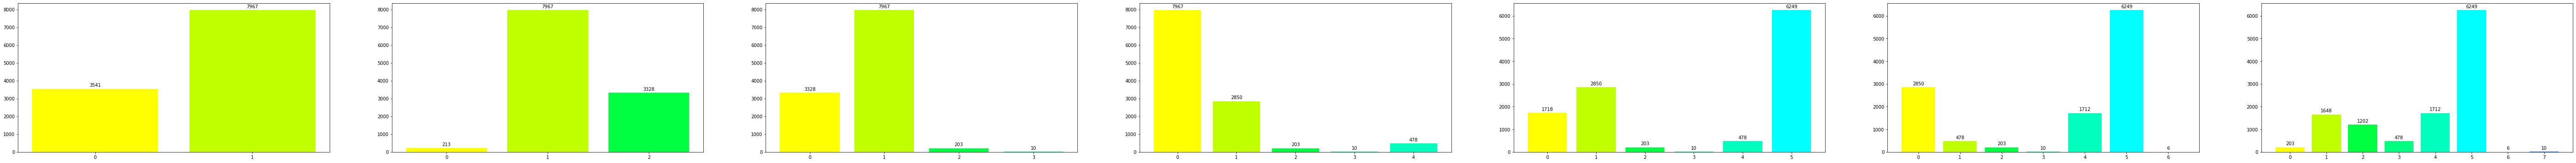

In [ ]:
fig, ax = plt.subplots(ncols=len(mod), figsize=(100,6))
for i in range(len(mod)):
  hist, bins = np.histogram(mod[i].labels_, bins=range(0, len(set(mod[i].labels_)) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

The previous plot shows the clusters dimension for each K: we can observe that a cluster always seems to include around 7000 people, independently of the K parameter. According to this phenomenon, the least populous cluster in the K=2 scenario is the one that is involved with subsequent clustering.

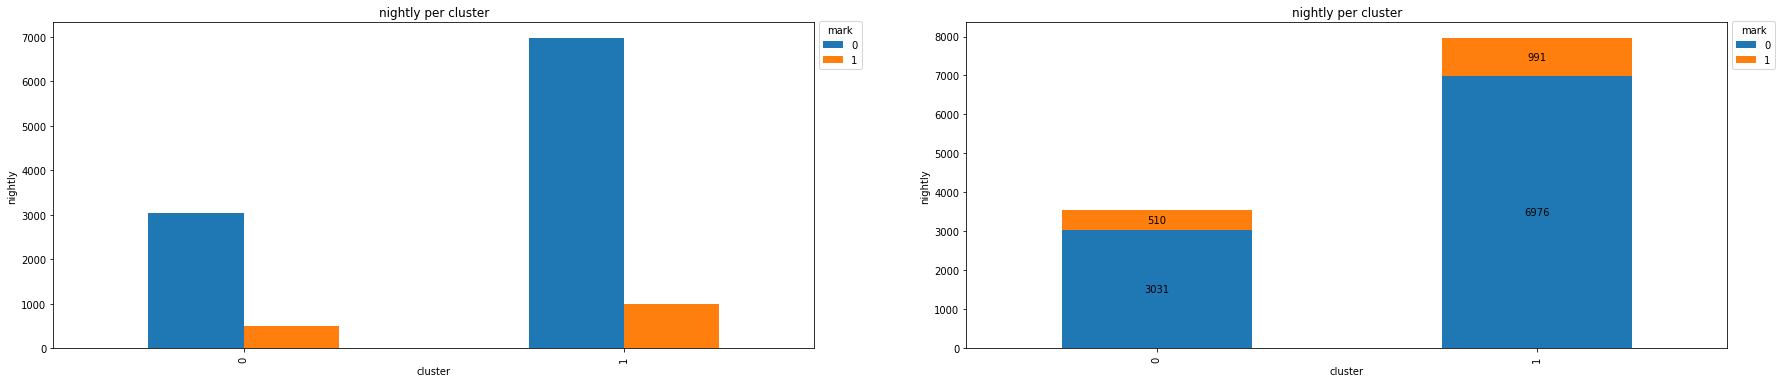

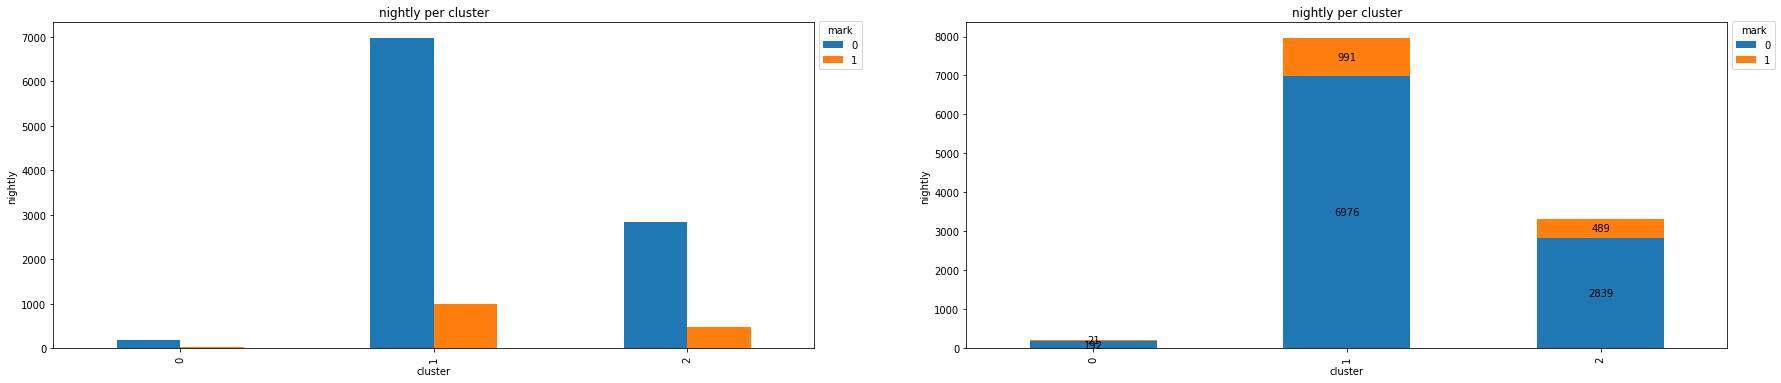

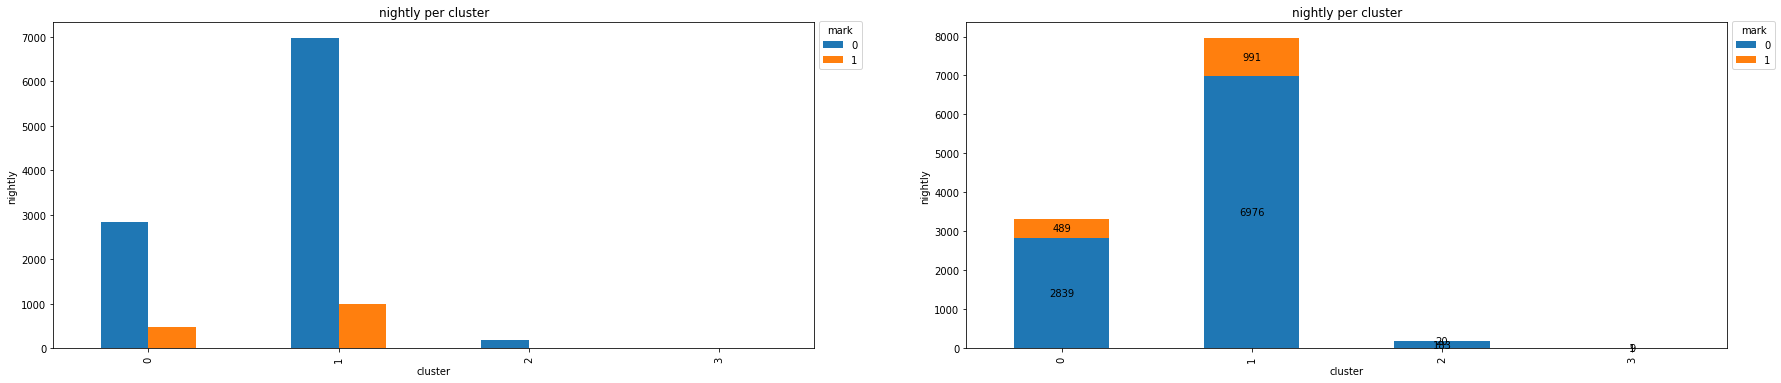

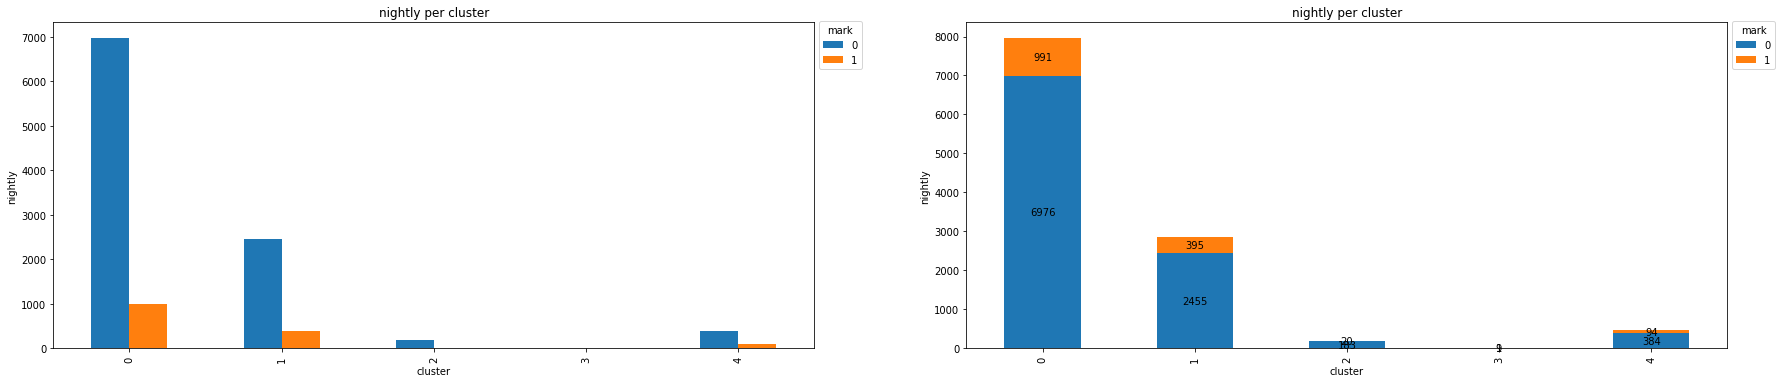

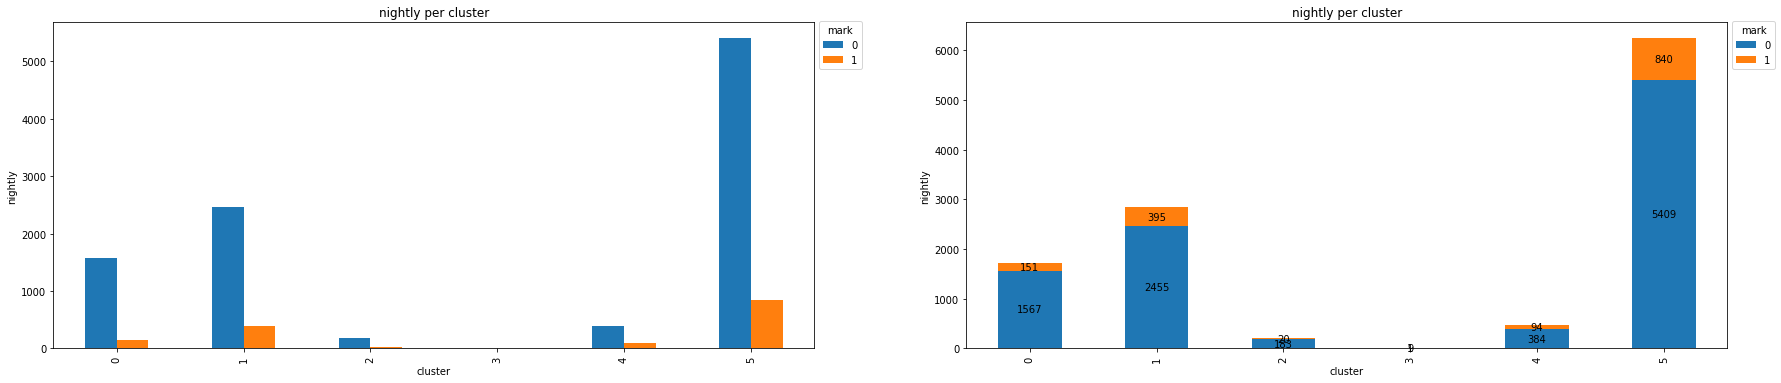

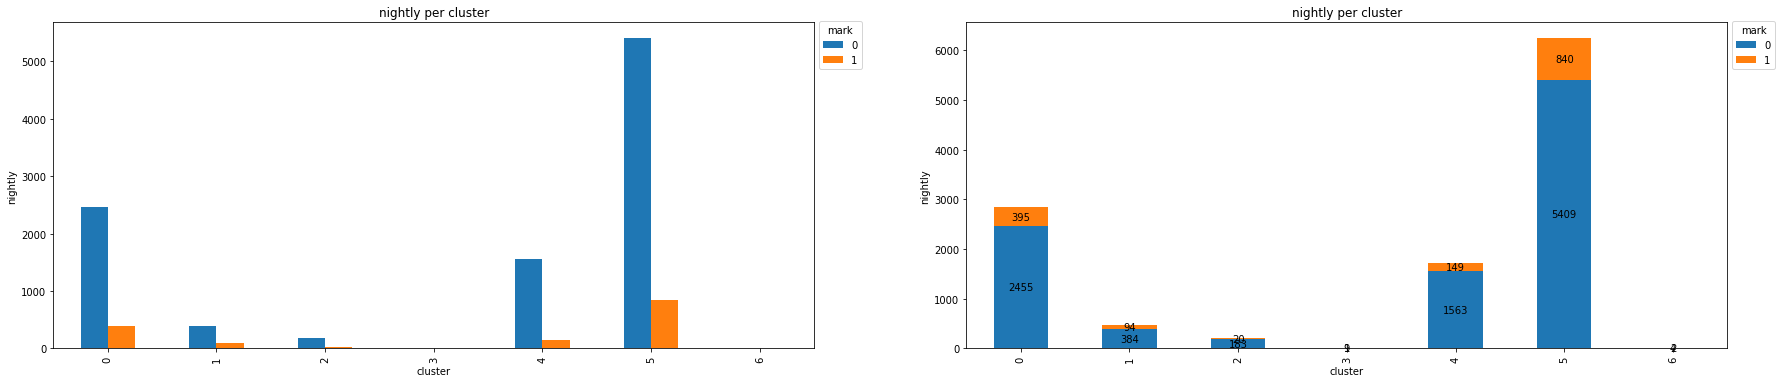

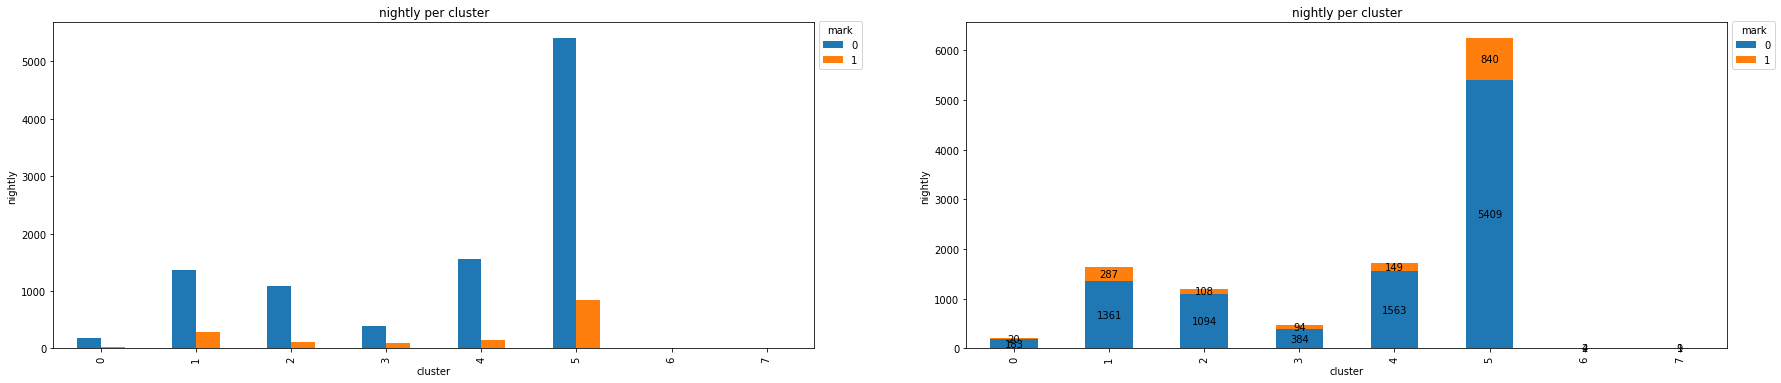

In [ ]:
for i in range(len(mod)):
  nightly_ct = pd.crosstab(mod[i].labels_,users_profile_all['nightly'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('nightly')

  ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('nightly')

  plt.show()

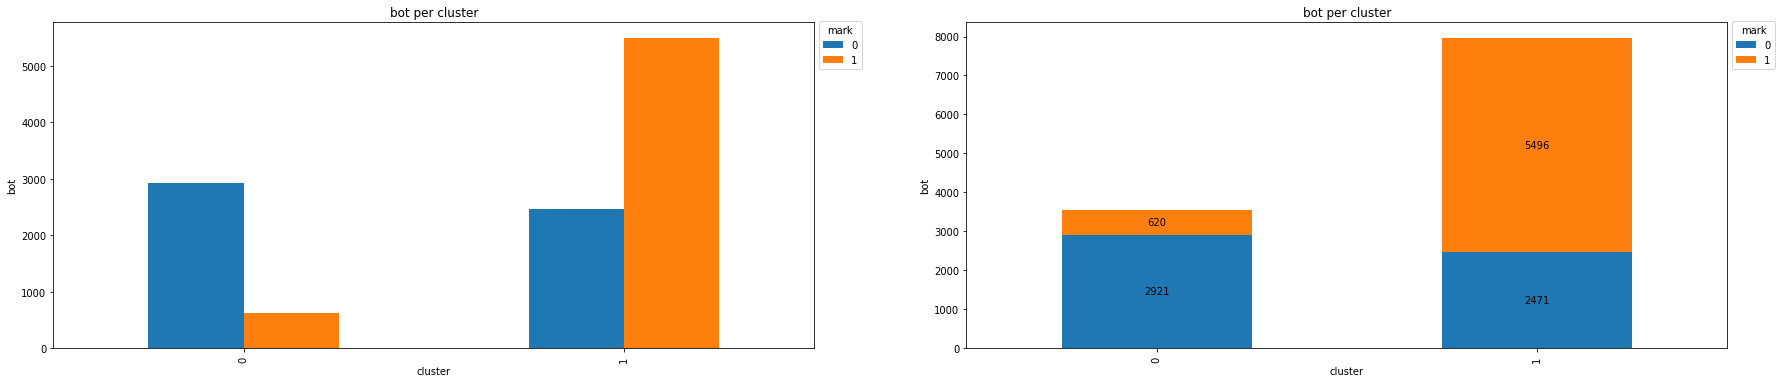

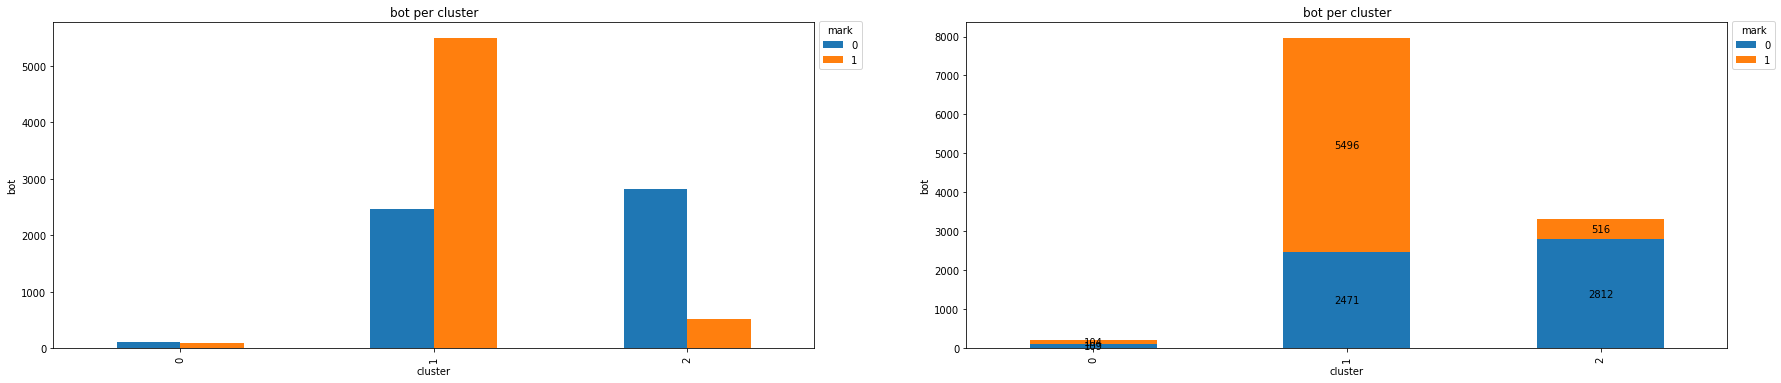

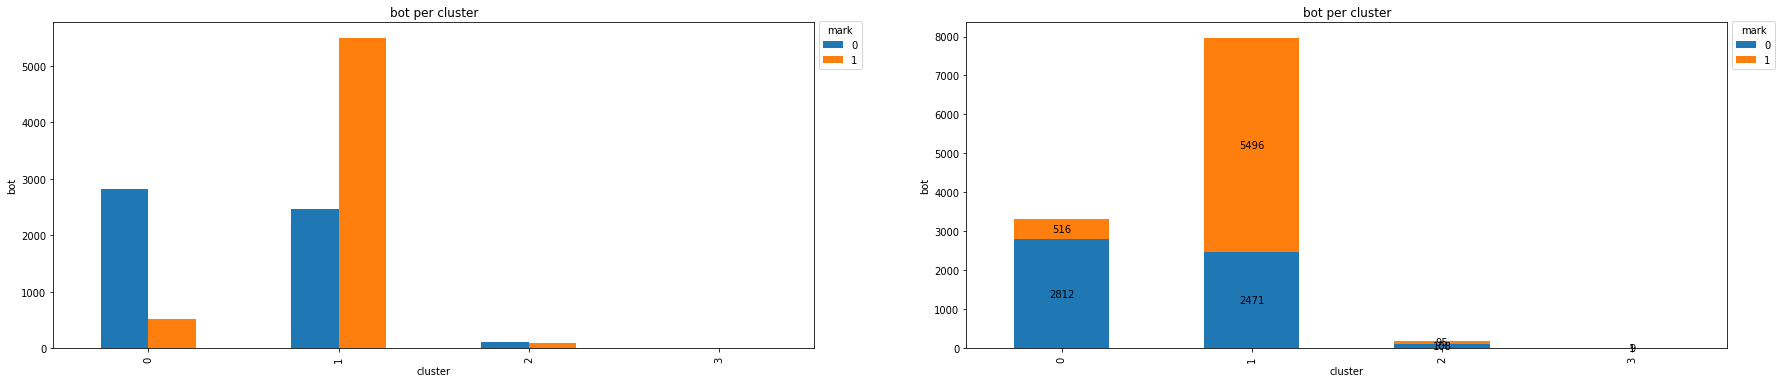

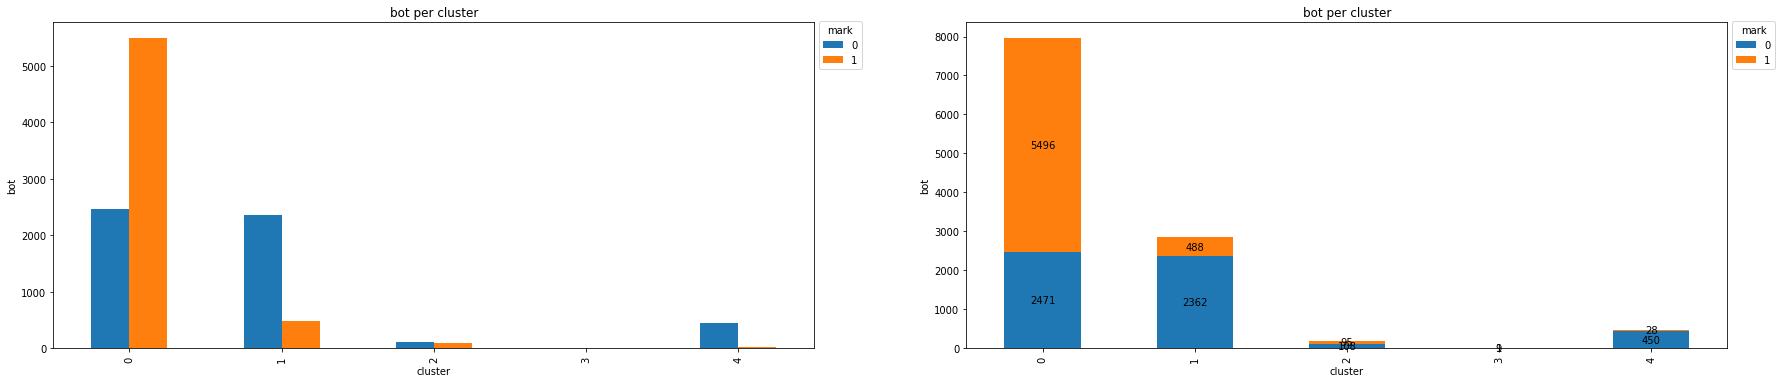

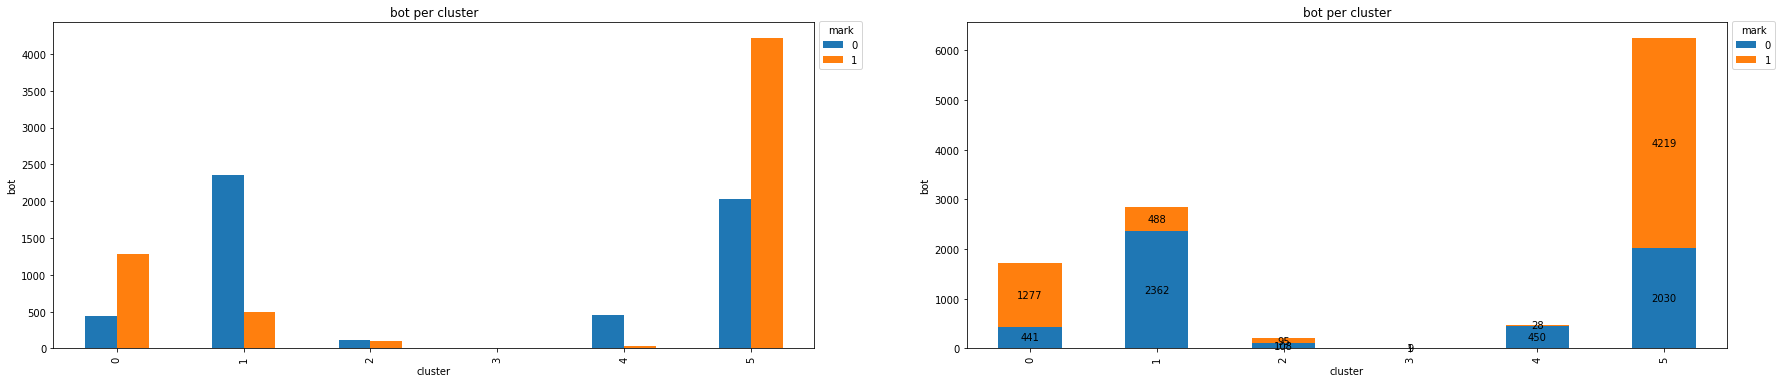

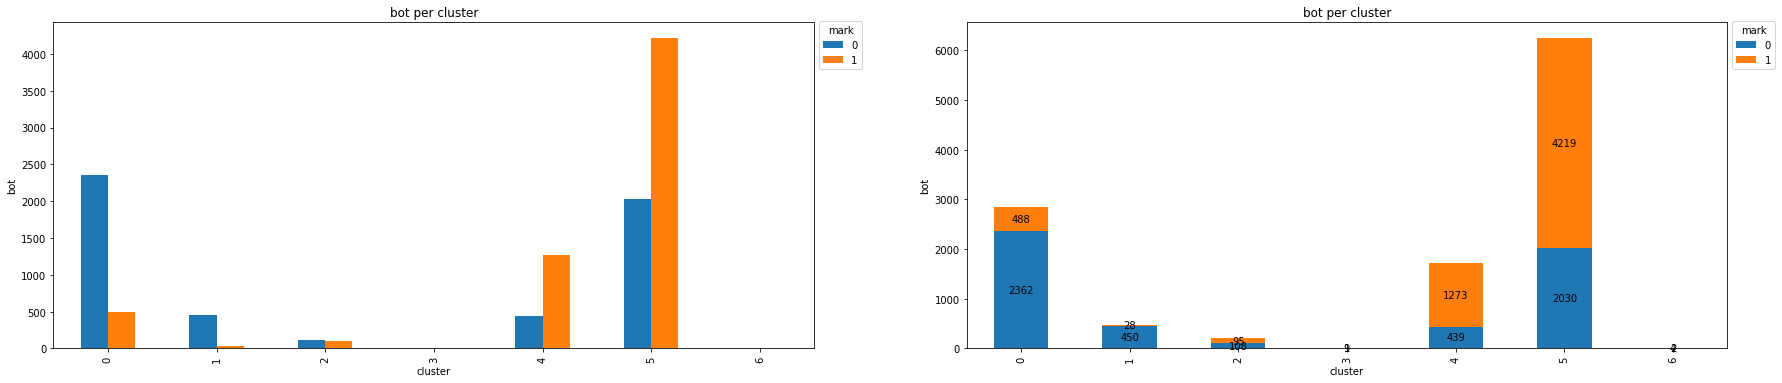

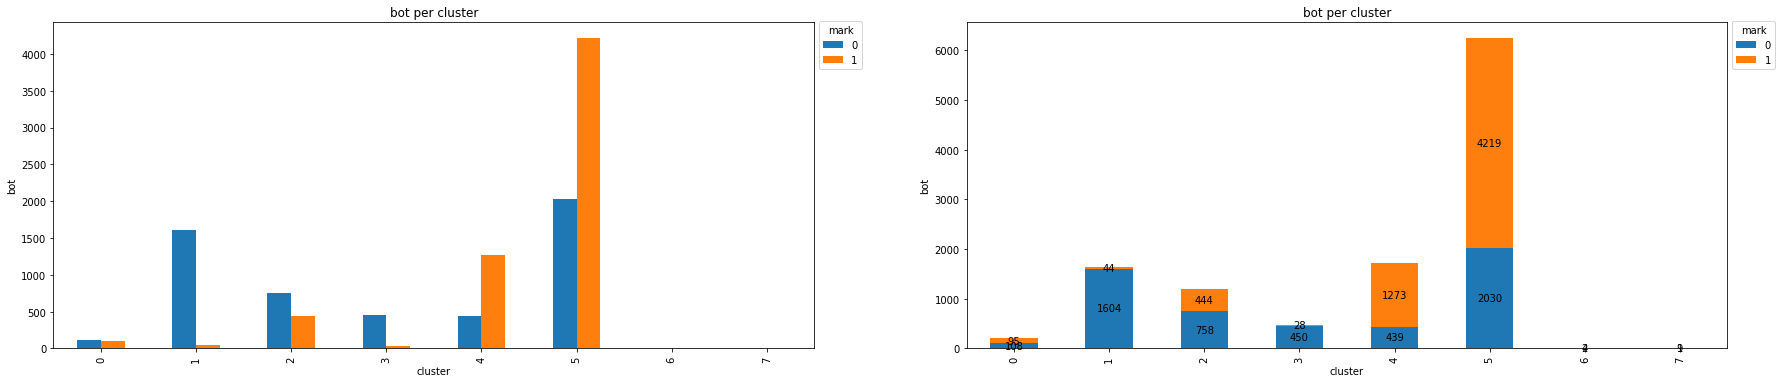

In [ ]:
for i in range(len(mod)):
  bot_ct = pd.crosstab(mod[i].labels_,users_profile_all['bot'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('bot')

  ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  # add counts
  for c in ax2.containers:
      # set the bar label
      ax2.bar_label(c, label_type='center')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('bot')

  plt.show()

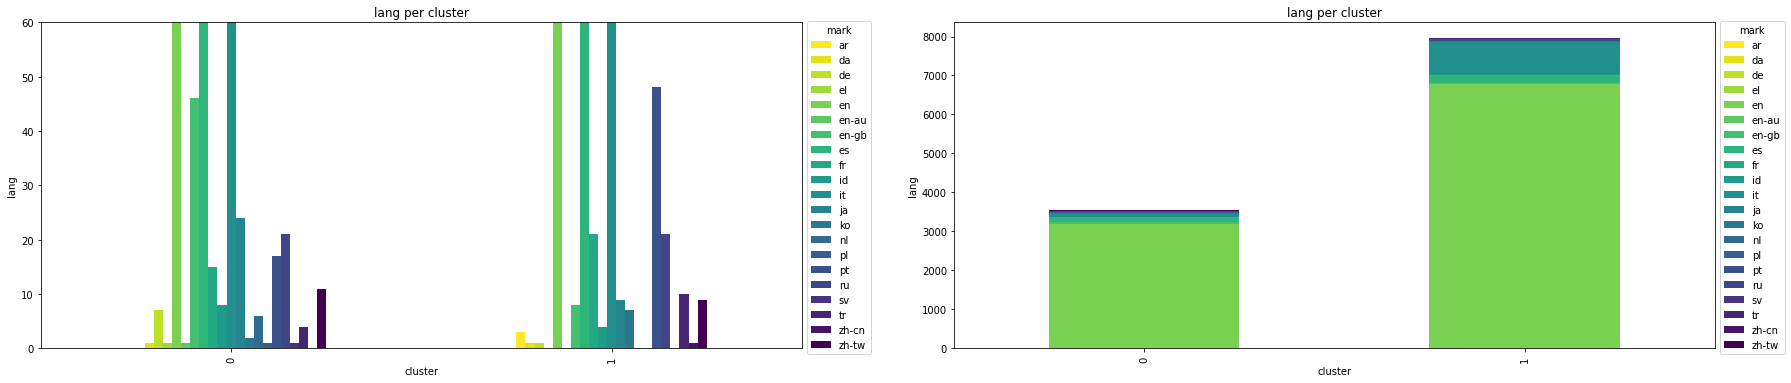

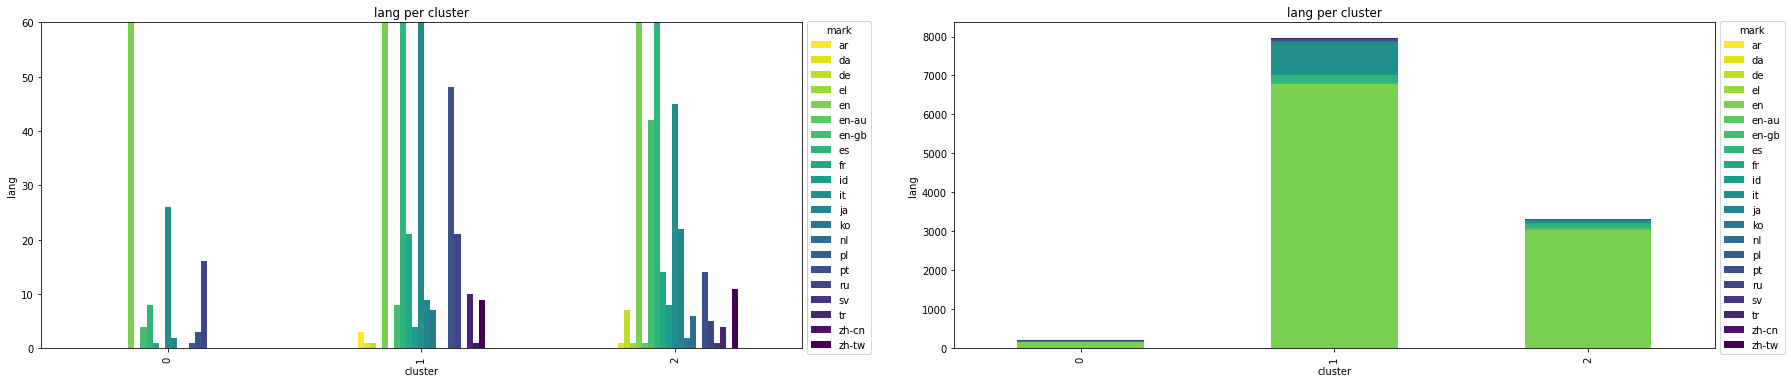

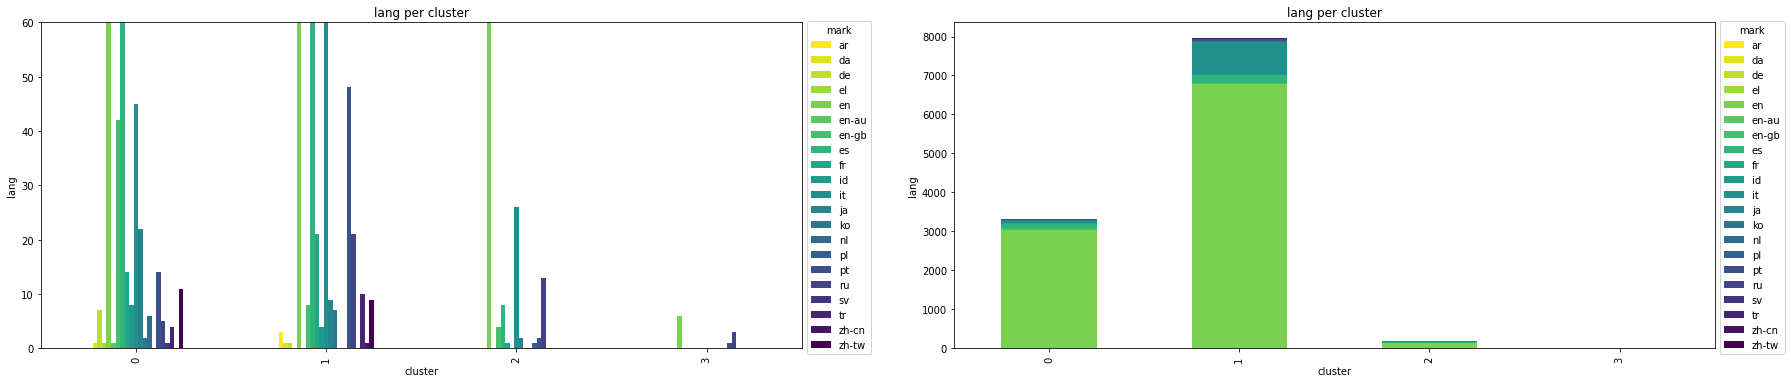

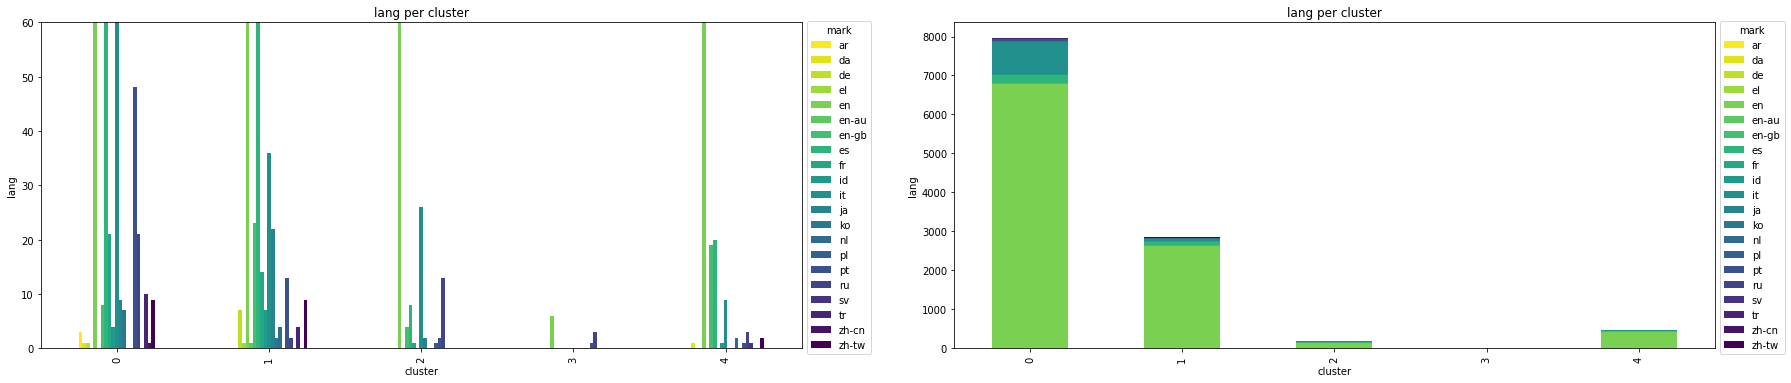

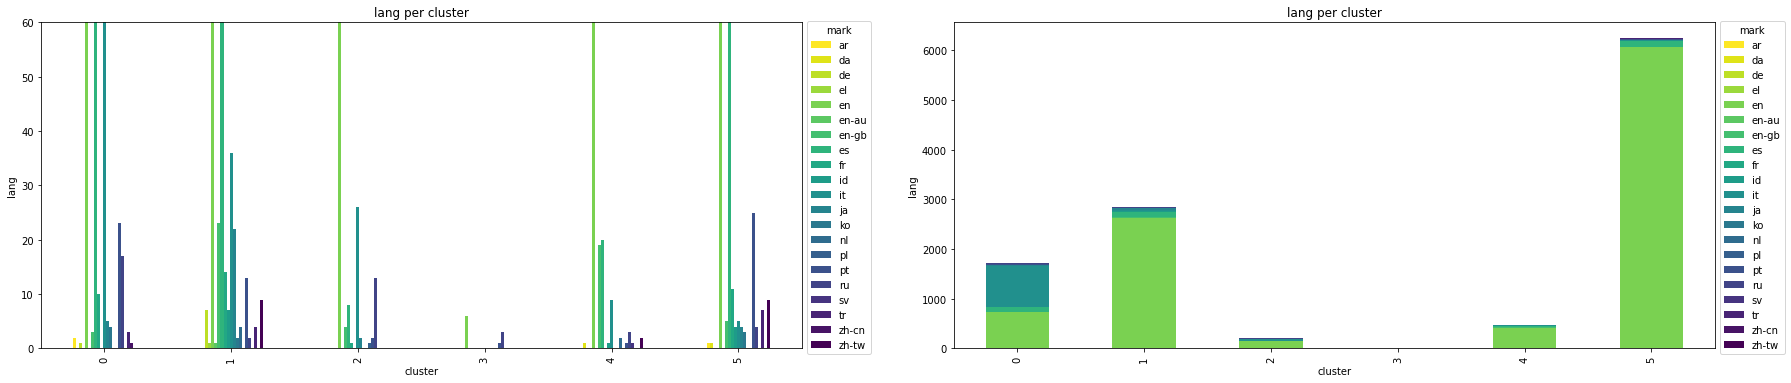

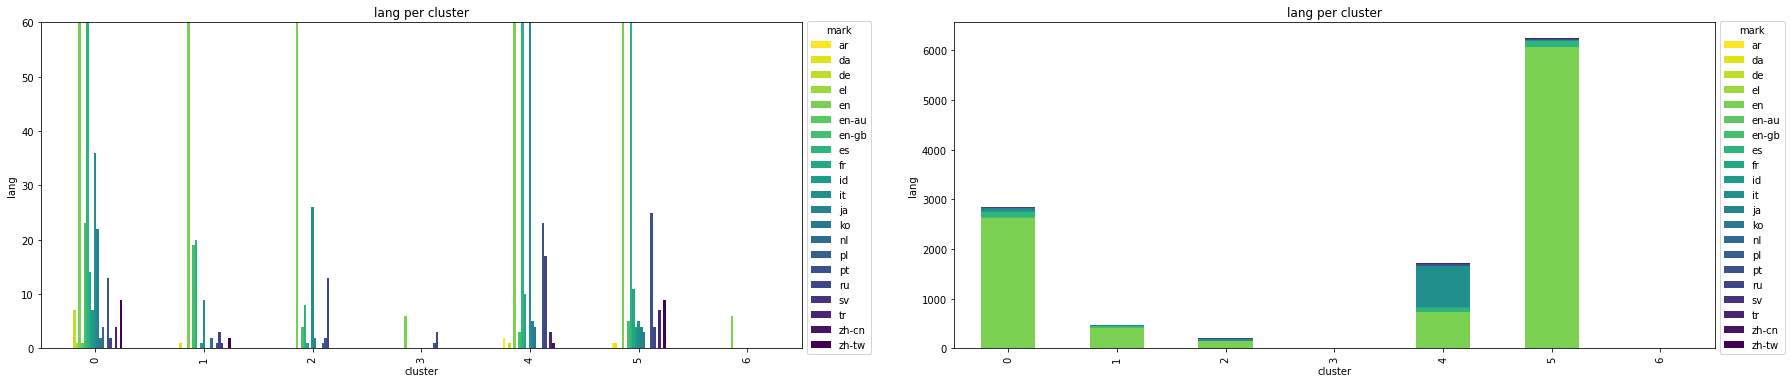

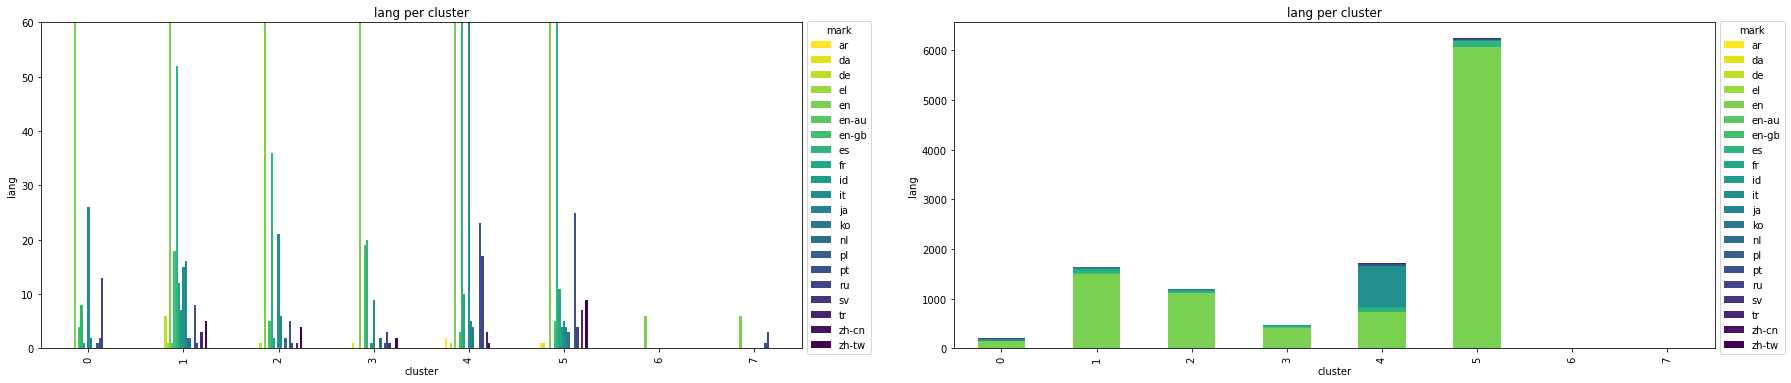

In [ ]:
for i in range(len(mod)):
  lang_ct = pd.crosstab(mod[i].labels_,users_profile_all['lang'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('lang')
  axs[0].set_ylim(0, 60) 

  ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('lang')

  plt.show()

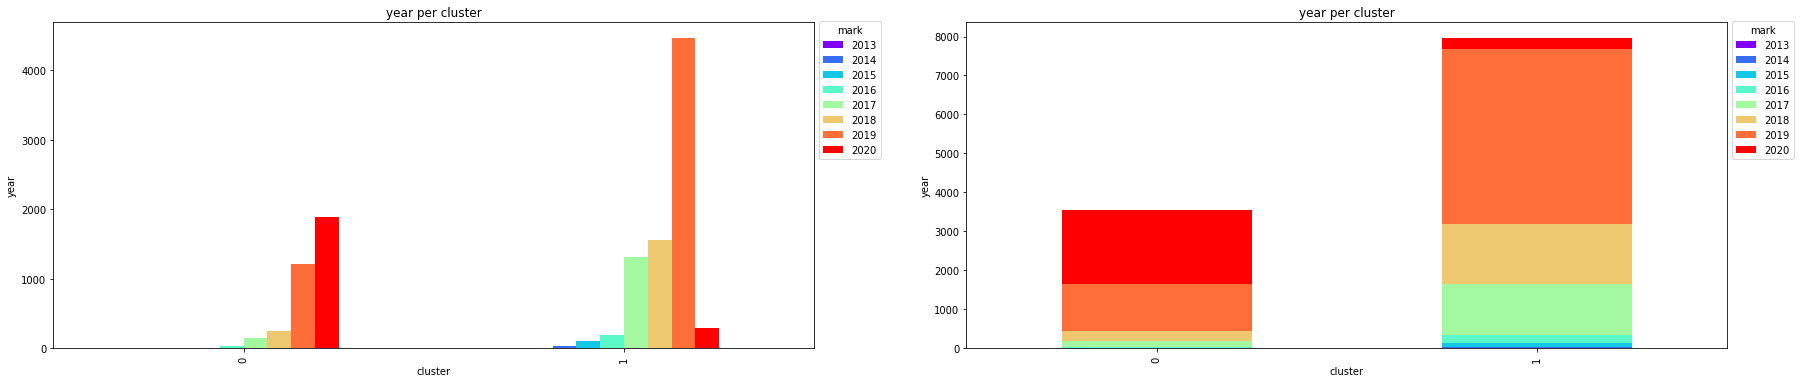

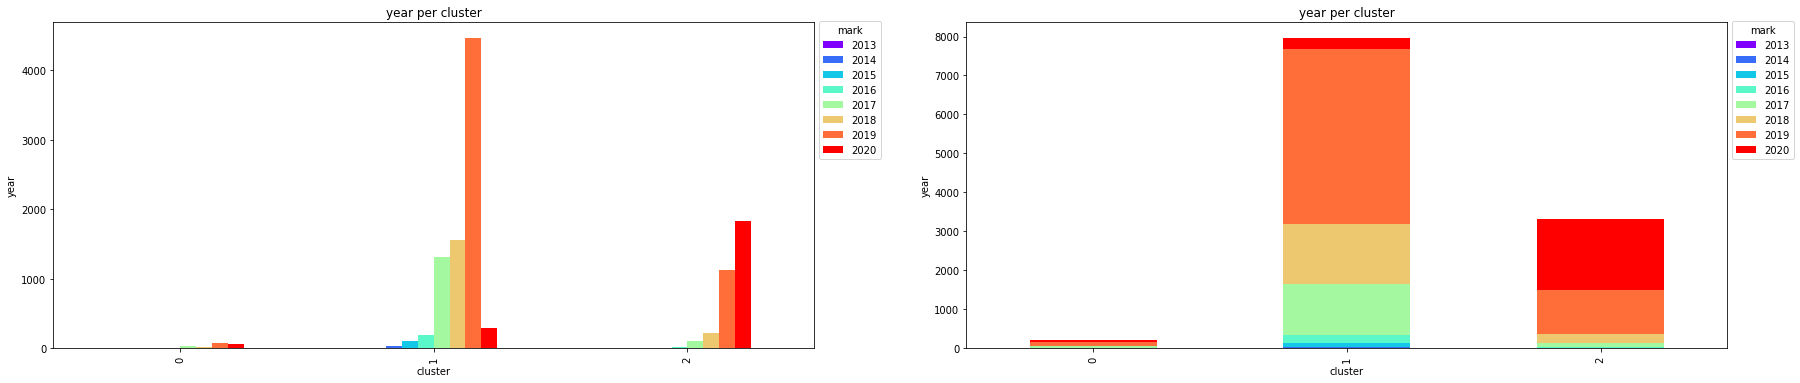

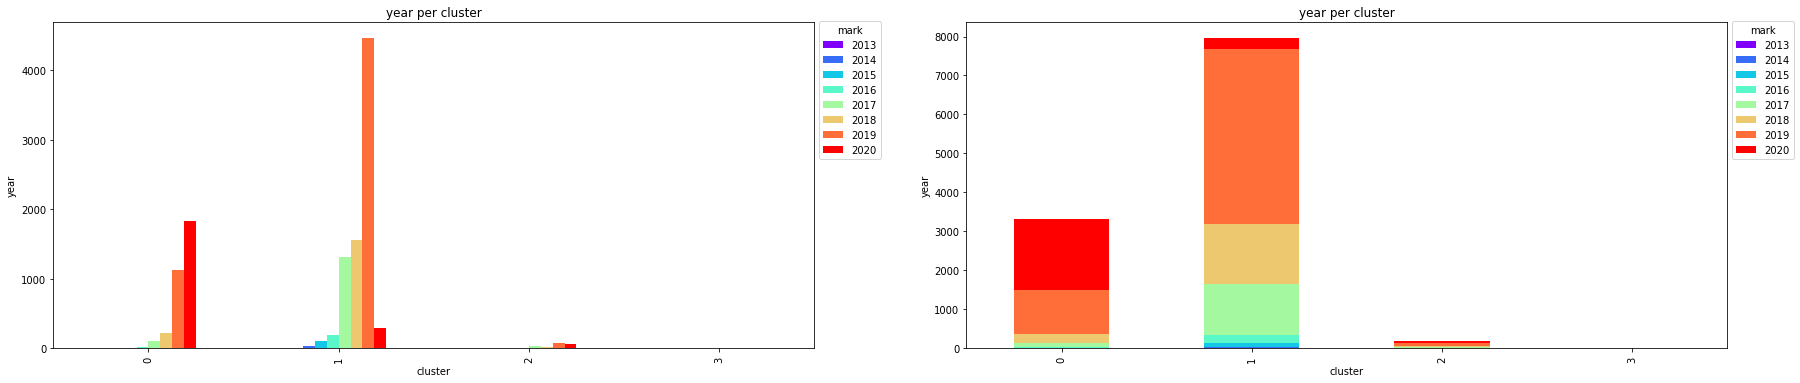

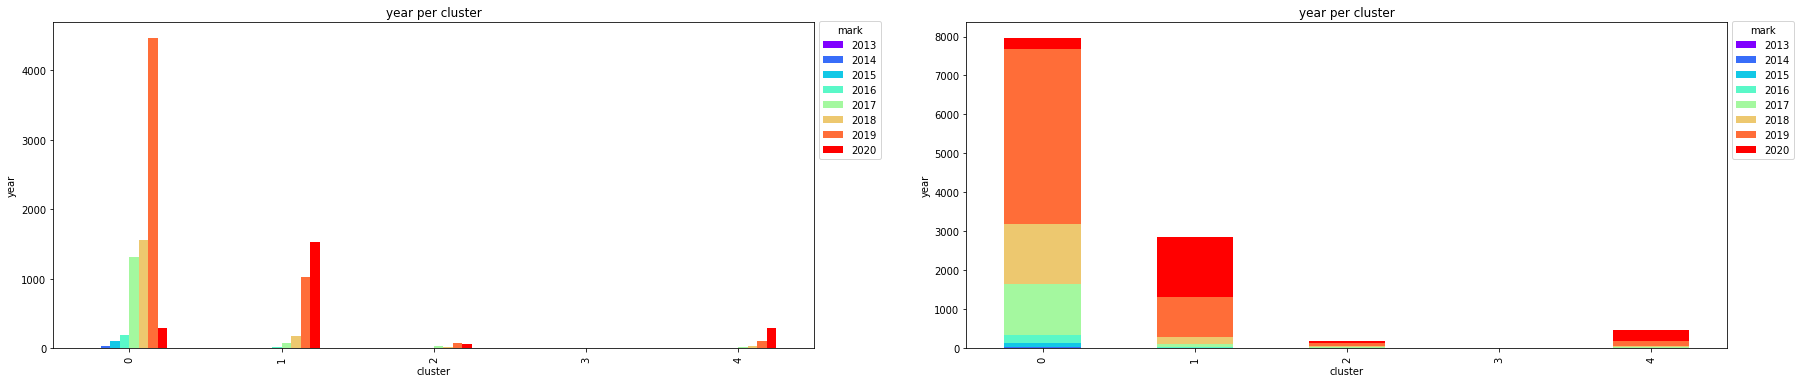

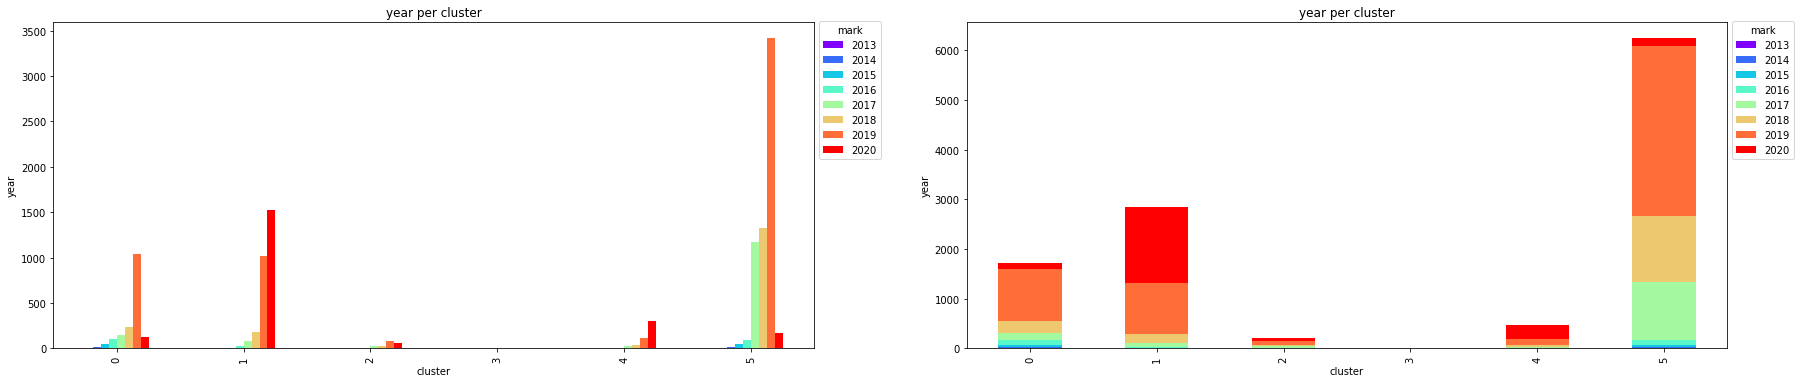

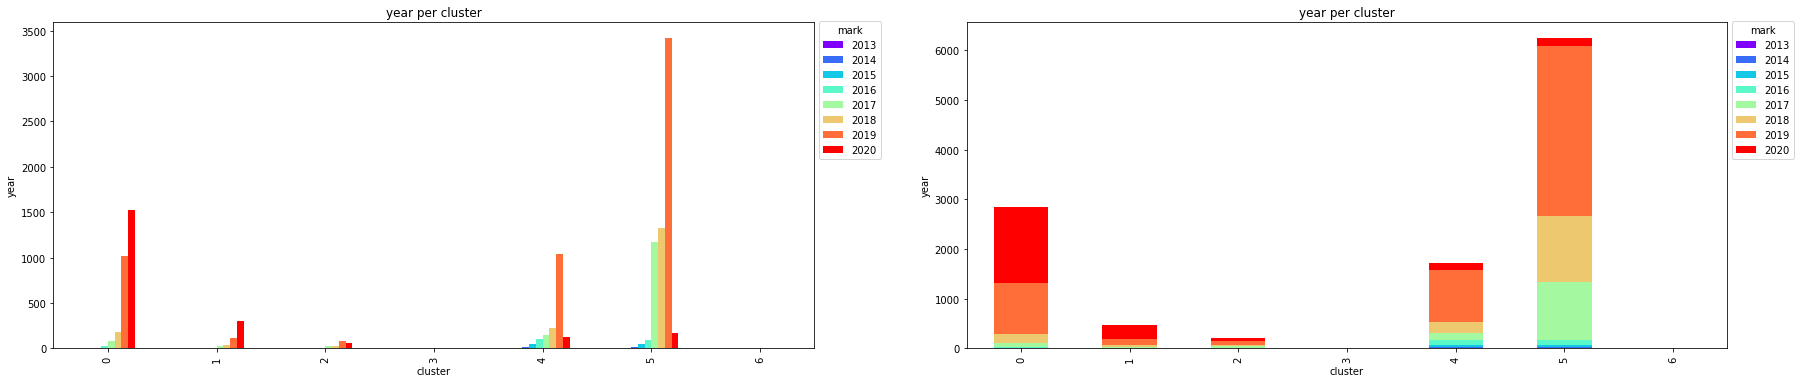

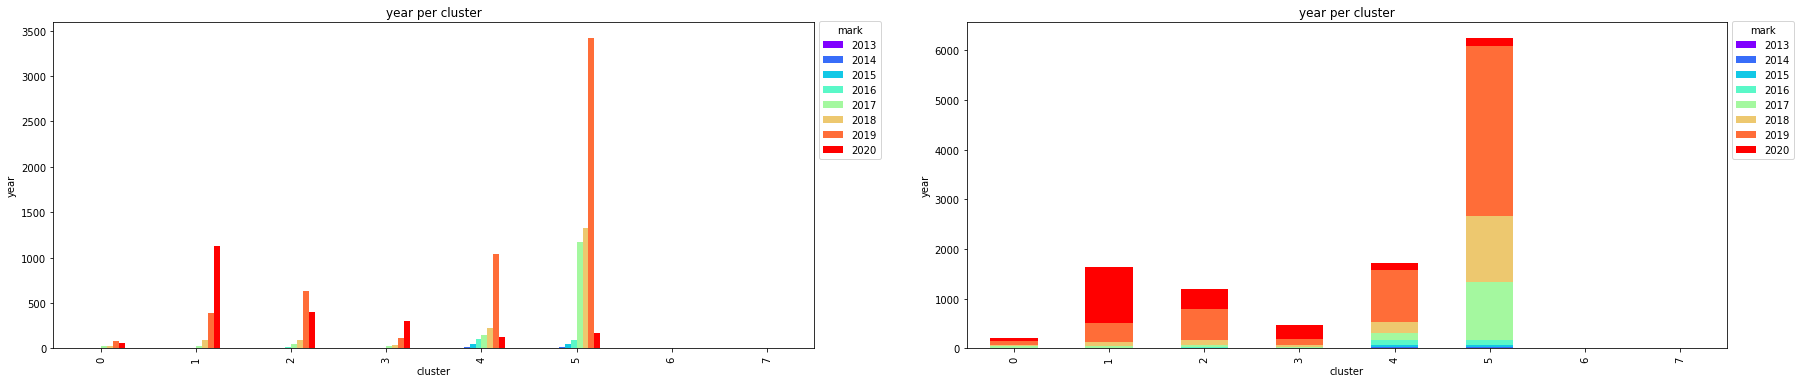

In [ ]:
for i in range(len(mod)):
  year_ct = pd.crosstab(mod[i].labels_,users_profile_all['most_freq_year'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('year')

  ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('year')

  plt.show()

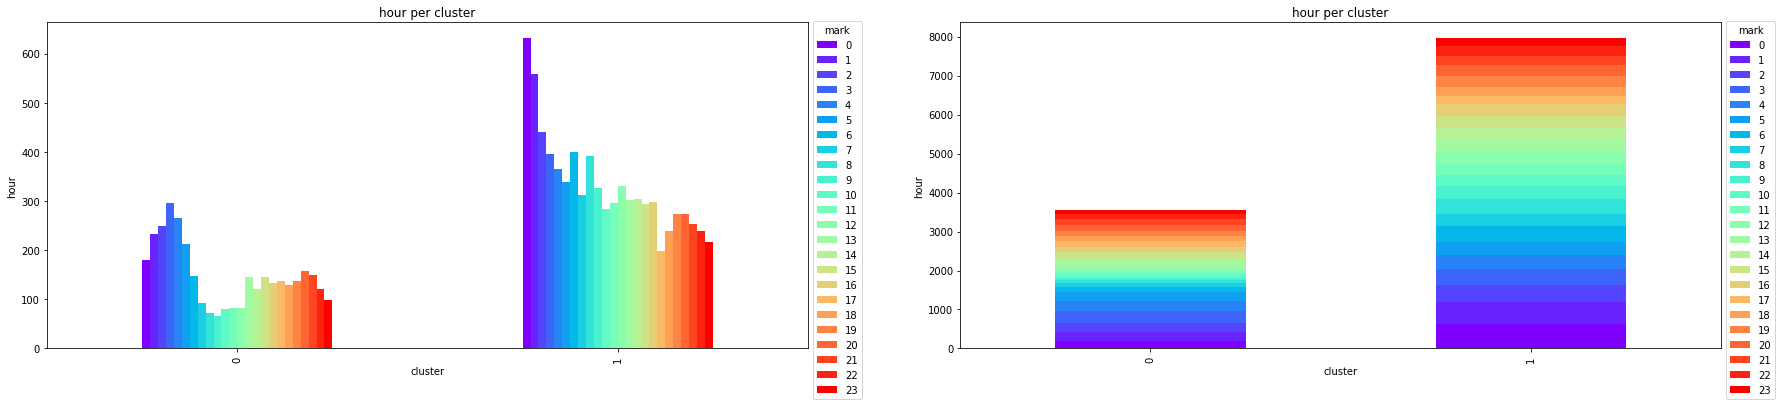

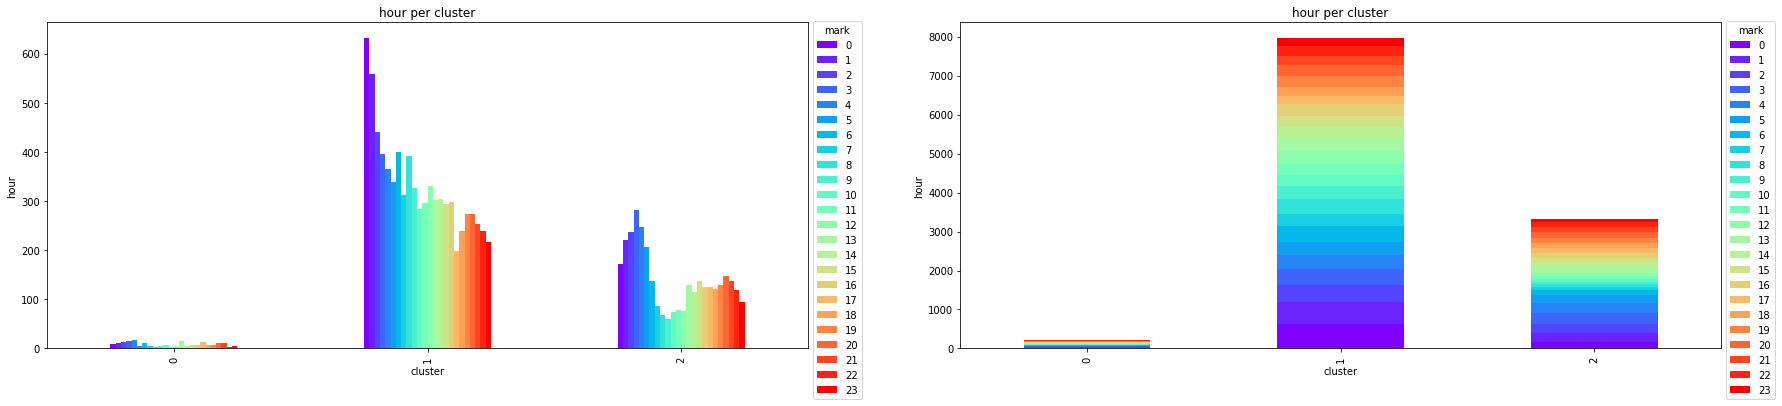

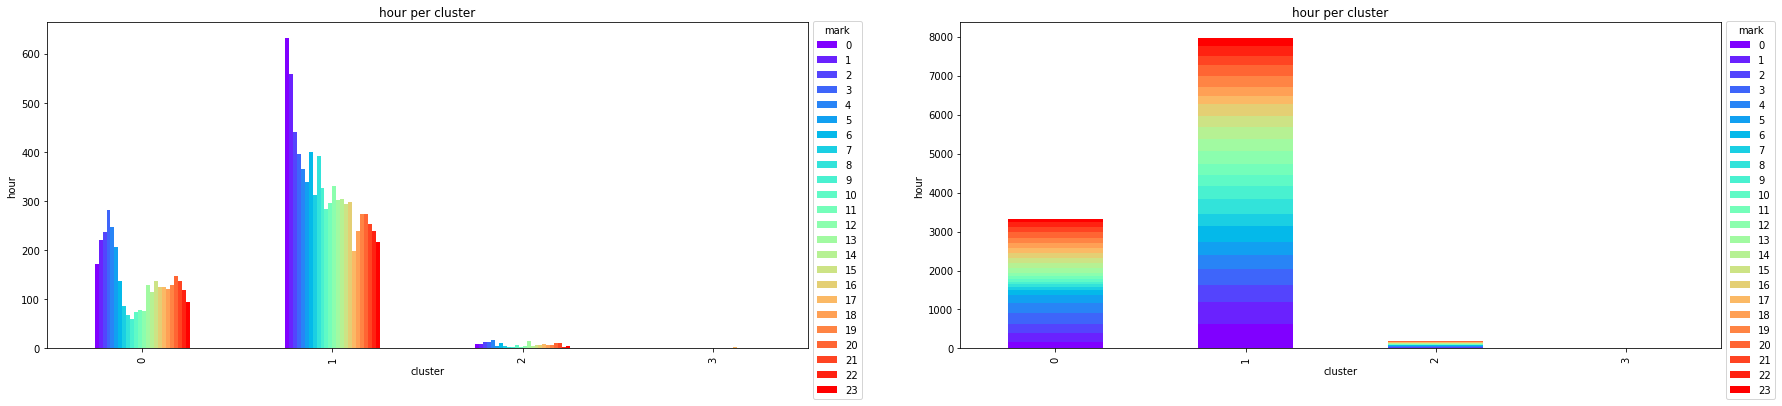

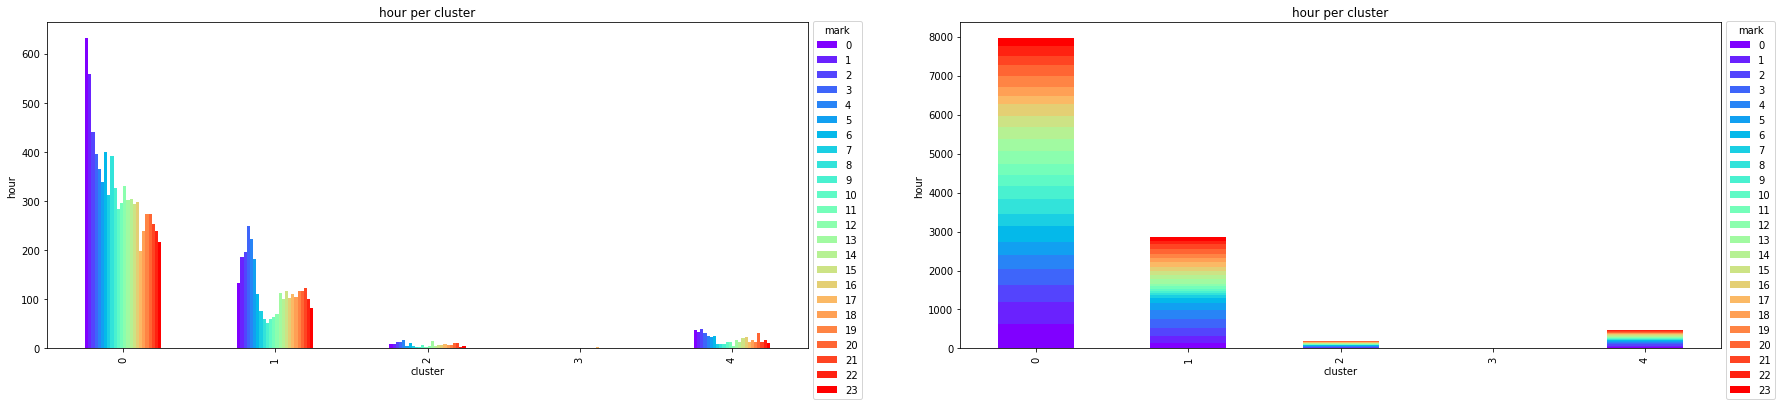

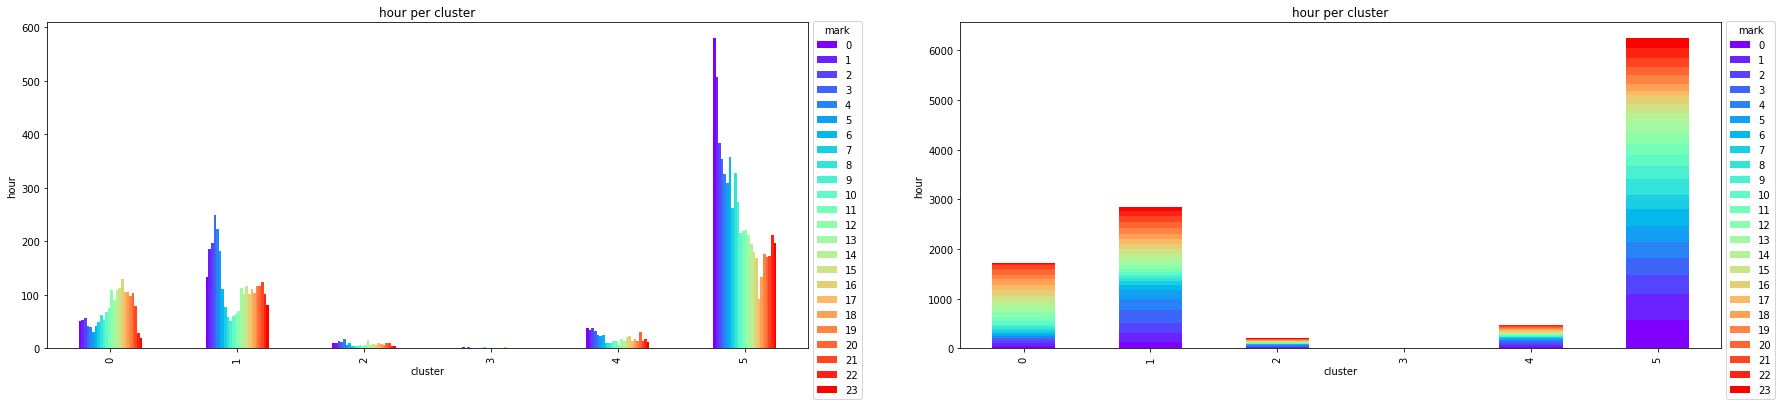

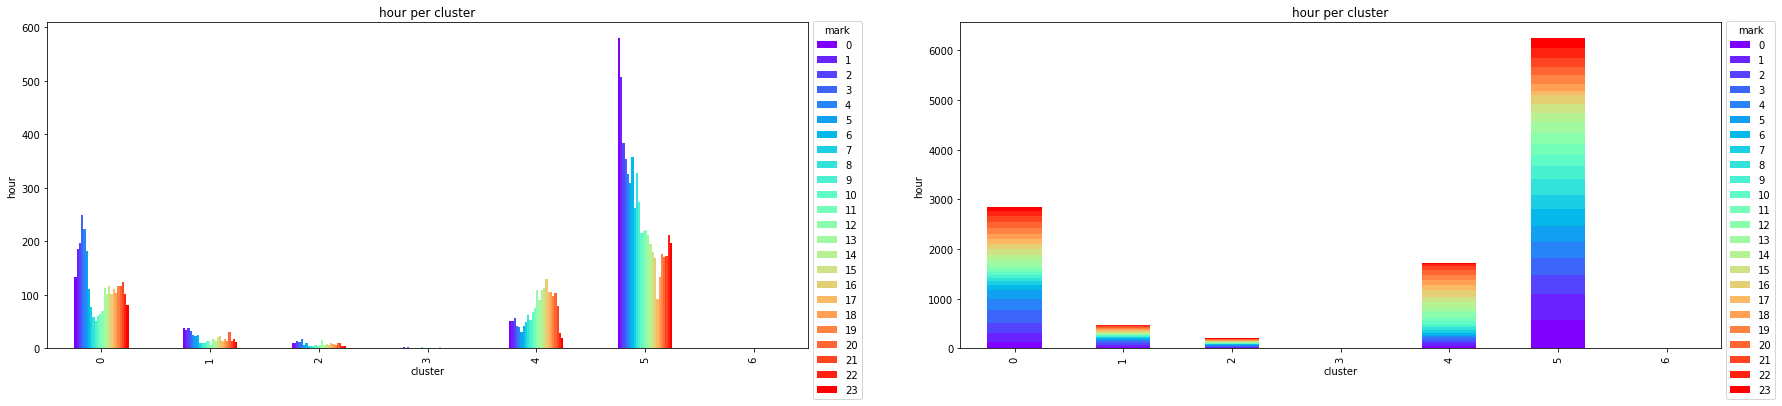

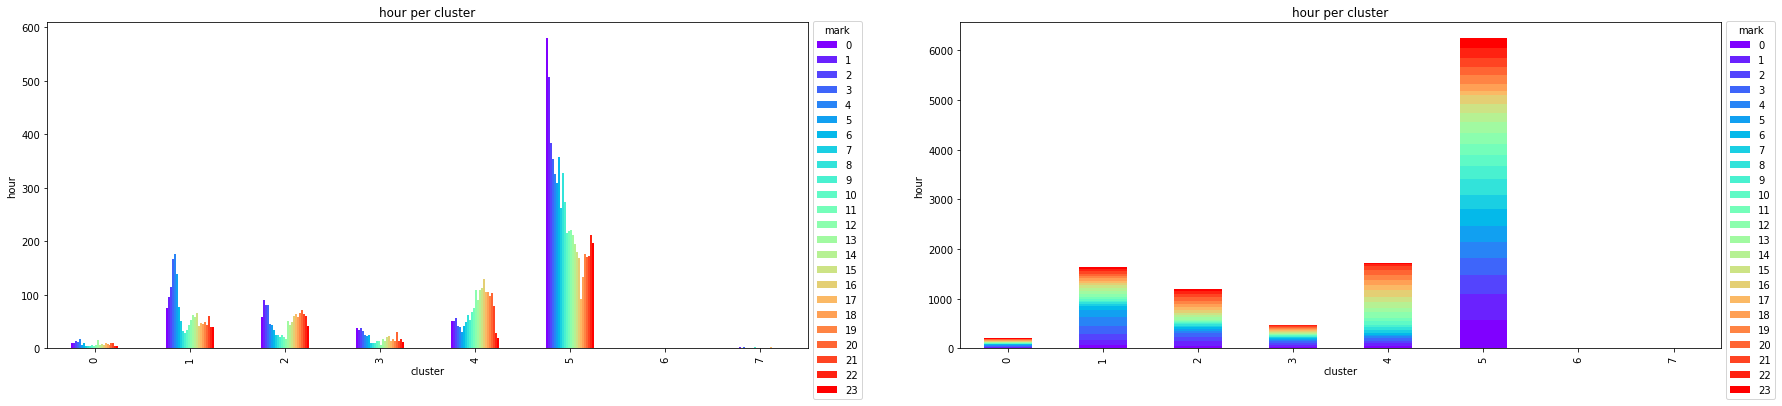

In [ ]:
for i in range(len(mod)):
  hour_ct = pd.crosstab(mod[i].labels_,users_profile_all['most_freq_hour'])

  f, axs = plt.subplots(ncols=2, figsize=(30,6))

  ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
  ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[0].set_xlabel('cluster')
  axs[0].set_ylabel('hour')

  ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
  ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
  axs[1].set_xlabel('cluster')
  axs[1].set_ylabel('hour')

  plt.show()

### Clusters characterization with respect to numerical features (Ward Method)

In [ ]:
cols = []
for i in range(len(mod)):
  s = 'label_K='+str(i+2)
  cols.append(s)

In [ ]:
for i in range(len(mod)):
  users_profile_all[cols[i]]=mod[i].labels_

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0        6237.625     138813.625          0.0        1031.125         297.5   
1        6237.625     138813.625          0.0         969.000         297.5   
2        6237.625      92396.000          0.0         391.000          77.0   
3        6237.625     138813.625          0.0         209.000         297.5   
4        6237.625     138486.000          0.0        1031.125         185.0   

   ...  avg_textlen  days_on_tw  activity_richness  label_K=2  label_K=3  \
0  ...   109.637321        3900           0.608718          0          2   
1  ...    85.026719        3893           0.519137          0          2   
2  ...    80.780317        3885           0.551866          0          2   
3  ...    84.281111        3884           0.519310          0          2   
4  ...    95.166473        3870           0.887855          0          2   

   label_K=4  label_K=5  label_K=6  label_K=7  label_K=8  
0          0          1          1          0          2  
1          0          4          4          1          3  
2          0          1          1          0          2  
3          0          1          1          0          2  
4          0          1          1          0          2  

[5 rows x 40 columns]

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).mean()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0             4806.254660  105522.034065      546.607350    181.091076   
1              147.868379    4201.047932      123.390831     31.235597   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=2                                                      
0          166.885908      115881.738210          614.121152   
1           15.261579        1784.141333           41.752479   

           std_retweet_count  std_favorite_count  popularity  tweet_richness  \
label_K=2                                                                      
0                5099.637090           35.123283  967.793636        1.054086   
1                 204.058631            7.715402   50.989798        0.484376   

           retcount_entropy  avg_textlen   days_on_tw  activity_richness  
label_K=2                                                                 
0                  2.329188    71.593861  2148.415984           1.258517  
1                  0.504824    69.724522  1674.918790           0.176915

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0             3099.421948   87949.063967     1031.125000    144.765258   
1              147.868379    4201.047932      123.390831     31.235597   
2             4915.496056  106646.746394      515.597055    183.416016   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=3                                                      
0          135.075117       85206.122066         8852.169014   
1           15.261579        1784.141333           41.752479   
2          168.921875      117845.051382           86.866286   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=3                                                                       
0                9795.297412          545.854324  4593.067809        1.015380   
1                 204.058631            7.715402    50.989798        0.484376   
2                4799.103542            2.435269   735.767375        1.056564   

           retcount_entropy  avg_textlen   days_on_tw  activity_richness  
label_K=3                                                                 
0                  1.660385    88.265238  2162.572770           1.029674  
1                  0.504824    69.724522  1674.918790           0.176915  
2                  2.371993    70.526853  2147.509916           1.273164

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0             4915.496056  106646.746394      515.597055    183.416016   
1              147.868379    4201.047932      123.390831     31.235597   
2             3250.487069   85443.420567     1031.125000    151.438424   
3               32.800000  138813.625000     1031.125000      9.300000   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=4                                                      
0          168.921875      117845.051382           86.866286   
1           15.261579        1784.141333           41.752479   
2          141.591133       81940.177340         8795.625616   
3            2.800000      151504.800000        10000.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=4                                                        
0                4799.103542            2.435269    735.767375   
1                 204.058631            7.715402     50.989798   
2                7044.525872          444.305897   2069.030634   
3               65635.959665         2607.287403  55831.022461   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=4                                                               
0                1.056564          2.371993    70.526853  2147.509916   
1                0.484376          0.504824    69.724522  1674.918790   
2                1.000355          1.742177    84.771748  2147.325123   
3                1.320406          0.000000   159.183072  2472.100000   

           activity_richness  
label_K=4                     
0                   1.273164  
1                   0.176915  
2                   1.080092  
3                   0.006184

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0              147.868379    4201.047932      123.390831     31.235597   
1             4941.270219  101261.021711      517.140833    175.771053   
2             3250.487069   85443.420567     1031.125000    151.438424   
3               32.800000  138813.625000     1031.125000      9.300000   
4             4761.821653  138758.284780      506.392521    228.997908   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=5                                                      
0           15.261579        1784.141333           41.752479   
1          167.552982       64627.619649           87.599649   
2          141.591133       81940.177340         8795.625616   
3            2.800000      151504.800000        10000.000000   
4          177.083682      435145.638075           82.493724   

           std_retweet_count  std_favorite_count    popularity  \
label_K=5                                                        
0                 204.058631            7.715402     50.989798   
1                2517.282053            2.482310    402.924883   
2                7044.525872          444.305897   2069.030634   
3               65635.959665         2607.287403  55831.022461   
4               18404.106146            2.154797   2720.288508   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=5                                                               
0                0.484376          0.504824    69.724522  1674.918790   
1                1.034465          2.365306    70.197242  2146.401404   
2                1.000355          1.742177    84.771748  2147.325123   
3                1.320406          0.000000   159.183072  2472.100000   
4                1.188325          2.411864    72.492104  2154.119247   

           activity_richness  
label_K=5                     
0                   0.176915  
1                   1.260992  
2                   1.080092  
3                   0.006184  
4                   1.345734

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0              471.542710   13261.161743      503.979846    114.201979   
1             4941.270219  101261.021711      517.140833    175.771053   
2             3250.487069   85443.420567     1031.125000    151.438424   
3               32.800000  138813.625000     1031.125000      9.300000   
4             4761.821653  138758.284780      506.392521    228.997908   
5               58.882541    1710.205313       18.757781      8.426148   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=6                                                      
0           63.598370        5000.980792          150.029104   
1          167.552982       64627.619649           87.599649   
2          141.591133       81940.177340         8795.625616   
3            2.800000      151504.800000        10000.000000   
4          177.083682      435145.638075           82.493724   
5            1.972636         899.755001           11.984638   

           std_retweet_count  std_favorite_count    popularity  \
label_K=6                                                        
0                 492.088389           29.392840    129.645411   
1                2517.282053            2.482310    402.924883   
2                7044.525872          444.305897   2069.030634   
3               65635.959665         2607.287403  55831.022461   
4               18404.106146            2.154797   2720.288508   
5                 124.872341            1.755755     29.365484   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=6                                                               
0                0.964395          0.899783    88.305760  2107.682771   
1                1.034465          2.365306    70.197242  2146.401404   
2                1.000355          1.742177    84.771748  2147.325123   
3                1.320406          0.000000   159.183072  2472.100000   
4                1.188325          2.411864    72.492104  2154.119247   
5                0.352407          0.396240    64.616094  1555.941591   

           activity_richness  
label_K=6                     
0                   0.574267  
1                   1.260992  
2                   1.080092  
3                   0.006184  
4                   1.345734  
5                   0.067674

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0             4941.270219  101261.021711      517.140833    175.771053   
1             4761.821653  138758.284780      506.392521    228.997908   
2             3250.487069   85443.420567     1031.125000    151.438424   
3               32.800000  138813.625000     1031.125000      9.300000   
4              473.115289   13305.455534      505.745546    114.072138   
5               58.882541    1710.205313       18.757781      8.426148   
6               22.833333     622.666667        0.166667    151.250000   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=7                                                      
0          167.552982       64627.619649           87.599649   
1          177.083682      435145.638075           82.493724   
2          141.591133       81940.177340         8795.625616   
3            2.800000      151504.800000        10000.000000   
4           63.533879        5017.416472          150.554322   
5            1.972636         899.755001           11.984638   
6           82.000000         311.333333            0.166667   

           std_retweet_count  std_favorite_count    popularity  \
label_K=7                                                        
0                2517.282053            2.482310    402.924883   
1               18404.106146            2.154797   2720.288508   
2                7044.525872          444.305897   2069.030634   
3               65635.959665         2607.287403  55831.022461   
4                 493.511428           29.495742    130.008765   
5                 124.872341            1.755755     29.365484   
6                  86.047988            0.031475     25.968359   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=7                                                               
0                1.034465          2.365306    70.197242  2146.401404   
1                1.188325          2.411864    72.492104  2154.119247   
2                1.000355          1.742177    84.771748  2147.325123   
3                1.320406          0.000000   159.183072  2472.100000   
4                0.837945          0.902527    88.378562  2108.869159   
5                0.352407          0.396240    64.616094  1555.941591   
6               37.044782          0.116975    67.532640  1769.166667   

           activity_richness  
label_K=7                     
0                   1.260992  
1                   1.345734  
2                   1.080092  
3                   0.006184  
4                   0.576227  
5                   0.067674  
6                   0.014940

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0             3250.487069   85443.420567     1031.125000    151.438424   
1             4654.102321  126264.544827      618.780643    160.524575   
2             5334.991265   66979.985025      377.787750    196.674709   
3             4761.821653  138758.284780      506.392521    228.997908   
4              473.115289   13305.455534      505.745546    114.072138   
5               58.882541    1710.205313       18.757781      8.426148   
6               22.833333     622.666667        0.166667    151.250000   
7               32.800000  138813.625000     1031.125000      9.300000   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=8                                                      
0          141.591133       81940.177340         8795.625616   
1          123.732403       88524.200243           77.010316   
2          227.633111       31864.254576          102.118136   
3          177.083682      435145.638075           82.493724   
4           63.533879        5017.416472          150.554322   
5            1.972636         899.755001           11.984638   
6           82.000000         311.333333            0.166667   
7            2.800000      151504.800000        10000.000000   

           std_retweet_count  std_favorite_count    popularity  \
label_K=8                                                        
0                7044.525872          444.305897   2069.030634   
1                3586.565668            2.345607    600.033797   
2                1051.242620            2.669736    132.679051   
3               18404.106146            2.154797   2720.288508   
4                 493.511428           29.495742    130.008765   
5                 124.872341            1.755755     29.365484   
6                  86.047988            0.031475     25.968359   
7               65635.959665         2607.287403  55831.022461   

           tweet_richness  retcount_entropy  avg_textlen   days_on_tw  \
label_K=8                                                               
0                1.000355          1.742177    84.771748  2147.325123   
1                0.935708          2.683271    60.292679  1918.002427   
2                1.169865          1.929361    83.776876  2459.547421   
3                1.188325          2.411864    72.492104  2154.119247   
4                0.837945          0.902527    88.378562  2108.869159   
5                0.352407          0.396240    64.616094  1555.941591   
6               37.044782          0.116975    67.532640  1769.166667   
7                1.320406          0.000000   159.183072  2472.100000   

           activity_richness  
label_K=8                     
0                   1.080092  
1                   1.289107  
2                   1.222446  
3                   1.345734  
4                   0.576227  
5                   0.067674  
6                   0.014940  
7                   0.006184

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).std()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0             2123.988234   54390.671815      402.068951    118.068190   
1              483.802929   15052.689306      295.508491     62.582251   

            num_urls  max_retweet_count  max_favorite_count  \
label_K=2                                                     
0          89.073555      148520.168592         2155.252596   
1          46.650722        8198.567887          194.981727   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=2                                                                       
0                8831.144558          212.423085  3684.720542        0.560472   
1                 837.705230           44.664789   248.610982        1.289802   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=2                                                                
0                  2.239339    19.564277  637.292498           0.740513  
1                  0.978734    15.058380  437.475214           0.321213

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0             2823.428214   62383.639390        0.000000    120.544241   
1              483.802929   15052.689306      295.508491     62.582251   
2             2023.296856   53653.732343      394.990716    117.544682   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=3                                                      
0          103.907088      112455.514915         1922.812977   
1           46.650722        8198.567887          194.981727   
2           87.664956      150334.671345          289.782293   

           std_retweet_count  std_favorite_count    popularity  \
label_K=3                                                        
0               17062.993198          688.322950  12270.108873   
1                 837.705230           44.664789    248.610982   
2                7932.717833            7.315308   1989.364660   

           tweet_richness  retcount_entropy  avg_textlen  days_on_tw  \
label_K=3                                                              
0                0.677868          2.047066    32.323509  560.244969   
1                1.289802          0.978734    15.058380  437.475214   
2                0.552140          2.244592    17.937582  641.973147   

           activity_richness  
label_K=3                     
0                   0.909078  
1                   0.321213  
2                   0.726111

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0             2023.296856   53653.732343      394.990716    117.544682   
1              483.802929   15052.689306      295.508491     62.582251   
2             2806.759786   62848.938571        0.000000    119.569845   
3                3.938415       0.000000        0.000000      1.567021   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=4                                                      
0           87.664956      150334.671345          289.782293   
1           46.650722        8198.567887          194.981727   
2          102.089629      114210.225054         1952.384026   
3            0.918937          19.469634            0.000000   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=4                                                                       
0                7932.717833            7.315308  1989.364660        0.552140   
1                 837.705230           44.664789   248.610982        1.289802   
2               11978.839016          518.168825  4438.721822        0.690587   
3                1473.829531          423.996614  6594.454218        0.106844   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=4                                                                
0                  2.244592    17.937582  641.973147           0.726111  
1                  0.978734    15.058380  437.475214           0.321213  
2                  2.062699    28.745649  567.024283           0.901622  
3                  0.000000    14.195290  255.988476           0.001508

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0              483.802929   15052.689306      295.508491     62.582251   
1             2009.150304   56208.931217      399.098772    118.912260   
2             2806.759786   62848.938571        0.000000    119.569845   
3                3.938415       0.000000        0.000000      1.567021   
4             2101.284037    1209.914905      369.812827     97.380820   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=5                                                      
0           46.650722        8198.567887          194.981727   
1           88.893503       69542.763046          293.288058   
2          102.089629      114210.225054         1952.384026   
3            0.918937          19.469634            0.000000   
4           79.547181      104582.995052          268.176275   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=5                                                                       
0                 837.705230           44.664789   248.610982        1.289802   
1                2952.700260            7.515489   856.662083        0.556249   
2               11978.839016          518.168825  4438.721822        0.690587   
3                1473.829531          423.996614  6594.454218        0.106844   
4               13047.856526            5.983450  4314.130677        0.507915   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=5                                                                
0                  0.978734    15.058380  437.475214           0.321213  
1                  2.242006    18.041011  631.302557           0.706388  
2                  2.062699    28.745649  567.024283           0.901622  
3                  0.000000    14.195290  255.988476           0.001508  
4                  2.261900    17.195525  702.916596           0.831224

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0              952.332907   27516.482268      435.295065     94.661131   
1             2009.150304   56208.931217      399.098772    118.912260   
2             2806.759786   62848.938571        0.000000    119.569845   
3                3.938415       0.000000        0.000000      1.567021   
4             2101.284037    1209.914905      369.812827     97.380820   
5              111.647623    7213.718508       92.127251     10.858479   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=6                                                      
0           79.092814       16084.880066          366.498290   
1           88.893503       69542.763046          293.288058   
2          102.089629      114210.225054         1952.384026   
3            0.918937          19.469634            0.000000   
4           79.547181      104582.995052          268.176275   
5           15.379183        3312.404246           86.308473   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=6                                                                       
0                1607.638332           90.190139   423.538167        2.672961   
1                2952.700260            7.515489   856.662083        0.556249   
2               11978.839016          518.168825  4438.721822        0.690587   
3                1473.829531          423.996614  6594.454218        0.106844   
4               13047.856526            5.983450  4314.130677        0.507915   
5                 394.188189           11.974798   165.340086        0.277164   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=6                                                                
0                  1.486119    15.989828  461.798763           0.506500  
1                  2.242006    18.041011  631.302557           0.706388  
2                  2.062699    28.745649  567.024283           0.901622  
3                  0.000000    14.195290  255.988476           0.001508  
4                  2.261900    17.195525  702.916596           0.831224  
5                  0.748135     9.889762  346.047751           0.075488

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0             2009.150304   56208.931217      399.098772    118.912260   
1             2101.284037    1209.914905      369.812827     97.380820   
2             2806.759786   62848.938571        0.000000    119.569845   
3                3.938415       0.000000        0.000000      1.567021   
4              953.629798   27554.365154      435.032217     94.404988   
5              111.647623    7213.718508       92.127251     10.858479   
6                3.488075    1525.215613        0.408248    160.225076   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=7                                                      
0           88.893503       69542.763046          293.288058   
1           79.547181      104582.995052          268.176275   
2          102.089629      114210.225054         1952.384026   
3            0.918937          19.469634            0.000000   
4           78.929283       16110.603498          367.032682   
5           15.379183        3312.404246           86.308473   
6          126.261633         762.607807            0.408248   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=7                                                                       
0                2952.700260            7.515489   856.662083        0.556249   
1               13047.856526            5.983450  4314.130677        0.507915   
2               11978.839016          518.168825  4438.721822        0.690587   
3                1473.829531          423.996614  6594.454218        0.106844   
4                1610.234186           90.331346   424.221649        1.589112   
5                 394.188189           11.974798   165.340086        0.277164   
6                 210.773663            0.077099    63.538941        4.660490   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=7                                                                
0                  2.242006    18.041011  631.302557           0.706388  
1                  2.261900    17.195525  702.916596           0.831224  
2                  2.062699    28.745649  567.024283           0.901622  
3                  0.000000    14.195290  255.988476           0.001508  
4                  1.487980    15.962732  462.128940           0.506301  
5                  0.748135     9.889762  346.047751           0.075488  
6                  0.133023     9.134276  116.295170           0.001408

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0             2806.759786   62848.938571        0.000000    119.569845   
1             2179.303001   33146.742552      382.867602    105.244095   
2             1671.648378   62881.263809      378.426964    132.654335   
3             2101.284037    1209.914905      369.812827     97.380820   
4              953.629798   27554.365154      435.032217     94.404988   
5              111.647623    7213.718508       92.127251     10.858479   
6                3.488075    1525.215613        0.408248    160.225076   
7                3.938415       0.000000        0.000000      1.567021   

             num_urls  max_retweet_count  max_favorite_count  \
label_K=8                                                      
0          102.089629      114210.225054         1952.384026   
1           87.111166       73128.592075          241.642282   
2           45.730332       47756.956775          351.583580   
3           79.547181      104582.995052          268.176275   
4           78.929283       16110.603498          367.032682   
5           15.379183        3312.404246           86.308473   
6          126.261633         762.607807            0.408248   
7            0.918937          19.469634            0.000000   

           std_retweet_count  std_favorite_count   popularity  tweet_richness  \
label_K=8                                                                       
0               11978.839016          518.168825  4438.721822        0.690587   
1                3219.017858            5.320856  1051.747452        0.413352   
2                1658.826729            9.751995   312.273984        0.684065   
3               13047.856526            5.983450  4314.130677        0.507915   
4                1610.234186           90.331346   424.221649        1.589112   
5                 394.188189           11.974798   165.340086        0.277164   
6                 210.773663            0.077099    63.538941        4.660490   
7                1473.829531          423.996614  6594.454218        0.106844   

           retcount_entropy  avg_textlen  days_on_tw  activity_richness  
label_K=8                                                                
0                  2.062699    28.745649  567.024283           0.901622  
1                  2.273819    13.149114  591.187958           0.809229  
2                  2.122457    14.690707  544.428021           0.532050  
3                  2.261900    17.195525  702.916596           0.831224  
4                  1.487980    15.962732  462.128940           0.506301  
5                  0.748135     9.889762  346.047751           0.075488  
6                  0.133023     9.134276  116.295170           0.001408  
7                  0.000000    14.195290  255.988476           0.001508

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).max()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=2                                                                       
0             245.0           500000.0             10000.0      106034.982635   
1             245.0           152091.0              3709.0       19757.275736   

           std_favorite_count  popularity  tweet_richness  retcount_entropy  \
label_K=2                                                                     
0                 3722.299247   69042.400        6.139245          6.369161   
1                  598.158006    8539.625       41.833333          6.247477   

           avg_textlen  days_on_tw  activity_richness  
label_K=2                                              
0                189.0        3900           4.148438  
1                245.0        3853           2.364856

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=3                                                                       
0             245.0           500000.0             10000.0       69510.395858   
1             245.0           152091.0              3709.0       19757.275736   
2             245.0           500000.0              4853.0      106034.982635   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=3                                                                       
0                 3722.299247  69042.400000        3.043548          6.313700   
1                  598.158006   8539.625000       41.833333          6.247477   
2                  172.139404  36148.675676        6.139245          6.369161   

           avg_textlen  days_on_tw  activity_richness  
label_K=3                                              
0           189.000000        3308           4.101197  
1           245.000000        3853           2.364856  
2           146.640781        3900           4.148438

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                  41.000     138813.625        1031.125          12.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=4                                                                       
0             245.0           500000.0              4853.0      106034.982635   
1             245.0           152091.0              3709.0       19757.275736   
2             245.0           500000.0             10000.0       51435.140792   
3               5.0           151542.0             10000.0       69510.395858   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=4                                                                       
0                  172.139404  36148.675676        6.139245          6.369161   
1                  598.158006   8539.625000       41.833333          6.247477   
2                 2418.401650  24529.702703        3.043548          6.313700   
3                 3722.299247  69042.400000        1.500000          0.000000   

           avg_textlen  days_on_tw  activity_richness  
label_K=4                                              
0           146.640781        3900           4.148438  
1           245.000000        3853           2.364856  
2           165.230769        3308           4.101197  
3           189.000000        2868           0.008707

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                  41.000     138813.625        1031.125          12.0   
4                6237.625     138813.625        1031.125         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=5                                                                       
0             245.0           152091.0              3709.0       19757.275736   
1             245.0           393303.0              4853.0       29994.240548   
2             245.0           500000.0             10000.0       51435.140792   
3               5.0           151542.0             10000.0       69510.395858   
4             245.0           500000.0              3008.0      106034.982635   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=5                                                                       
0                  598.158006   8539.625000       41.833333          6.247477   
1                  172.139404  18511.666667        6.139245          6.369161   
2                 2418.401650  24529.702703        3.043548          6.313700   
3                 3722.299247  69042.400000        1.500000          0.000000   
4                   79.849031  36148.675676        3.325935          6.362118   

           avg_textlen  days_on_tw  activity_richness  
label_K=5                                              
0           245.000000        3853           2.364856  
1           146.640781        3900           4.148438  
2           165.230769        3308           4.101197  
3           189.000000        2868           0.008707  
4           119.668064        3893           4.105727

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                  41.000     138813.625        1031.125          12.0   
4                6237.625     138813.625        1031.125         297.5   
5                3291.000     126618.000        1031.125         229.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=6                                                                       
0             245.0           152091.0              3709.0       19757.275736   
1             245.0           393303.0              4853.0       29994.240548   
2             245.0           500000.0             10000.0       51435.140792   
3               5.0           151542.0             10000.0       69510.395858   
4             245.0           500000.0              3008.0      106034.982635   
5             245.0            70816.0              2453.0        6881.860171   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=6                                                                       
0                  598.158006   8539.625000       41.833333          6.153315   
1                  172.139404  18511.666667        6.139245          6.369161   
2                 2418.401650  24529.702703        3.043548          6.313700   
3                 3722.299247  69042.400000        1.500000          0.000000   
4                   79.849031  36148.675676        3.325935          6.362118   
5                  265.258817   6785.000000        5.577236          6.247477   

           avg_textlen  days_on_tw  activity_richness  
label_K=6                                              
0           245.000000        3853           2.364856  
1           146.640781        3900           4.148438  
2           165.230769        3308           4.101197  
3           189.000000        2868           0.008707  
4           119.668064        3893           4.105727  
5           133.000000        3226           2.360635

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                  41.000     138813.625        1031.125          12.0   
4                6237.625     138813.625        1031.125         297.5   
5                3291.000     126618.000        1031.125         229.0   
6                  29.000       3736.000           1.000         297.5   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=7                                                                       
0             245.0           393303.0              4853.0       29994.240548   
1             245.0           500000.0              3008.0      106034.982635   
2             245.0           500000.0             10000.0       51435.140792   
3               5.0           151542.0             10000.0       69510.395858   
4             245.0           152091.0              3709.0       19757.275736   
5             245.0            70816.0              2453.0        6881.860171   
6             245.0             1868.0                 1.0         516.287926   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=7                                                                       
0                  172.139404  18511.666667        6.139245          6.369161   
1                   79.849031  36148.675676        3.325935          6.362118   
2                 2418.401650  24529.702703        3.043548          6.313700   
3                 3722.299247  69042.400000        1.500000          0.000000   
4                  598.158006   8539.625000       22.021739          6.153315   
5                  265.258817   6785.000000        5.577236          6.247477   
6                    0.188853    155.666667       41.833333          0.297472   

           avg_textlen  days_on_tw  activity_richness  
label_K=7                                              
0           146.640781        3900           4.148438  
1           119.668064        3893           4.105727  
2           165.230769        3308           4.101197  
3           189.000000        2868           0.008707  
4           245.000000        3853           2.364856  
5           133.000000        3226           2.360635  
6            77.045455        1919           0.017718

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0                6237.625     138813.625        1031.125         297.5   
1                6237.625     138813.625        1031.125         297.5   
2                6237.625     138813.625        1031.125         297.5   
3                6237.625     138813.625        1031.125         297.5   
4                6237.625     138813.625        1031.125         297.5   
5                3291.000     126618.000        1031.125         229.0   
6                  29.000       3736.000           1.000         297.5   
7                  41.000     138813.625        1031.125          12.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=8                                                                       
0             245.0           500000.0             10000.0       51435.140792   
1             245.0           393303.0              3931.0       29994.240548   
2             245.0           296685.0              4853.0       10790.860350   
3             245.0           500000.0              3008.0      106034.982635   
4             245.0           152091.0              3709.0       19757.275736   
5             245.0            70816.0              2453.0        6881.860171   
6             245.0             1868.0                 1.0         516.287926   
7               5.0           151542.0             10000.0       69510.395858   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=8                                                                       
0                 2418.401650  24529.702703        3.043548          6.313700   
1                   70.876870  18511.666667        3.566186          6.369161   
2                  172.139404   4392.119153        6.139245          6.338819   
3                   79.849031  36148.675676        3.325935          6.362118   
4                  598.158006   8539.625000       22.021739          6.153315   
5                  265.258817   6785.000000        5.577236          6.247477   
6                    0.188853    155.666667       41.833333          0.297472   
7                 3722.299247  69042.400000        1.500000          0.000000   

           avg_textlen  days_on_tw  activity_richness  
label_K=8                                              
0           165.230769        3308           4.101197  
1           115.720045        3542           4.148438  
2           146.640781        3900           2.728775  
3           119.668064        3893           4.105727  
4           245.000000        3853           2.364856  
5           133.000000        3226           2.360635  
6            77.045455        1919           0.017718  
7           189.000000        2868           0.008707

In [ ]:
for i in range(len(cols)):
  x = users_profile_all[['statuses_count','retweet_count','favorite_count','num_hashtags','num_urls','max_retweet_count',
                     'max_favorite_count','std_retweet_count','std_favorite_count','popularity','tweet_richness','retcount_entropy',
                     'avg_textlen','days_on_tw','activity_richness',cols[i]]].groupby(cols[i]).min()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=2                                                                
0                     1.0            0.0             0.0           0.0   
1                     0.0            0.0             0.0           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=2                                                                       
0               0.0                0.0                 0.0                0.0   
1               0.0                0.0                 0.0                0.0   

           std_favorite_count  popularity  tweet_richness  retcount_entropy  \
label_K=2                                                                     
0                         0.0    0.000654             0.0               0.0   
1                         0.0    0.000000             0.0               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=2                                              
0            21.107632         890           0.000500  
1             3.000000         893           0.000319

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=3                                                                
0                    12.0            2.0        1031.125           0.0   
1                     0.0            0.0           0.000           0.0   
2                     1.0            0.0           0.000           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=3                                                                       
0               0.0                1.0              2427.0           0.028356   
1               0.0                0.0                 0.0           0.000000   
2               0.0                0.0                 0.0           0.000000   

           std_favorite_count  popularity  tweet_richness  retcount_entropy  \
label_K=3                                                                     
0                   39.930616    1.359475        0.060421               0.0   
1                    0.000000    0.000000        0.000000               0.0   
2                    0.000000    0.000654        0.000000               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=3                                              
0            21.107632         919           0.004533  
1             3.000000         893           0.000319  
2            25.117843         890           0.000500

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=4                                                                
0                     1.0          0.000           0.000           0.0   
1                     0.0          0.000           0.000           0.0   
2                    12.0          2.000        1031.125           0.0   
3                    28.0     138813.625        1031.125           7.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=4                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               0.0                1.0              2427.0           0.028356   
3               2.0           151492.0             10000.0       64439.140920   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=4                                                                       
0                    0.000000      0.000654        0.000000               0.0   
1                    0.000000      0.000000        0.000000               0.0   
2                   39.930616      1.359475        0.060421               0.0   
3                 2177.851049  48132.352941        1.117647               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=4                                              
0            25.117843         890           0.000500  
1             3.000000         893           0.000319  
2            21.107632         919           0.010248  
3           141.166667        2100           0.004533

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=5                                                                
0                     0.0          0.000           0.000           0.0   
1                     1.0          0.000           0.000           0.0   
2                    12.0          2.000        1031.125           0.0   
3                    28.0     138813.625        1031.125           7.0   
4                    37.0     112361.000           0.000           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=5                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               0.0                1.0              2427.0           0.028356   
3               2.0           151492.0             10000.0       64439.140920   
4               0.0            69423.0                 0.0        2585.122337   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=5                                                                       
0                    0.000000      0.000000        0.000000               0.0   
1                    0.000000      0.000654        0.000000               0.0   
2                   39.930616      1.359475        0.060421               0.0   
3                 2177.851049  48132.352941        1.117647               0.0   
4                    0.000000     75.845739        0.084900               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=5                                              
0             3.000000         893           0.000319  
1            25.117843         890           0.000500  
2            21.107632         919           0.010248  
3           141.166667        2100           0.004533  
4            38.853534         908           0.029671

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=6                                                                
0                     1.0          0.000           0.000           0.0   
1                     1.0          0.000           0.000           0.0   
2                    12.0          2.000        1031.125           0.0   
3                    28.0     138813.625        1031.125           7.0   
4                    37.0     112361.000           0.000           0.0   
5                     0.0          0.000           0.000           0.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=6                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0                0.0                 0.0           0.000000   
2               0.0                1.0              2427.0           0.028356   
3               2.0           151492.0             10000.0       64439.140920   
4               0.0            69423.0                 0.0        2585.122337   
5               0.0                0.0                 0.0           0.000000   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=6                                                                       
0                    0.000000      0.000000        0.000000               0.0   
1                    0.000000      0.000654        0.000000               0.0   
2                   39.930616      1.359475        0.060421               0.0   
3                 2177.851049  48132.352941        1.117647               0.0   
4                    0.000000     75.845739        0.084900               0.0   
5                    0.000000      0.000000        0.000000               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=6                                              
0            41.328304         937           0.000334  
1            25.117843         890           0.000500  
2            21.107632         919           0.010248  
3           141.166667        2100           0.004533  
4            38.853534         908           0.029671  
5             3.000000         893           0.000319

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=7                                                                
0                     1.0          0.000           0.000           0.0   
1                    37.0     112361.000           0.000           0.0   
2                    12.0          2.000        1031.125           0.0   
3                    28.0     138813.625        1031.125           7.0   
4                     1.0          0.000           0.000           0.0   
5                     0.0          0.000           0.000           0.0   
6                    20.0          0.000           0.000           2.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=7                                                                       
0               0.0                0.0                 0.0           0.000000   
1               0.0            69423.0                 0.0        2585.122337   
2               0.0                1.0              2427.0           0.028356   
3               2.0           151492.0             10000.0       64439.140920   
4               0.0                0.0                 0.0           0.000000   
5               0.0                0.0                 0.0           0.000000   
6               0.0                0.0                 0.0           0.000000   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=7                                                                       
0                    0.000000      0.000654        0.000000               0.0   
1                    0.000000     75.845739        0.084900               0.0   
2                   39.930616      1.359475        0.060421               0.0   
3                 2177.851049  48132.352941        1.117647               0.0   
4                    0.000000      0.000000        0.000000               0.0   
5                    0.000000      0.000000        0.000000               0.0   
6                    0.000000      0.000000       29.676471               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=7                                              
0            25.117843         890           0.000500  
1            38.853534         908           0.029671  
2            21.107632         919           0.010248  
3           141.166667        2100           0.004533  
4            41.328304         937           0.000334  
5             3.000000         893           0.000319  
6            55.260870        1686           0.014070

statuses_count  retweet_count  favorite_count  num_hashtags  \
label_K=8                                                                
0                    12.0          2.000        1031.125           0.0   
1                     1.0          0.000           1.000           0.0   
2                    68.0          0.000           0.000           0.0   
3                    37.0     112361.000           0.000           0.0   
4                     1.0          0.000           0.000           0.0   
5                     0.0          0.000           0.000           0.0   
6                    20.0          0.000           0.000           2.0   
7                    28.0     138813.625        1031.125           7.0   

           num_urls  max_retweet_count  max_favorite_count  std_retweet_count  \
label_K=8                                                                       
0               0.0                1.0              2427.0           0.028356   
1               0.0                0.0                 1.0           0.000000   
2               0.0                0.0                 0.0           0.000000   
3               0.0            69423.0                 0.0        2585.122337   
4               0.0                0.0                 0.0           0.000000   
5               0.0                0.0                 0.0           0.000000   
6               0.0                0.0                 0.0           0.000000   
7               2.0           151492.0             10000.0       64439.140920   

           std_favorite_count    popularity  tweet_richness  retcount_entropy  \
label_K=8                                                                       
0                   39.930616      1.359475        0.060421               0.0   
1                    0.000000      0.003473        0.002976               0.0   
2                    0.000000      0.000654        0.000000               0.0   
3                    0.000000     75.845739        0.084900               0.0   
4                    0.000000      0.000000        0.000000               0.0   
5                    0.000000      0.000000        0.000000               0.0   
6                    0.000000      0.000000       29.676471               0.0   
7                 2177.851049  48132.352941        1.117647               0.0   

           avg_textlen  days_on_tw  activity_richness  
label_K=8                                              
0            21.107632         919           0.010248  
1            28.350581         890           0.000500  
2            25.117843         976           0.031700  
3            38.853534         908           0.029671  
4            41.328304         937           0.000334  
5             3.000000         893           0.000319  
6            55.260870        1686           0.014070  
7           141.166667        2100           0.004533